In [2]:
import pandas as pd
import numpy as np
print("Data Preparation 'a':")
print("     ")

# Read the selected data
df = pd.read_excel('/Users/AnanyaPal1/Documents/Certifications & Applications/Analysis-of-Oncological-Cancer-Screening-in-Latvia-/survey_data/survey_data.xlsx')
# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Age':")
print(outliers[['Age']])
# Remove outliers from 'Age' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR))]
display(df.head())

Q1 = df['Number of children'].quantile(0.25)
Q3 = df['Number of children'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Number of children'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Number of children':")
print(outliers[['Number of children']])
# Remove outliers from 'Number of children' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Number of children'] < Q1 - 1.5 * IQR) | (df['Number of children'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List of columns for which you want to impute missing data
columns_to_impute = ['Age',
                     ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
                     'Gender','City/town/village',
                     'Marital Status','Number of children',
                     'Highest level of school completed',
                     'Occupation', 
                     'Employment status', 'Smoking status', 
                     'Daily alcohol consumption ',
                     'Exercise frequency',
                     'Knowledge of General Practitioner',
                     'Last visit to General Practitioner',
                     'Health check-up frequency',
                     'For women only: last visit to gynaecologist']

# List Missing data before the Imputing
columns_with_missing_data = df[columns_to_impute].columns[df[columns_to_impute].isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)

for column in columns_to_impute:
    if column in df.columns:  # Check if column exists in DataFrame
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # Impute missing values with mean for numerical columns
            df[column] = df[column].fillna(df[column].mean())
            if column == 'Number of children':
                df[column] = df[column].round()  # Round to the nearest integer
        elif df[column].dtype == 'object':
            # Impute missing values with mode for categorical columns
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check if there are still any missing values
print("Columns with missing data after imputation:")
print(df[columns_to_impute].columns[df[columns_to_impute].isnull().any()])

# Convert age column to integer after imputation
df['Age'] = df['Age'].astype(int)

print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


Data Preparation 'a':
     


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

Country Code                                                                                                                                object
Region                                                                                                                                      object
Age                                                                                                                                        float64
 Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer                                                object
Gender                                                                                                                                      object
                                                                                                                                            ...   
Motivation preference for attending medical screenings is personalised reminders and notifications                    

     
Data Preparation 'b':
     
Outliers:
     
Outliers in 'Age':
Empty DataFrame
Columns: [Age]
Index: []
  After Fixing the Outliers:   


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

Outliers in 'Number of children':
     Number of children
2                   NaN
3                   NaN
5                   NaN
6                   0.0
7                   0.0
..                  ...
114                 0.0
115                 2.0
117                 0.0
118                 0.0
119                 0.0

[108 rows x 1 columns]
  After Fixing the Outliers:   


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

     
Missing data:
     
Columns with missing data:
Index(['Age',
       ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
       'Gender', 'City/town/village', 'Marital Status', 'Number of children',
       'Highest level of school completed', 'Occupation', 'Employment status',
       'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency',
       'Knowledge of General Practitioner',
       'Last visit to General Practitioner', 'Health check-up frequency',
       'For women only: last visit to gynaecologist'],
      dtype='object')
Columns with missing data after imputation:
Index([], dtype='object')
  After Fixing the Missing Data:   


Country Code Region  Age  \
0           DE     NW   46   
1           LV    RIX   46   
2           LV    RIX   48   
3           LV    JEL   23   
4           UA     30   46   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                 No                                             
1                                                 No                                             
2                                                 No                                             
3                                                 No                                             
4                                                 No                                             

  Gender City/town/village                    Marital Status  \
0   Male              Riga  Married or living with a partner   
1   Male              Riga  Married or living with a partner   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4   Male              Riga  Married or living with a partner   

   Number of children     Highest level of school completed  \
0                 1.0  Higher education (bachelor, masters)   
1                 1.0  Higher education (bachelor, masters)   
2                 1.0  Higher education (bachelor, masters)   
3                 1.0  Higher education (bachelor, masters)   
4                 1.0  Higher education (bachelor, masters)   

                    Occupation  ...  \
0  White collars (office work)  ...   
1  White collars (office work)  ...   
2  White collars (office work)  ...   
3  White collars (office work)  ...   
4  White collars (office work)  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                         

## DESCRIPTIVE STATISTICS

In [3]:
# Sample size of participants overall and separate for female and male, sample size of participants excluded by exclusion criteria (due to age, established cancer diagnosis)

# Loading the data 
df=pd.read_csv('cleaned_data.csv')

# Total sample size
total_sample_size = len(df)

# Sample size for females
female_sample_size = len(df[df['Gender'] == 'Female'])

# Sample size for males
male_sample_size = len(df[df['Gender'] == 'Male'])

# Sample size of participants excluded by established cancer diagnosis
excluded_by_cancer_diagnosis = len(df[df[' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer'] == 'Yes'])

# Sample size of participants excluded by age criterion
excluded_by_age_female = len(df[(df['Gender'] == 'Female') & ((df['Age'] < 25) | (df['Age'] > 74))])
excluded_by_age_male = len(df[(df['Gender'] == 'Male') & ((df['Age'] < 45) | (df['Age'] > 75))])

# Total sample size after excluding participants based on age criteria
total_sample_size_excluded_age = total_sample_size - excluded_by_age_female - excluded_by_age_male

# Percentage of females excluded by age criteria
percentage_excluded_by_age_female = (excluded_by_age_female / total_sample_size) * 100

# Percentage of males excluded by age criteria
percentage_excluded_by_age_male = (excluded_by_age_male / total_sample_size) * 100

# Print the results
display("Total Sample Size:", total_sample_size)
display("Sample Size for Females:", female_sample_size)
display("Sample Size for Males:", male_sample_size)
display("Sample Size of Participants Excluded by Established Cancer Diagnosis Criterion:", excluded_by_cancer_diagnosis)
display("Sample Size of Females Excluded by Age Criteria:", excluded_by_age_female)
display("Sample Size of Males Excluded by Age Criteria:", excluded_by_age_male)
display("Total Sample Size after Excluding Participants by Age Criteria:", total_sample_size_excluded_age)
display("Percentage of Females Excluded by Age Criteria:", percentage_excluded_by_age_female)
display("Percentage of Males Excluded by Age Criteria:", percentage_excluded_by_age_male)


'Total Sample Size:'

117

'Sample Size for Females:'

46

'Sample Size for Males:'

71

'Sample Size of Participants Excluded by Established Cancer Diagnosis Criterion:'

5

'Sample Size of Females Excluded by Age Criteria:'

4

'Sample Size of Males Excluded by Age Criteria:'

35

'Total Sample Size after Excluding Participants by Age Criteria:'

78

'Percentage of Females Excluded by Age Criteria:'

3.418803418803419

'Percentage of Males Excluded by Age Criteria:'

29.914529914529915

In [4]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Sample size of participants overall and separate for female and male
total_sample_size = len(df)
female_sample_size = len(df[df['Gender'] == 'Female'])
male_sample_size = len(df[df['Gender'] == 'Male'])

# Sample size of participants excluded by age criterion
excluded_by_age_male = len(df[(df['Gender'] == 'Male') & ((df['Age'] < 45) | (df['Age'] > 75))])
excluded_by_age_female = len(df[(df['Gender'] == 'Female') & ((df['Age'] < 25) | (df['Age'] > 74))])

# Sample size of participants excluded by established cancer diagnosis
excluded_by_cancer_diagnosis = len(df[df[' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer'] == 'Yes'])

# Filter out excluded participants
filtered_df = df[
    ((df['Gender'] == 'Male') & ((df['Age'] >= 45) & (df['Age'] <= 75))) |
    ((df['Gender'] == 'Female') & ((df['Age'] >= 25) & (df['Age'] <= 74))) &
    (df[' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer'] == 'No')
]

# Print the sample size after filtering
filtered_total_sample_size = len(filtered_df)
display("Sample Size after Excluding Participants by Age and Established Cancer Diagnosis Criteria:", filtered_total_sample_size)

# Save the filtered dataset to a new CSV file
filtered_df.to_csv('filtered_data.csv', index=False)


'Sample Size after Excluding Participants by Age and Established Cancer Diagnosis Criteria:'

77

Sociodemographic data
- Age distribution (if possible as visualization like a grouped frequency distribution table?), mean age of female participants, mean age of male participants
- Responders by city (if possible as a distribution chart, sample size and percentage) 
- Marital status (sample size and percentage) 
- Number of children (sample size and percentage) 
- Level of education (if possible as visualization, sample size and percentage) 
- Occupation and employment status (if possible as visualization, sample size and percentage) 
- Smoking status, alcohol consumption, physical activity (sample size and percentage) 


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/4143755408.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City/town/village'].replace({'Rīga': 'Riga', 'Rìga': 'Riga', 'Ríga': 'Riga'}, inplace=True)


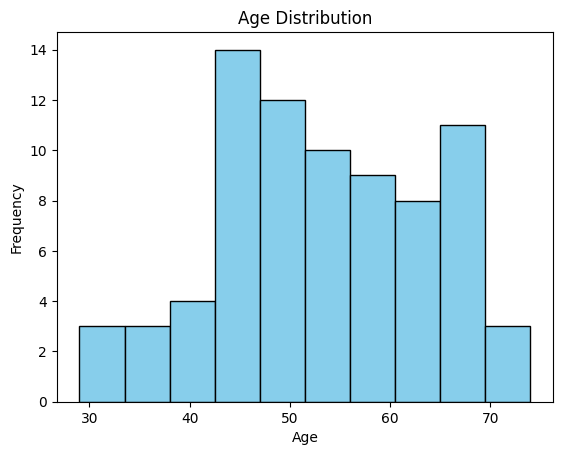

'Mean Age of Female Participants:'

53.78048780487805

'Mean Age of Male Participants:'

52.833333333333336

"Responders by City (Excluding 'Šveice, Lausanne' and Merging 'Rīga' and 'Rīgā' with 'Riga'):"

City/town/village
Riga          54
Daugavpils     3
Salaspils      2
Cēsis          2
Sigulda        2
Ikšķile        2
Jelgava        2
Aglona         1
Ķekava         1
Liepaja        1
Mārupe         1
Latvija        1
Langstini      1
Ādaži          1
Ciemats        1
Ogre           1
Name: count, dtype: int64

"\nPercentage by City (Excluding 'Šveice, Lausanne' and Merging 'Rīga' and 'Rīgā' with 'Riga'):"

City/town/village
Riga          70.129870
Daugavpils     3.896104
Salaspils      2.597403
Cēsis          2.597403
Sigulda        2.597403
Ikšķile        2.597403
Jelgava        2.597403
Aglona         1.298701
Ķekava         1.298701
Liepaja        1.298701
Mārupe         1.298701
Latvija        1.298701
Langstini      1.298701
Ādaži          1.298701
Ciemats        1.298701
Ogre           1.298701
Name: count, dtype: float64

'Marital Status Distribution:'

Marital Status
Married or living with a partner    59
Divorced                            10
Widowed                              7
Single                               1
Name: count, dtype: int64

'Marital Status Percentage:'

Marital Status
Married or living with a partner    76.623377
Divorced                            12.987013
Widowed                              9.090909
Single                               1.298701
Name: count, dtype: float64

'Number of Children Distribution:'

Number of children
1.0    31
2.0    26
3.0    14
0.0     6
Name: count, dtype: int64

'Number of Children Percentage:'

Number of children
1.0    40.259740
2.0    33.766234
3.0    18.181818
0.0     7.792208
Name: count, dtype: float64

'Education Level Distribution:'

Highest level of school completed
Higher education (bachelor, masters)    38
Professional education                  20
Secondary education                     17
Primary education (till grade 9)         1
Doctoral grade                           1
Name: count, dtype: int64

'Education Level Percentage:'

Highest level of school completed
Higher education (bachelor, masters)    49.350649
Professional education                  25.974026
Secondary education                     22.077922
Primary education (till grade 9)         1.298701
Doctoral grade                           1.298701
Name: count, dtype: float64

'Occupation Distribution:'

Occupation
White collars (office work)      39
Black collars (physical work)    18
Education                         8
Other                             7
Medicine                          5
Name: count, dtype: int64

'Occupation Percentage:'

Occupation
White collars (office work)      50.649351
Black collars (physical work)    23.376623
Education                        10.389610
Other                             9.090909
Medicine                          6.493506
Name: count, dtype: float64

'Employment Status Distribution:'

Employment status
Full-time     41
Part-time     13
Retired       10
Unemployed     8
Other          4
Student        1
Name: count, dtype: int64

'Employment Status Percentage:'

Employment status
Full-time     53.246753
Part-time     16.883117
Retired       12.987013
Unemployed    10.389610
Other          5.194805
Student        1.298701
Name: count, dtype: float64

'Smoking Status Distribution:'

Smoking status
Non-smoker        34
Current smoker    28
Former smoker     15
Name: count, dtype: int64

'Smoking Status Percentage:'

Smoking status
Non-smoker        44.155844
Current smoker    36.363636
Former smoker     19.480519
Name: count, dtype: float64

'Alcohol Consumption Distribution:'

Daily alcohol consumption 
Up to 500 ml of light beer, one glass (125 ml) of wine, or one shot glass (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor             39
Up to 1 liter of light beer, three glasses (125 ml) of wine, or three shot glasses (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor    20
No alcohol                                                                                                                                                                                                     16
More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor                                                                                                        2
Name: count, dtype: int64

'Alcohol Consumption Percentage:'

Daily alcohol consumption 
Up to 500 ml of light beer, one glass (125 ml) of wine, or one shot glass (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor             50.649351
Up to 1 liter of light beer, three glasses (125 ml) of wine, or three shot glasses (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor    25.974026
No alcohol                                                                                                                                                                                                     20.779221
More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor                                                                                                        2.597403
Name: count, dtype: float64

'Physical Activity Distribution:'

Exercise frequency
Once a month         37
Once a week          19
Never                 9
Everyday              6
Once every 2 days     6
Name: count, dtype: int64

'Physical Activity Percentage:'

Exercise frequency
Once a month         48.051948
Once a week          24.675325
Never                11.688312
Everyday              7.792208
Once every 2 days     7.792208
Name: count, dtype: float64

Keys before merging: Index(['Riga', 'Daugavpils', 'Salaspils', 'Cēsis', 'Sigulda', 'Ikšķile',
       'Jelgava', 'Aglona', 'Šveice, Lausanne', 'Ķekava', 'Liepaja', 'Mārupe',
       'Latvija', 'Langstini', 'Ādaži', 'Ciemats', 'Ogre'],
      dtype='object', name='City/town/village')


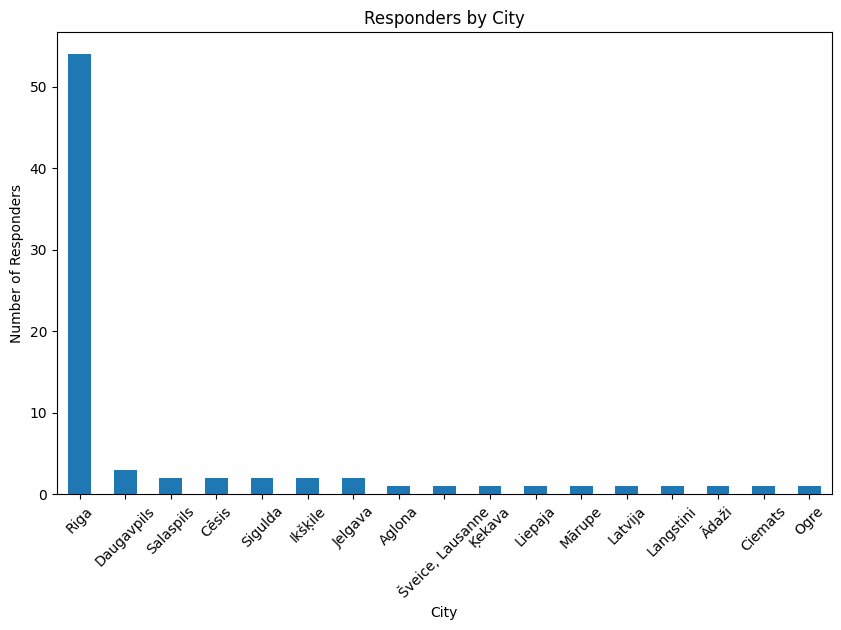

Keys before merging: Index(['Married or living with a partner', 'Divorced', 'Widowed', 'Single'], dtype='object', name='Marital Status')


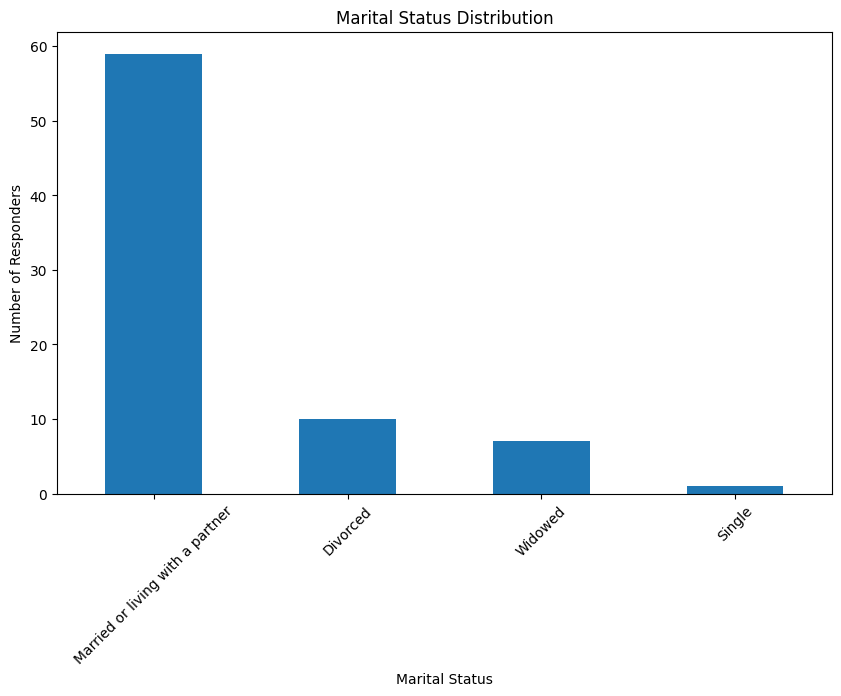

Keys before merging: Index([1.0, 2.0, 3.0, 0.0], dtype='float64', name='Number of children')


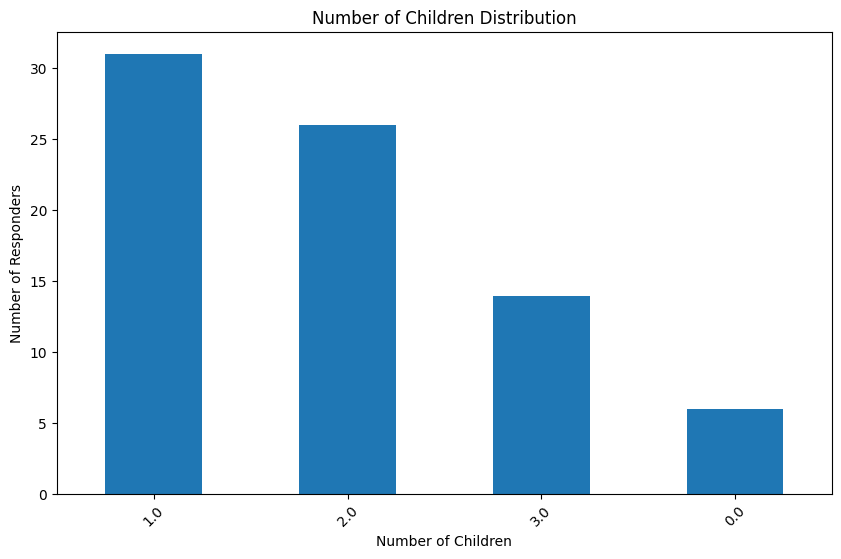

Keys before merging: Index(['Higher education (bachelor, masters)', 'Professional education',
       'Secondary education ', 'Primary education (till grade 9)',
       'Doctoral grade '],
      dtype='object', name='Highest level of school completed')


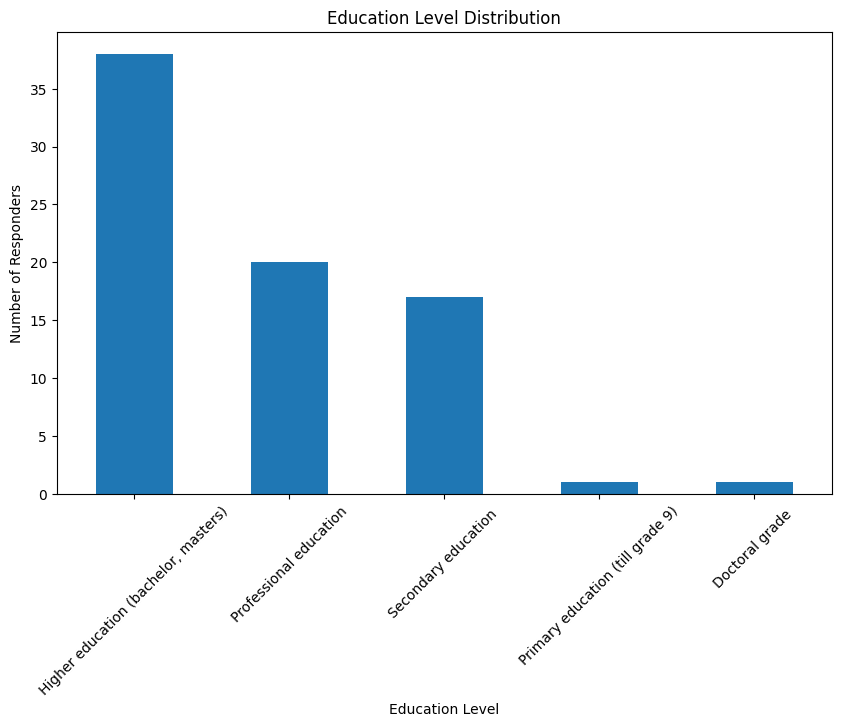

Keys before merging: Index(['White collars (office work)', 'Black collars (physical work)',
       'Education', 'Other', 'Medicine'],
      dtype='object', name='Occupation')


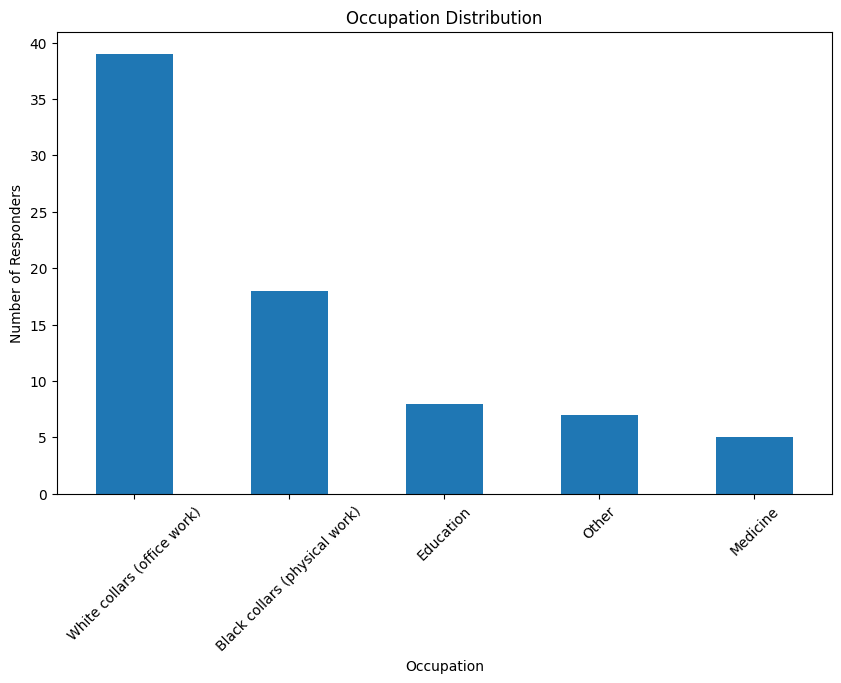

Keys before merging: Index(['Full-time', 'Part-time', 'Retired', 'Unemployed', 'Other', 'Student'], dtype='object', name='Employment status')


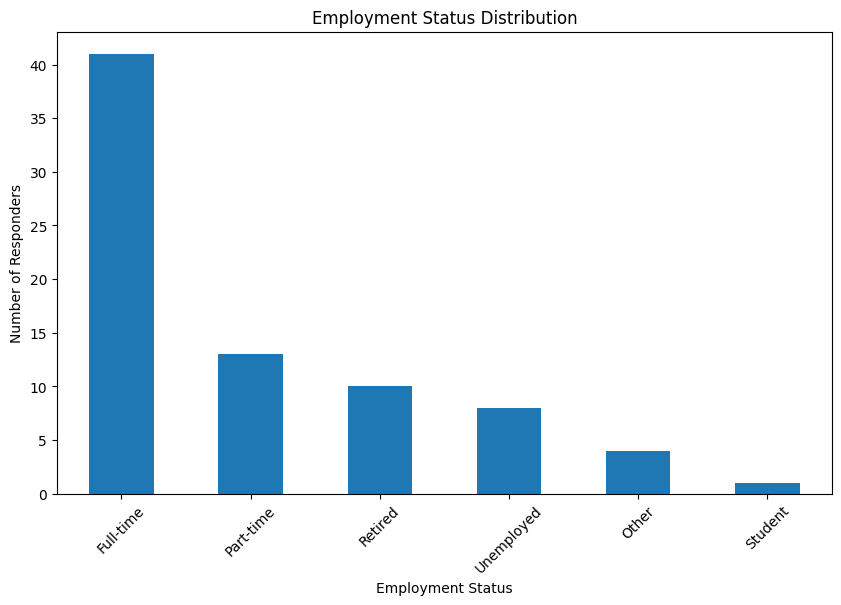

Keys before merging: Index(['Non-smoker', 'Current smoker', 'Former smoker'], dtype='object', name='Smoking status')


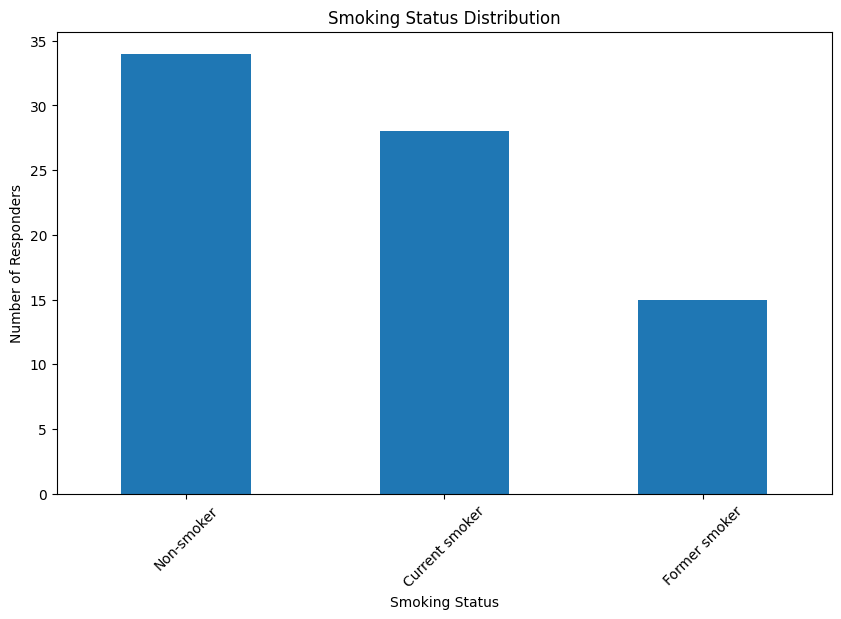

Keys before merging: Index(['Up to 500 ml of light beer, one glass (125 ml) of wine, or one shot glass (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor',
       'Up to 1 liter of light beer, three glasses (125 ml) of wine, or three shot glasses (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor',
       'No alcohol',
       'More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor'],
      dtype='object', name='Daily alcohol consumption ')


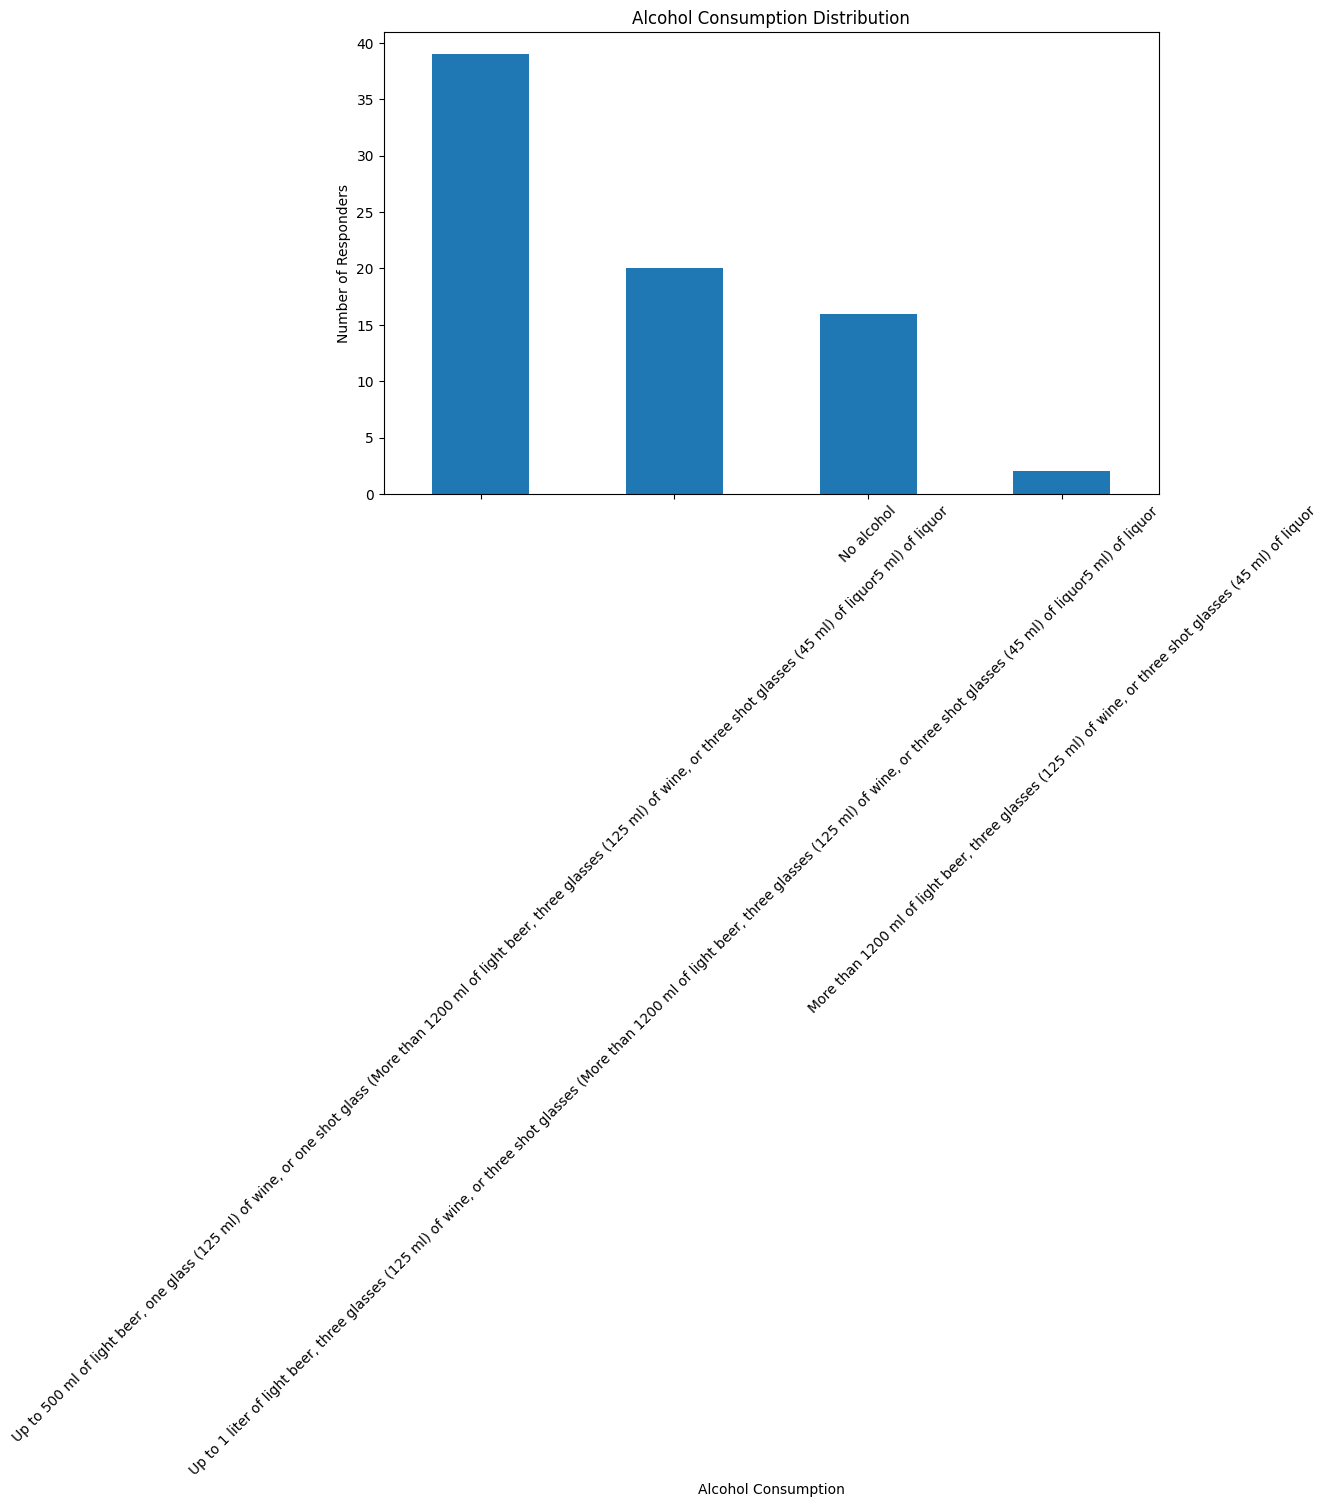

Keys before merging: Index(['Once a month', 'Once a week', 'Never', 'Everyday',
       'Once every 2 days'],
      dtype='object', name='Exercise frequency')


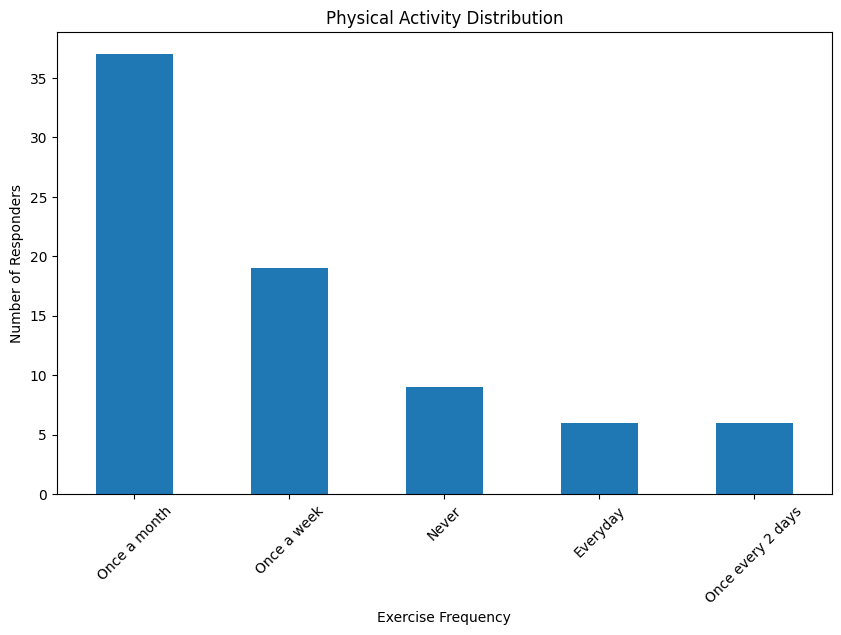

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Replace entries for 'Rīga' and 'Rìga' with 'Riga'
df['City/town/village'].replace({'Rīga': 'Riga', 'Rìga': 'Riga', 'Ríga': 'Riga'}, inplace=True)

# Age distribution visualization
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Mean age of female participants
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
display("Mean Age of Female Participants:", mean_age_female)

# Mean age of male participants
mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
display("Mean Age of Male Participants:", mean_age_male)

# Responders by city
city_distribution = df['City/town/village'].value_counts()
total_responders = len(df)
city_percentage = (city_distribution / total_responders) * 100

# Excluding the city "Šveice, Lausanne"
city_distribution_excluded = city_distribution.drop(index="Šveice, Lausanne")

# Recalculate percentages
city_percentage_excluded = (city_distribution_excluded / total_responders) * 100

# Display the updated distribution and percentage
display("Responders by City (Excluding 'Šveice, Lausanne' and Merging 'Rīga' and 'Rīgā' with 'Riga'):")
display(city_distribution_excluded)
display("\nPercentage by City (Excluding 'Šveice, Lausanne' and Merging 'Rīga' and 'Rīgā' with 'Riga'):")
display(city_percentage_excluded)

# Marital status
marital_status_distribution = df['Marital Status'].value_counts()
marital_status_percentage = (marital_status_distribution / total_responders) * 100
display("Marital Status Distribution:")
display(marital_status_distribution)
display("Marital Status Percentage:")
display(marital_status_percentage)

# Number of children
children_distribution = df['Number of children'].value_counts()
children_percentage = (children_distribution / total_responders) * 100
display("Number of Children Distribution:")
display(children_distribution)
display("Number of Children Percentage:")
display(children_percentage)

# Level of education
education_distribution = df['Highest level of school completed'].value_counts()
education_percentage = (education_distribution / total_responders) * 100
display("Education Level Distribution:")
display(education_distribution)
display("Education Level Percentage:")
display(education_percentage)

# Occupation and employment status
occupation_distribution = df['Occupation'].value_counts()
occupation_percentage = (occupation_distribution / total_responders) * 100
display("Occupation Distribution:")
display(occupation_distribution)
display("Occupation Percentage:")
display(occupation_percentage)

employment_status_distribution = df['Employment status'].value_counts()
employment_status_percentage = (employment_status_distribution / total_responders) * 100
display("Employment Status Distribution:")
display(employment_status_distribution)
display("Employment Status Percentage:")
display(employment_status_percentage)

# Smoking status
smoking_status_distribution = df['Smoking status'].value_counts()
smoking_status_percentage = (smoking_status_distribution / total_responders) * 100
display("Smoking Status Distribution:")
display(smoking_status_distribution)
display("Smoking Status Percentage:")
display(smoking_status_percentage)

# Alcohol consumption
alcohol_consumption_distribution = df['Daily alcohol consumption '].value_counts()
alcohol_consumption_percentage = (alcohol_consumption_distribution / total_responders) * 100
display("Alcohol Consumption Distribution:")
display(alcohol_consumption_distribution)
display("Alcohol Consumption Percentage:")
display(alcohol_consumption_percentage)

# Physical activity
physical_activity_distribution = df['Exercise frequency'].value_counts()
physical_activity_percentage = (physical_activity_distribution / total_responders) * 100
display("Physical Activity Distribution:")
display(physical_activity_distribution)
display("Physical Activity Percentage:")
display(physical_activity_percentage)

# Function to create distribution chart
def create_distribution_chart(data, xlabel, ylabel, title):

    # Print the keys before merging
    print("Keys before merging:", data.keys())
  
    # Create the distribution chart
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Responders by city
create_distribution_chart(city_distribution, 'City', 'Number of Responders', 'Responders by City')

# Marital status
create_distribution_chart(marital_status_distribution, 'Marital Status', 'Number of Responders', 'Marital Status Distribution')

# Number of children
create_distribution_chart(children_distribution, 'Number of Children', 'Number of Responders', 'Number of Children Distribution')

# Level of education
create_distribution_chart(education_distribution, 'Education Level', 'Number of Responders', 'Education Level Distribution')

# Occupation and employment status
create_distribution_chart(occupation_distribution, 'Occupation', 'Number of Responders', 'Occupation Distribution')
create_distribution_chart(employment_status_distribution, 'Employment Status', 'Number of Responders', 'Employment Status Distribution')

# Smoking status
create_distribution_chart(smoking_status_distribution, 'Smoking Status', 'Number of Responders', 'Smoking Status Distribution')

# Alcohol consumption
create_distribution_chart(alcohol_consumption_distribution, 'Alcohol Consumption', 'Number of Responders', 'Alcohol Consumption Distribution')

# Physical activity
create_distribution_chart(physical_activity_distribution, 'Exercise Frequency', 'Number of Responders', 'Physical Activity Distribution')

Healthcare-related information 
- Sample size and percentage of participants knowing their GP, visited a gynecologist 
- Sample size and percentage of participants who visited GP, and got health check-ups


'Sample size for Knowledge of General Practitioner:'

77

'Sample size for last visit to gynaecologist:'

77

'Sample size for health check-up frequency:'

77

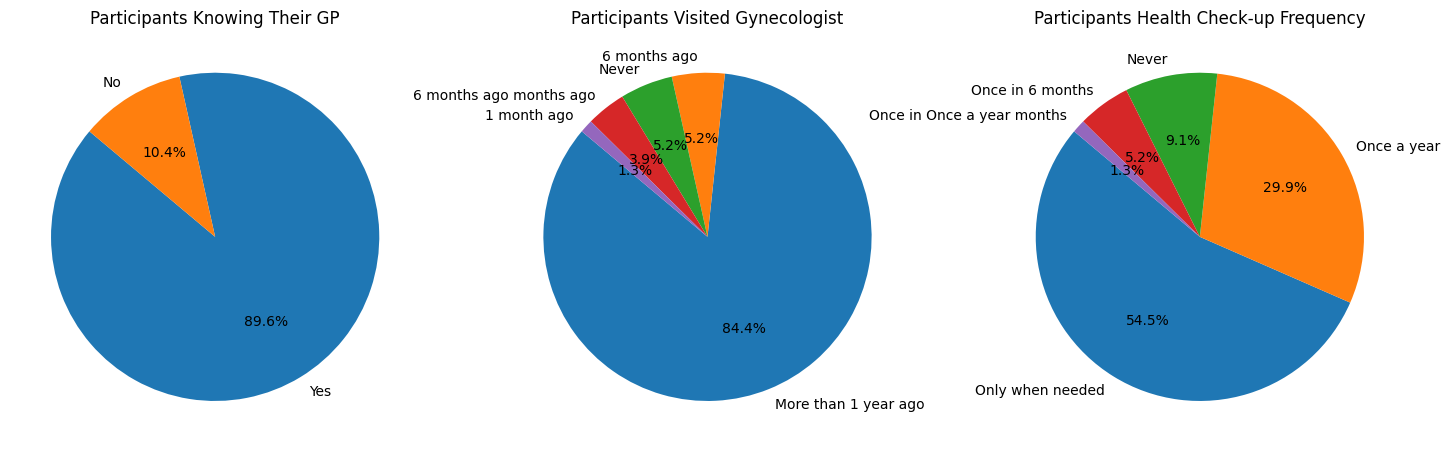

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Define the columns of interest
gp_column = 'Knowledge of General Practitioner'
gynecologist_column = 'For women only: last visit to gynaecologist'
health_checkup_column = 'Health check-up frequency'

# Sample size for Knowledge of General Practitioner
gp_knowledge_sample_size = df['Knowledge of General Practitioner'].notnull().sum()

# Sample size for last visit to gynaecologist
gynecologist_visit_sample_size = df['For women only: last visit to gynaecologist'].notnull().sum()

# Sample size for health check-up frequency
health_checkup_sample_size = df['Health check-up frequency'].notnull().sum()

display("Sample size for Knowledge of General Practitioner:", gp_knowledge_sample_size)
display("Sample size for last visit to gynaecologist:", gynecologist_visit_sample_size)
display("Sample size for health check-up frequency:", health_checkup_sample_size)


# Calculate sample size and percentage for participants knowing their GP
gp_counts = df[gp_column].value_counts()
gp_percentage = gp_counts / gp_counts.sum() * 100

# Calculate sample size and percentage for participants who visited a gynecologist
gynecologist_counts = df[gynecologist_column].value_counts()
gynecologist_percentage = gynecologist_counts / gynecologist_counts.sum() * 100

# Calculate sample size and percentage for participants who got health check-ups
health_checkup_counts = df[health_checkup_column].value_counts()
health_checkup_percentage = health_checkup_counts / health_checkup_counts.sum() * 100

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for participants knowing their GP
axes[0].pie(gp_counts, labels=gp_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Participants Knowing Their GP')

# Pie chart for participants who visited a gynecologist
axes[1].pie(gynecologist_counts, labels=gynecologist_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Participants Visited Gynecologist')

# Pie chart for participants who got health check-ups
axes[2].pie(health_checkup_counts, labels=health_checkup_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Participants Health Check-up Frequency')

plt.show()

Cancer screening-related questions 
- Sample size and percentage of participants familiar with the concept of cancer screening (Visualized as distribution?) - done
- Sample size and percentage for the question: What sources have you used to learn about cancer screening tests (if possible as visualization) - done 
- Sample size and percentage for received invitation letter and offer from GP

'Sample size for participants familiar with the concept of cancer screening:'

63

"Number of people who selected 'Yes':"

52

"Percentage of people who selected 'Yes':"

82.53968253968253

"Number of people who selected 'No':"

11

"Percentage of people who selected 'No':"

17.46031746031746

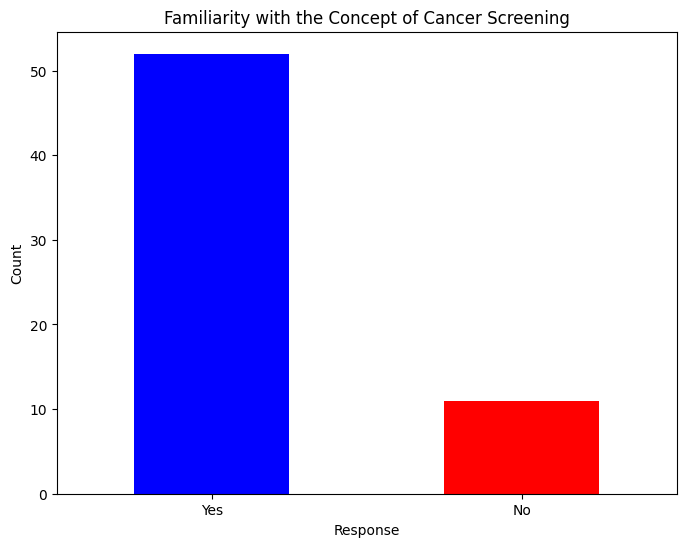

Column: Learnt about canceer screening tests from the Internet- Self-seeking information 
Sample size: 18
Percentage: 23.376623376623375

Column: Learnt about canceer screening tests from social media 
Sample size: 4
Percentage: 5.194805194805195

Column: Learnt about canceer screening tests from SPKC webpage
Sample size: 2
Percentage: 2.5974025974025974

Column: Learnt about canceer screening tests by my GP 
Sample size: 23
Percentage: 29.87012987012987

Column: Learnt about canceer screening tests by other healthcare organisations
Sample size: 11
Percentage: 14.285714285714285

Column: Learnt about canceer screening tests from advertisements 
Sample size: 2
Percentage: 2.5974025974025974

Column: Learnt about canceer screening tests from friends, family members
Sample size: 10
Percentage: 12.987012987012985

Column: Learnt about canceer screening tests from other resources 
Sample size: 13
Percentage: 16.883116883116884



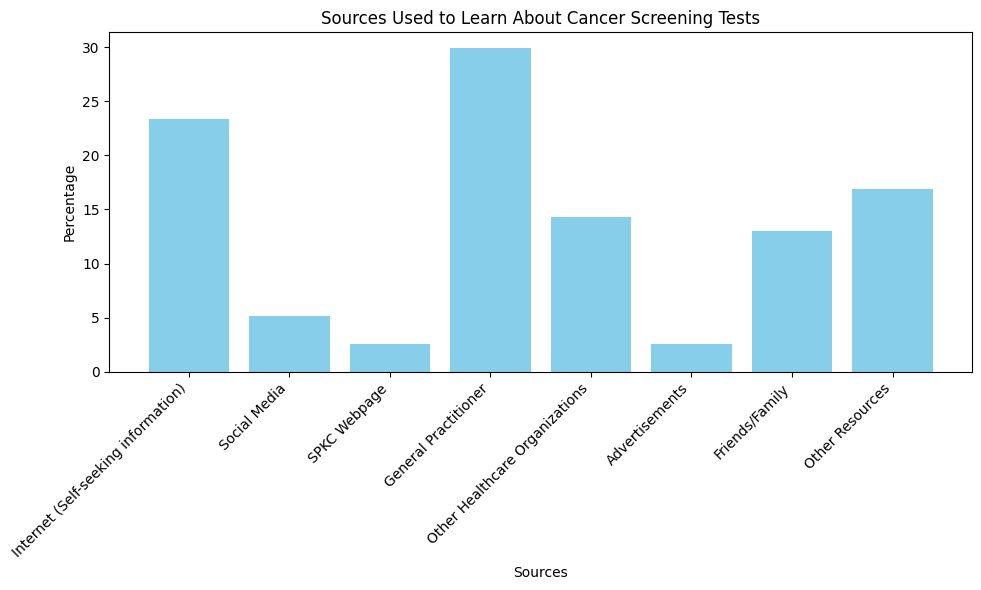

Invitation Columns:
Column: Have you received an invitation letter for cervical cancer screening during last year? 
Sample size: 9
Percentage: 7.6923076923076925

Column: Have you received an invitation letter for mammogrpahy during last year?
Sample size: 12
Percentage: 10.256410256410255



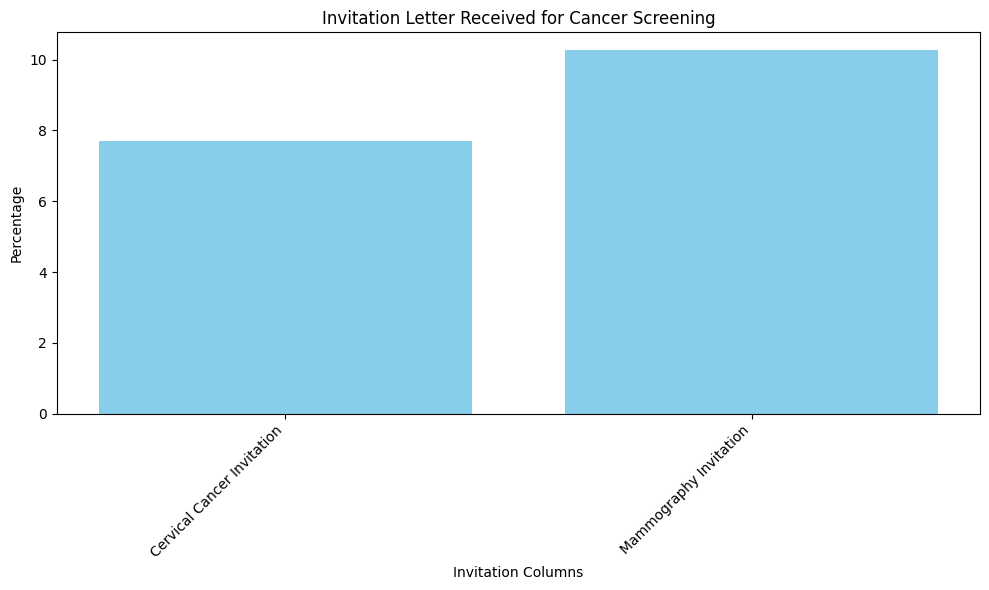

Offer Columns:
Column: Did your GP offer you a faecal-occult blood test during the last year? 
Sample size: 26
Percentage: 22.22222222222222

Column: Did your GP offer you a prostate examination during last year? 
Sample size: 7
Percentage: 5.982905982905983



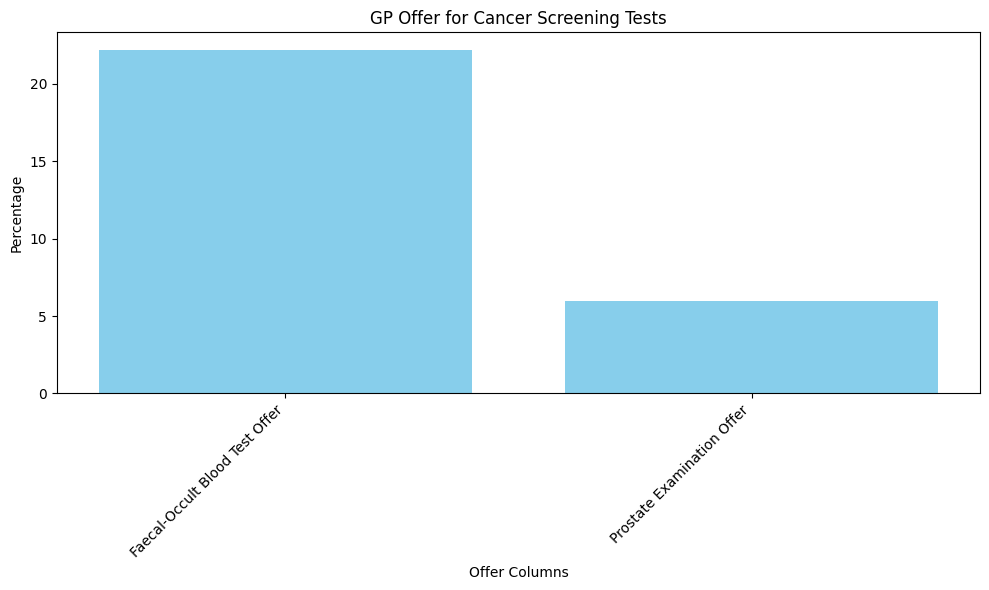

In [7]:
import matplotlib.pyplot as plt

# load the filtered dataset
df = pd.read_csv('filtered_data.csv')

# Calculate the sample size for participants familiar with the concept of cancer screening
cancer_screening_familiarity_sample_size = df['Familiarity with the concept of cancer screening in Latvia'].notnull().sum()

# Get the counts of 'Yes' and 'No' for familiarity with cancer screening
familiarity_counts = df['Familiarity with the concept of cancer screening in Latvia'].value_counts()

# Calculate the percentage of 'Yes' and 'No'
percentage_yes = (familiarity_counts.get('Yes', 0) / cancer_screening_familiarity_sample_size) * 100
percentage_no = (familiarity_counts.get('No', 0) / cancer_screening_familiarity_sample_size) * 100

# Print the sample size, counts, and percentages
display("Sample size for participants familiar with the concept of cancer screening:", cancer_screening_familiarity_sample_size)
display("Number of people who selected 'Yes':", familiarity_counts.get('Yes', 0))
display("Percentage of people who selected 'Yes':", percentage_yes)
display("Number of people who selected 'No':", familiarity_counts.get('No', 0))
display("Percentage of people who selected 'No':", percentage_no)

# Visualize the distribution
plt.figure(figsize=(8, 6))
familiarity_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Familiarity with the Concept of Cancer Screening')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Sample size for sources used to learn about cancer screening tests
sources_used = ['Learnt about canceer screening tests from the Internet- Self-seeking information ', 
                            'Learnt about canceer screening tests from social media ', 
                            'Learnt about canceer screening tests from SPKC webpage', 
                            'Learnt about canceer screening tests by my GP ', 
                            'Learnt about canceer screening tests by other healthcare organisations', 
                            'Learnt about canceer screening tests from advertisements ', 
                            'Learnt about canceer screening tests from friends, family members', 
                            'Learnt about canceer screening tests from other resources '
]

# Calculate the sample size and percentage for each source
sample_sizes = df[sources_used].apply(lambda column: column.notnull().sum())
total_sample_size = len(df)
percentages = (sample_sizes / total_sample_size) * 100

# Print column names, sample sizes, and percentages
for column, sample_size, percentage in zip(sources_used, sample_sizes, percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()

# Custom labels for better visualization
custom_labels = [
    'Internet (Self-seeking information)',
    'Social Media',
    'SPKC Webpage',
    'General Practitioner',
    'Other Healthcare Organizations',
    'Advertisements',
    'Friends/Family',
    'Other Resources'
]

# Visualize the percentages with custom labels
plt.figure(figsize=(10, 6))
plt.bar(custom_labels, percentages, color='skyblue')
plt.title('Sources Used to Learn About Cancer Screening Tests')
plt.xlabel('Sources')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# ------

# Define the columns
invitation_columns = [
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?',
]
offer_columns = [
    'Did your GP offer you a faecal-occult blood test during the last year? ',
    'Did your GP offer you a prostate examination during last year? '
]

# Calculate sample size and percentage for invitation columns
invitation_sample_sizes = df[invitation_columns].apply(lambda column: column.eq('Yes').sum())
total_sample_size = 117
invitation_percentages = (invitation_sample_sizes / total_sample_size) * 100

# Print results for invitation columns
print("Invitation Columns:")
for column, sample_size, percentage in zip(invitation_columns, invitation_sample_sizes, invitation_percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()


# Custom labels for invitation column
custom_invitation_labels = [
    'Cervical Cancer Invitation',
    'Mammography Invitation',
]

# Visualize invitation percentages with custom labels
plt.figure(figsize=(10, 6))
plt.bar(custom_invitation_labels, invitation_percentages, color='skyblue')
plt.title('Invitation Letter Received for Cancer Screening')
plt.xlabel('Invitation Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate sample size and percentage for offer columns
offer_sample_sizes = df[offer_columns].apply(lambda column: column.eq('Yes').sum())
offer_percentages = (offer_sample_sizes / total_sample_size) * 100

# Print results for offer columns
print("Offer Columns:")
for column, sample_size, percentage in zip(offer_columns, offer_sample_sizes, offer_percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()

# Custom labels for offer column

custom_offer_labels = [
    'Faecal-Occult Blood Test Offer',
    'Prostate Examination Offer',
]

# Visualize offer percentages with custom labels
plt.figure(figsize=(10, 6))
plt.bar(custom_offer_labels, offer_percentages, color='skyblue')
plt.title('GP Offer for Cancer Screening Tests')
plt.xlabel('Offer Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
df = pd.read_csv('filtered_data.csv')
print(df.columns.tolist())

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

Influencing factor (strongly agree - strongly disagree tables)
It is possible to make for each table a Stacked bar chart?

<Figure size 1000x600 with 0 Axes>

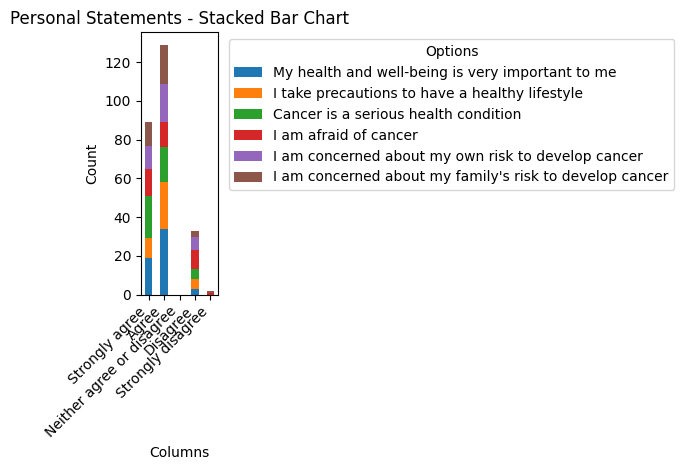

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/119095723.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

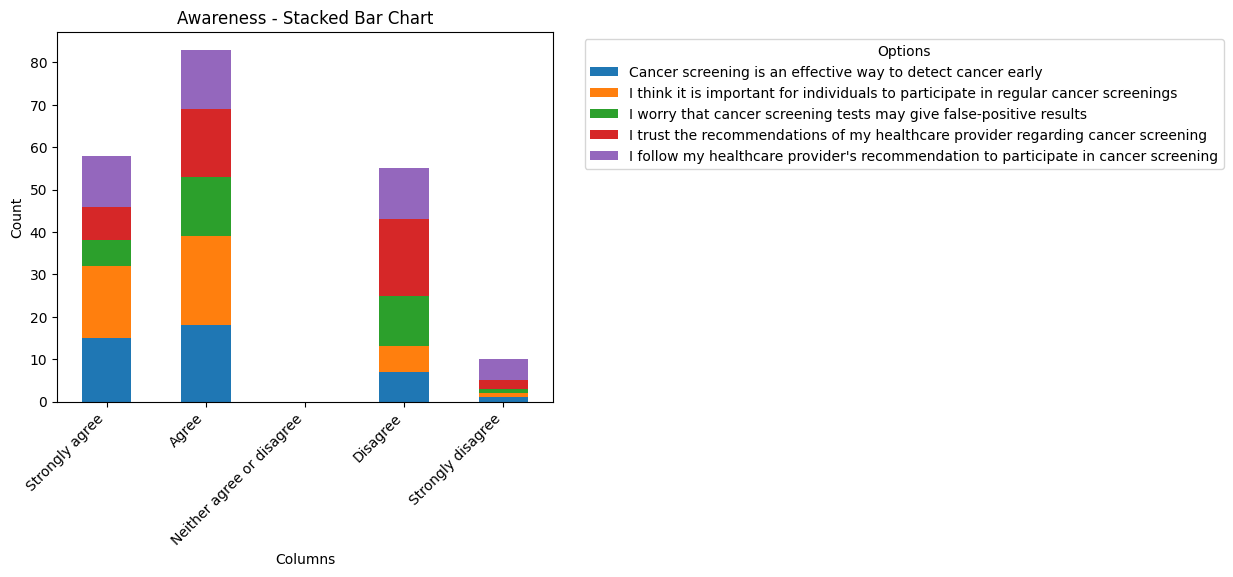

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/119095723.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

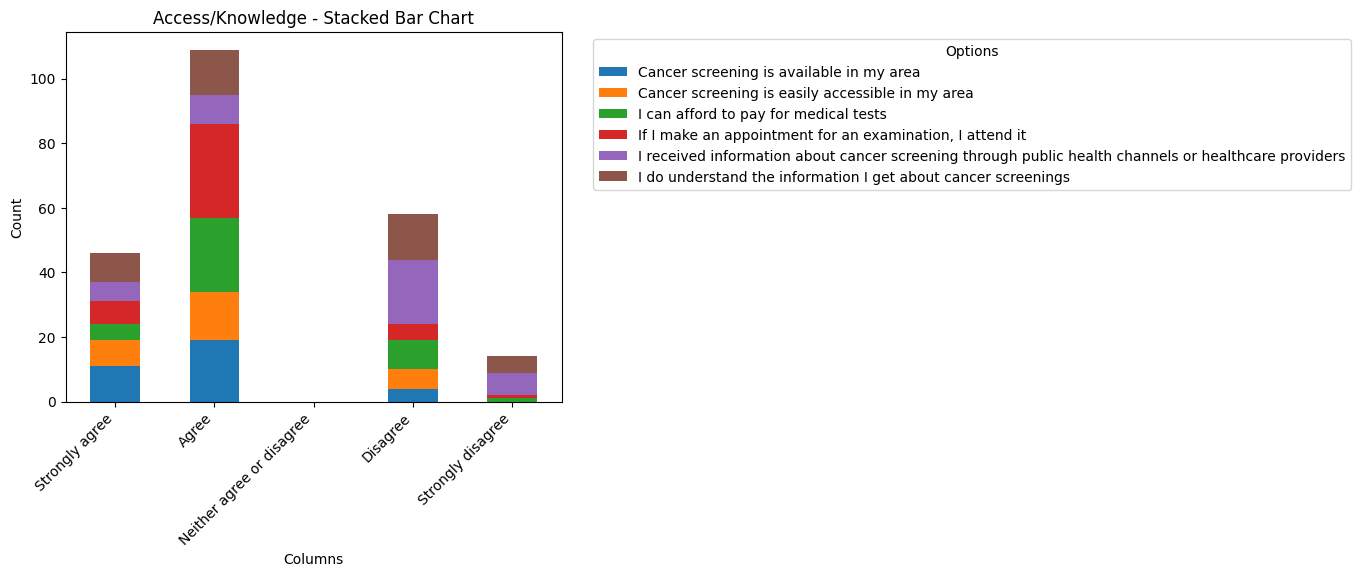

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/119095723.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

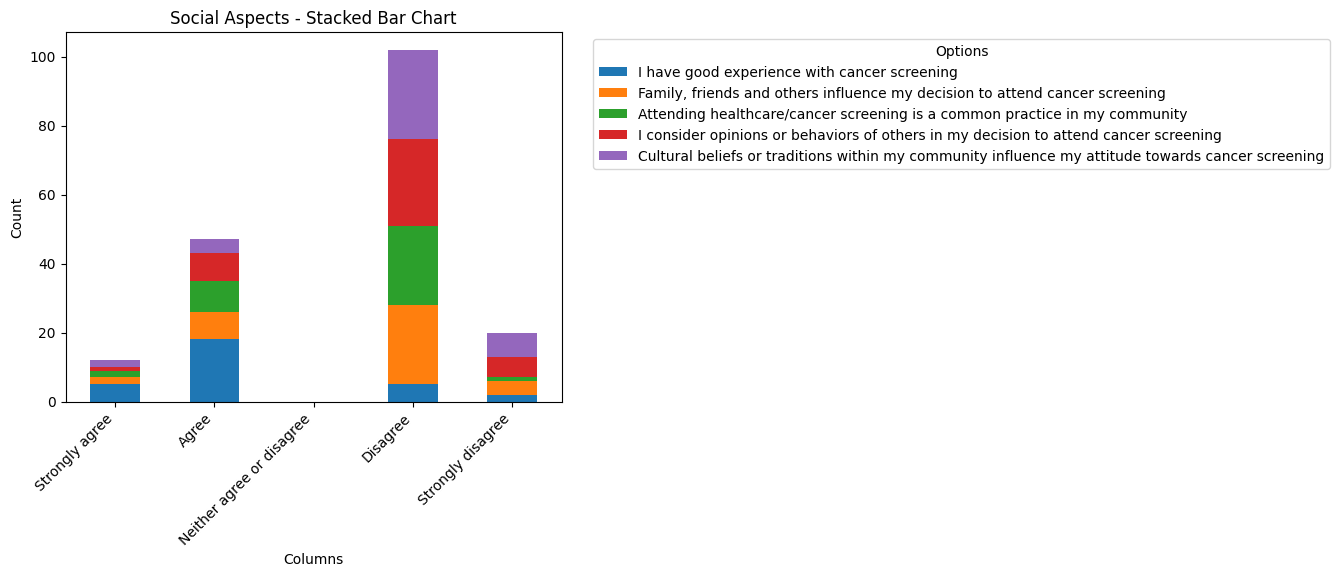

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/119095723.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

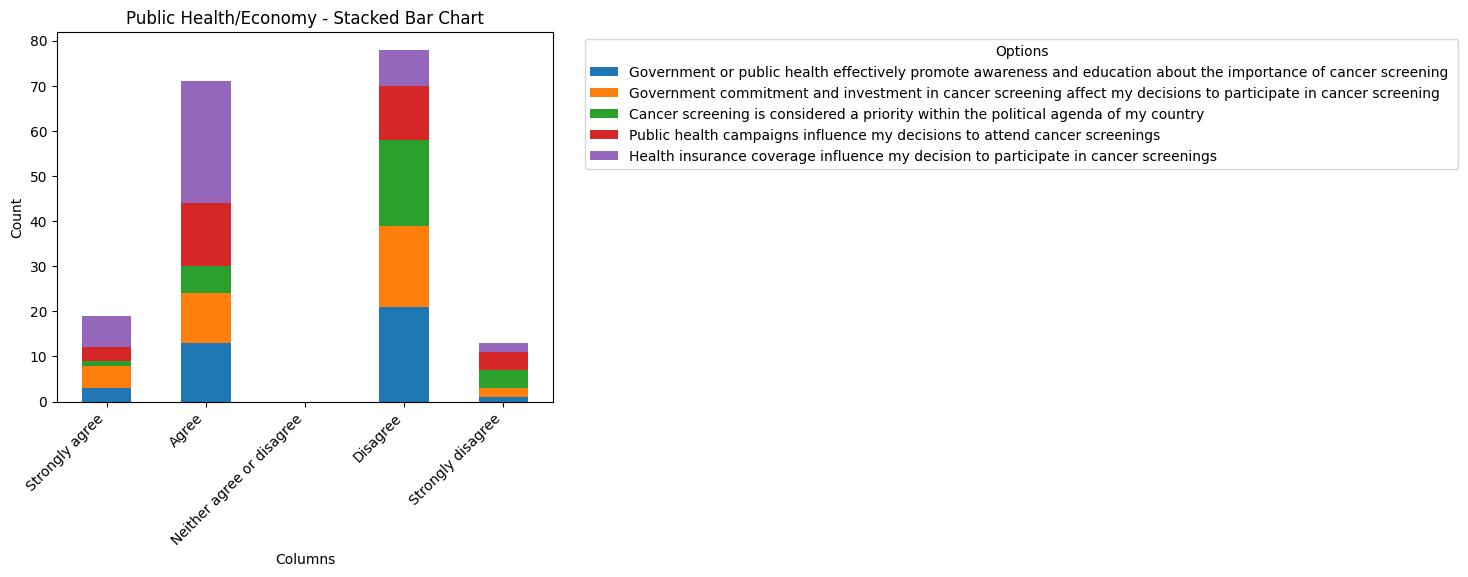

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('filtered_data.csv')

# Define columns for Personal Statements, Awareness, etc.
personal_statements_columns = [
    'My health and well-being is very important to me',
    'I take precautions to have a healthy lifestyle',
    'Cancer is a serious health condition',
    'I am afraid of cancer ',
    'I am concerned about my own risk to develop cancer ',
    "I am concerned about my family's risk to develop cancer"
]

awareness_columns = [
    'Cancer screening is an effective way to detect cancer early',
    'I think it is important for individuals to participate in regular cancer screenings',
    'I worry that cancer screening tests may give false-positive results',
    'I trust the recommendations of my healthcare provider regarding cancer screening',
    "I follow my healthcare provider's recommendation to participate in cancer screening"
]

access_knowledge_columns = [
    'Cancer screening is available in my area ',
    'Cancer screening is easily accessible in my area ',
    'I can afford to pay for medical tests ',
    'If I make an appointment for an examination, I attend it  ',
    'I received information about cancer screening through public health channels or healthcare providers',
    'I do understand the information I get about cancer screenings'
]

social_aspects_columns = [
    'I have good experience with cancer screening ',
    'Family, friends and others influence my decision to attend cancer screening',
    'Attending healthcare/cancer screening is a common practice in my community ',
    'I consider opinions or behaviors of others in my decision to attend cancer screening',
    'Cultural beliefs or traditions within my community influence my attitude towards cancer screening'
]

public_health_economy_columns = [
    'Government or public health effectively promote awareness and education about the importance of cancer screening ',
    'Government commitment and investment in cancer screening affect my decisions to participate in cancer screening ',
    'Cancer screening is considered a priority within the political agenda of my country ',
    'Public health campaigns influence my decisions to attend cancer screenings',
    'Health insurance coverage influence my decision to participate in cancer screenings'
]

# Function to calculate count of options
def calculate_option_counts(columns):
    option_counts = pd.concat([df[column].value_counts().reindex(['Strongly agree', 'Agree', 'Neither agree or disagree', 'Disagree', 'Strongly disagree'], fill_value=0) for column in columns], axis=1, keys=columns)
    return option_counts

# Function to create stacked bar chart
def create_stacked_bar_chart(option_counts, aspect):
    plt.figure(figsize=(10, 6))
    option_counts.plot(kind='bar', stacked=True)
    plt.title(f'{aspect} - Stacked Bar Chart')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Calculate counts and create stacked bar charts for each aspect
columns_lists = [
    personal_statements_columns,
    awareness_columns,
    access_knowledge_columns,
    social_aspects_columns,
    public_health_economy_columns
]

aspects = ['Personal Statements', 'Awareness', 'Access/Knowledge', 'Social Aspects', 'Public Health/Economy']

for columns, aspect in zip(columns_lists, aspects):
    aspect_counts = calculate_option_counts(columns)
    create_stacked_bar_chart(aspect_counts, aspect)


Motivation factors: Is it possible to have something like a pie chart of bar chart/histogram? Also with the sample size and percentages for each factor?

    

Column: My health and well-being is very important to me
Sample Size: 56
Percentages:
My health and well-being is very important to me
Strongly agree               33.928571
Agree                        60.714286
Neither agree or disagree     0.000000
Disagree                      5.357143
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
My health and well-being is very important to me
Strongly agree               19
Agree                        34
Neither agree or disagree     0
Disagree                      3
Strongly disagree             0
Name: count, dtype: int64



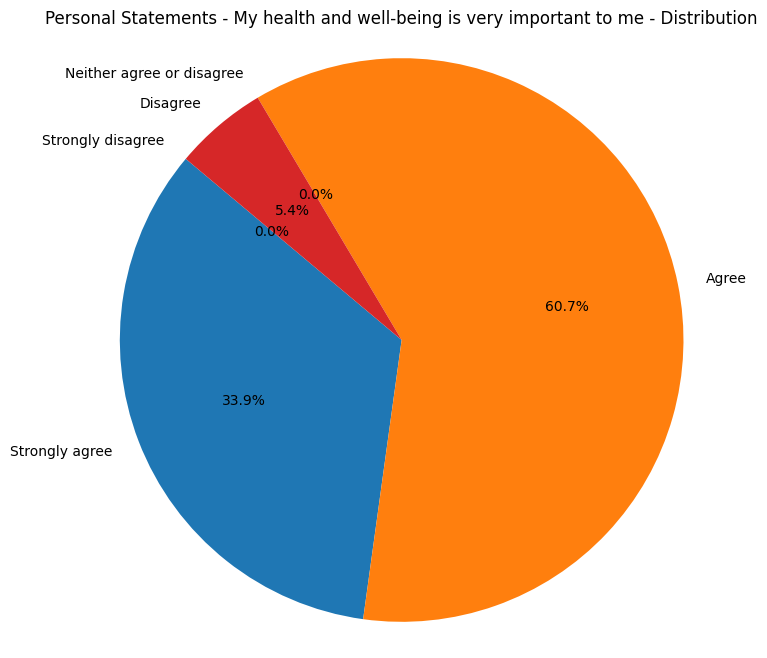

Column: I take precautions to have a healthy lifestyle
Sample Size: 39
Percentages:
I take precautions to have a healthy lifestyle
Strongly agree               25.641026
Agree                        61.538462
Neither agree or disagree     0.000000
Disagree                     12.820513
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
I take precautions to have a healthy lifestyle
Strongly agree               10
Agree                        24
Neither agree or disagree     0
Disagree                      5
Strongly disagree             0
Name: count, dtype: int64



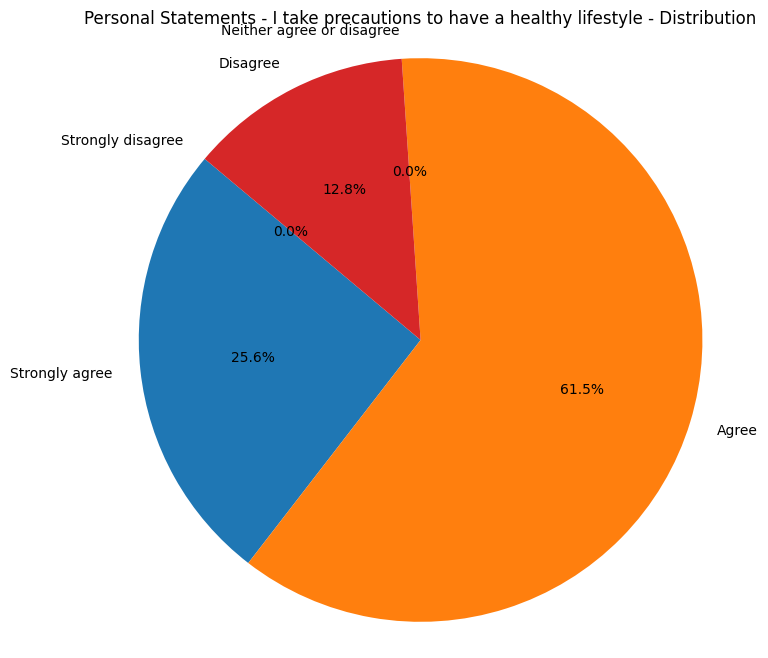

Column: Cancer is a serious health condition
Sample Size: 45
Percentages:
Cancer is a serious health condition
Strongly agree               48.888889
Agree                        40.000000
Neither agree or disagree     0.000000
Disagree                     11.111111
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
Cancer is a serious health condition
Strongly agree               22
Agree                        18
Neither agree or disagree     0
Disagree                      5
Strongly disagree             0
Name: count, dtype: int64



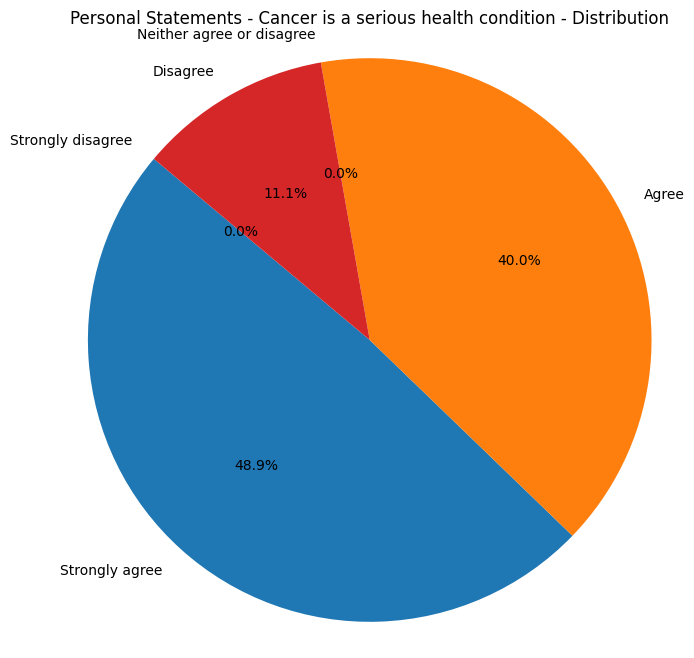

Column: I am afraid of cancer 
Sample Size: 38
Percentages:
I am afraid of cancer 
Strongly agree               36.842105
Agree                        34.210526
Neither agree or disagree     0.000000
Disagree                     26.315789
Strongly disagree             2.631579
Name: count, dtype: float64
Option Counts:
I am afraid of cancer 
Strongly agree               14
Agree                        13
Neither agree or disagree     0
Disagree                     10
Strongly disagree             1
Name: count, dtype: int64



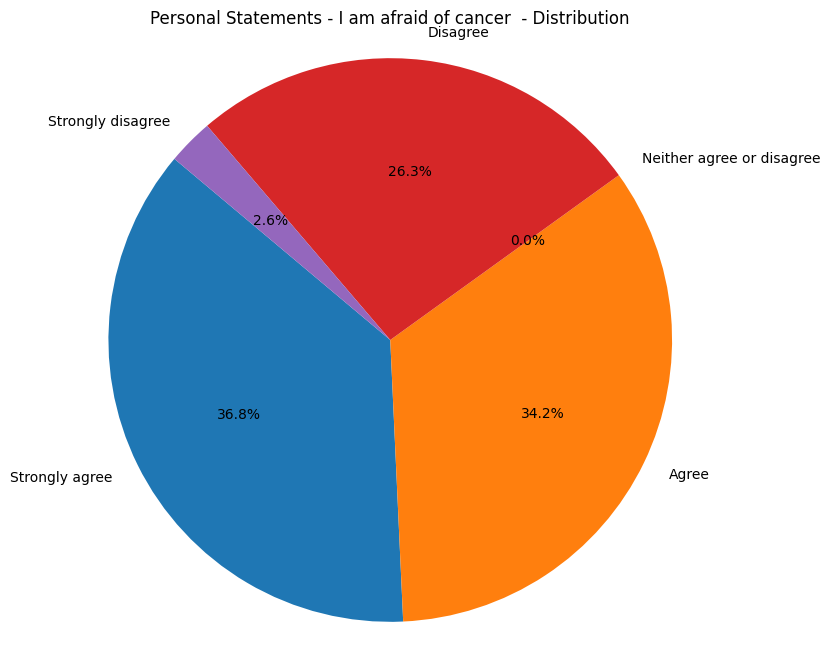

Column: I am concerned about my own risk to develop cancer 
Sample Size: 39
Percentages:
I am concerned about my own risk to develop cancer 
Strongly agree               30.769231
Agree                        51.282051
Neither agree or disagree     0.000000
Disagree                     17.948718
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
I am concerned about my own risk to develop cancer 
Strongly agree               12
Agree                        20
Neither agree or disagree     0
Disagree                      7
Strongly disagree             0
Name: count, dtype: int64



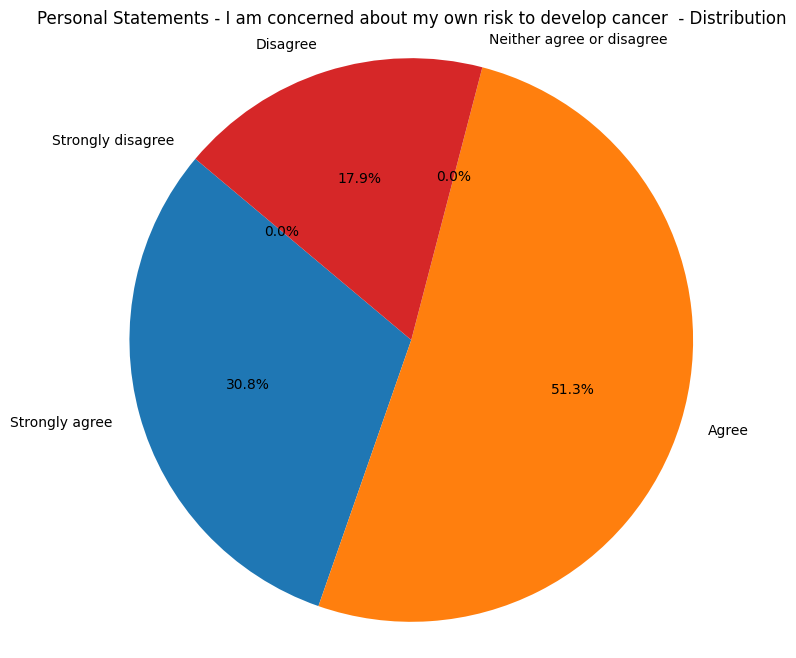

Column: I am concerned about my family's risk to develop cancer
Sample Size: 36
Percentages:
I am concerned about my family's risk to develop cancer
Strongly agree               33.333333
Agree                        55.555556
Neither agree or disagree     0.000000
Disagree                      8.333333
Strongly disagree             2.777778
Name: count, dtype: float64
Option Counts:
I am concerned about my family's risk to develop cancer
Strongly agree               12
Agree                        20
Neither agree or disagree     0
Disagree                      3
Strongly disagree             1
Name: count, dtype: int64



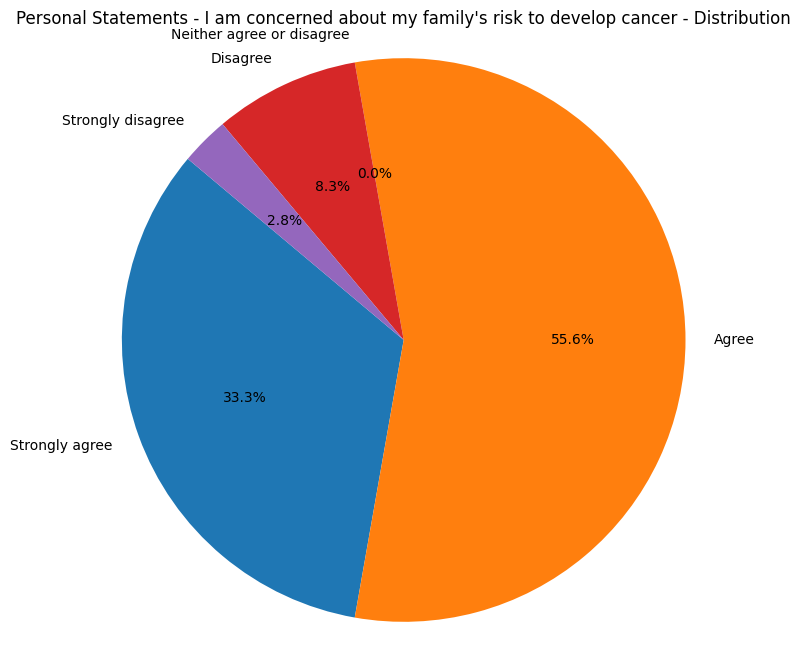

Column: Cancer screening is an effective way to detect cancer early
Sample Size: 41
Percentages:
Cancer screening is an effective way to detect cancer early
Strongly agree               36.585366
Agree                        43.902439
Neither agree or disagree     0.000000
Disagree                     17.073171
Strongly disagree             2.439024
Name: count, dtype: float64
Option Counts:
Cancer screening is an effective way to detect cancer early
Strongly agree               15
Agree                        18
Neither agree or disagree     0
Disagree                      7
Strongly disagree             1
Name: count, dtype: int64



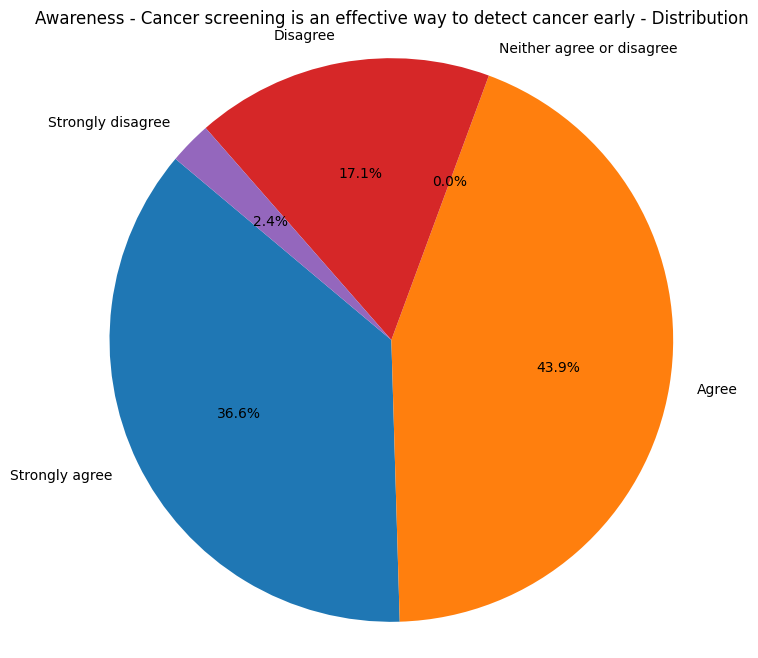

Column: I think it is important for individuals to participate in regular cancer screenings
Sample Size: 45
Percentages:
I think it is important for individuals to participate in regular cancer screenings
Strongly agree               37.777778
Agree                        46.666667
Neither agree or disagree     0.000000
Disagree                     13.333333
Strongly disagree             2.222222
Name: count, dtype: float64
Option Counts:
I think it is important for individuals to participate in regular cancer screenings
Strongly agree               17
Agree                        21
Neither agree or disagree     0
Disagree                      6
Strongly disagree             1
Name: count, dtype: int64



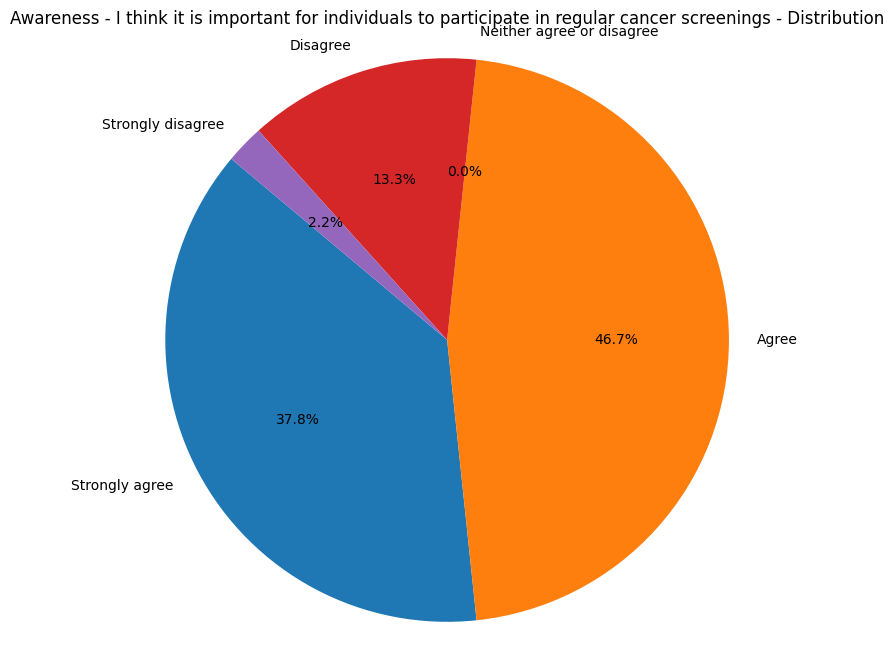

Column: I worry that cancer screening tests may give false-positive results
Sample Size: 33
Percentages:
I worry that cancer screening tests may give false-positive results
Strongly agree               18.181818
Agree                        42.424242
Neither agree or disagree     0.000000
Disagree                     36.363636
Strongly disagree             3.030303
Name: count, dtype: float64
Option Counts:
I worry that cancer screening tests may give false-positive results
Strongly agree                6
Agree                        14
Neither agree or disagree     0
Disagree                     12
Strongly disagree             1
Name: count, dtype: int64



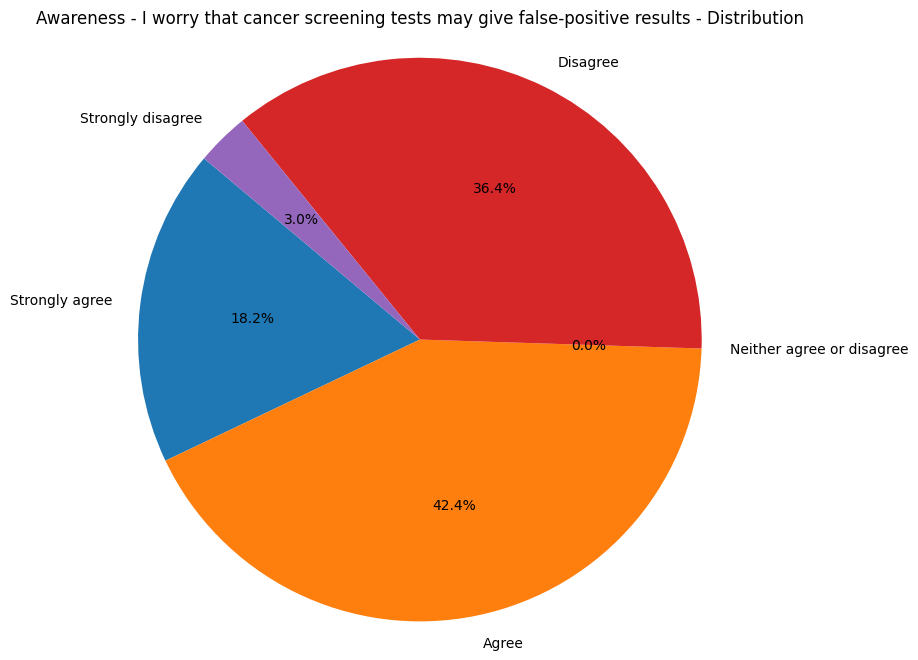

Column: I trust the recommendations of my healthcare provider regarding cancer screening
Sample Size: 44
Percentages:
I trust the recommendations of my healthcare provider regarding cancer screening
Strongly agree               18.181818
Agree                        36.363636
Neither agree or disagree     0.000000
Disagree                     40.909091
Strongly disagree             4.545455
Name: count, dtype: float64
Option Counts:
I trust the recommendations of my healthcare provider regarding cancer screening
Strongly agree                8
Agree                        16
Neither agree or disagree     0
Disagree                     18
Strongly disagree             2
Name: count, dtype: int64



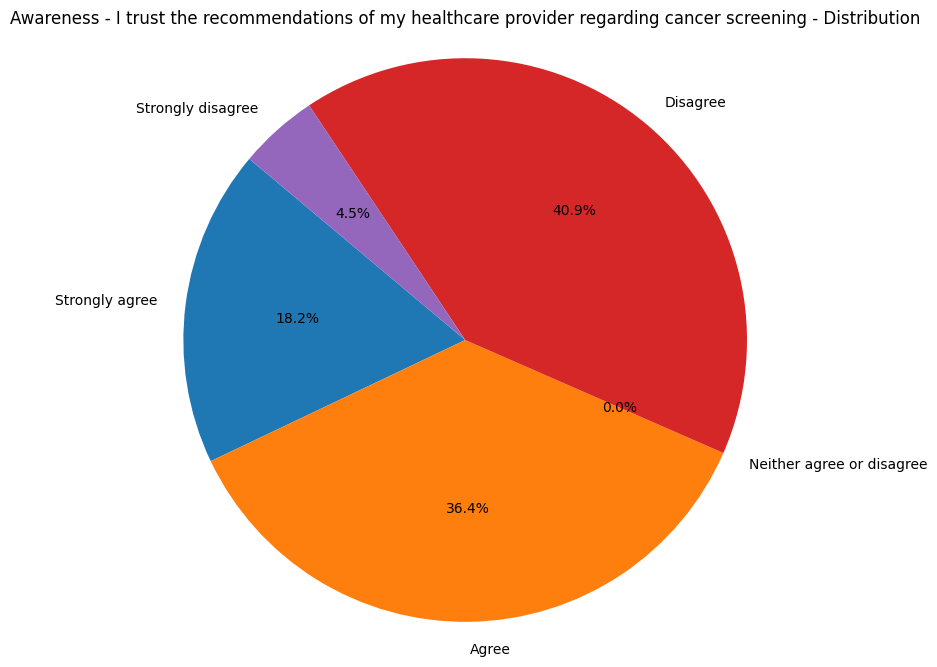

Column: I follow my healthcare provider's recommendation to participate in cancer screening
Sample Size: 43
Percentages:
I follow my healthcare provider's recommendation to participate in cancer screening
Strongly agree               27.906977
Agree                        32.558140
Neither agree or disagree     0.000000
Disagree                     27.906977
Strongly disagree            11.627907
Name: count, dtype: float64
Option Counts:
I follow my healthcare provider's recommendation to participate in cancer screening
Strongly agree               12
Agree                        14
Neither agree or disagree     0
Disagree                     12
Strongly disagree             5
Name: count, dtype: int64



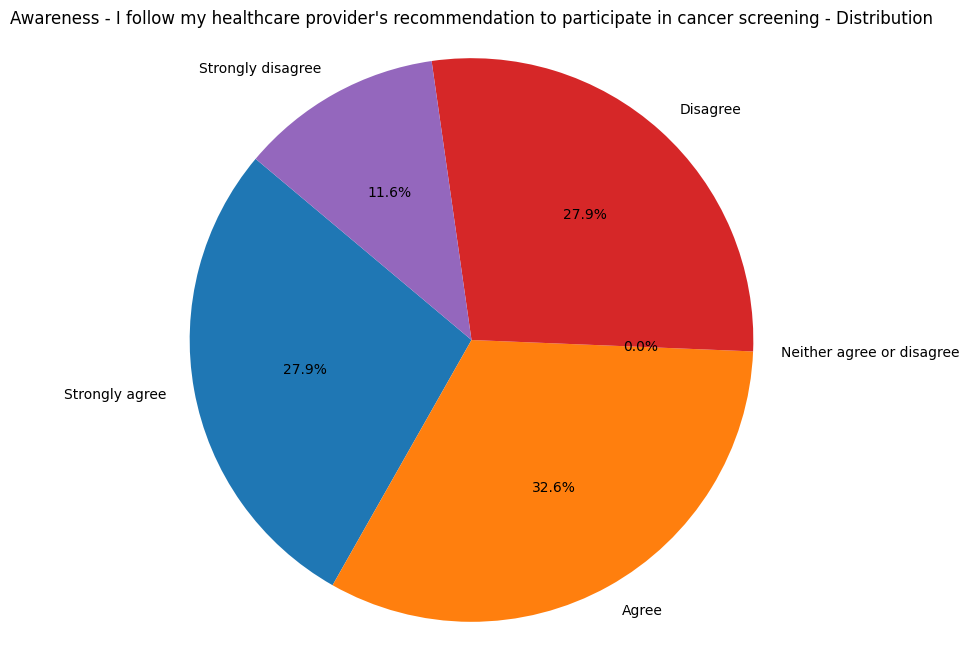

Column: Cancer screening is available in my area 
Sample Size: 34
Percentages:
Cancer screening is available in my area 
Strongly agree               32.352941
Agree                        55.882353
Neither agree or disagree     0.000000
Disagree                     11.764706
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
Cancer screening is available in my area 
Strongly agree               11
Agree                        19
Neither agree or disagree     0
Disagree                      4
Strongly disagree             0
Name: count, dtype: int64



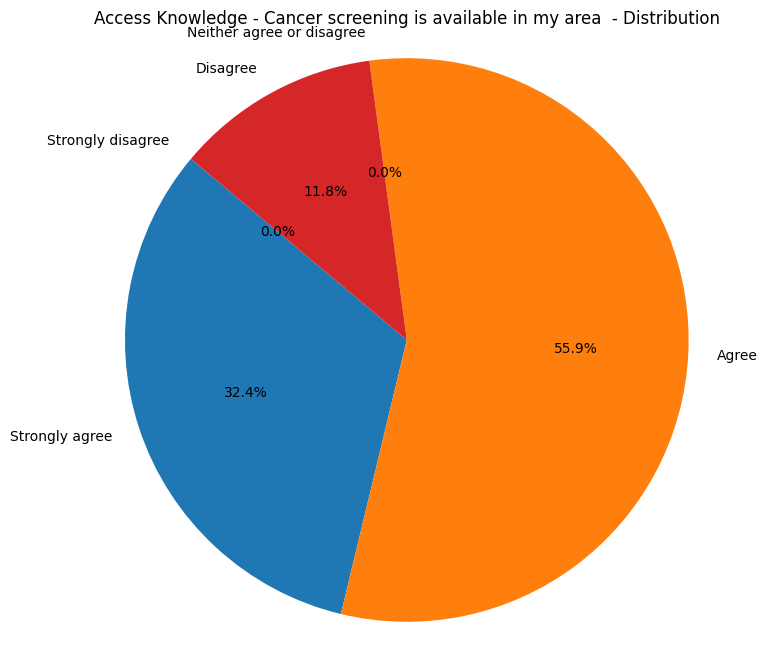

Column: Cancer screening is easily accessible in my area 
Sample Size: 29
Percentages:
Cancer screening is easily accessible in my area 
Strongly agree               27.586207
Agree                        51.724138
Neither agree or disagree     0.000000
Disagree                     20.689655
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
Cancer screening is easily accessible in my area 
Strongly agree                8
Agree                        15
Neither agree or disagree     0
Disagree                      6
Strongly disagree             0
Name: count, dtype: int64



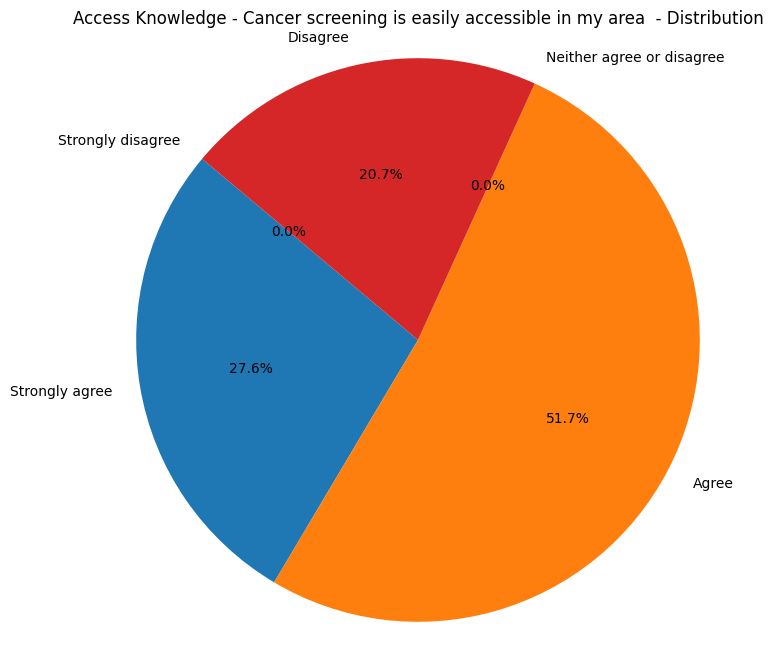

Column: I can afford to pay for medical tests 
Sample Size: 38
Percentages:
I can afford to pay for medical tests 
Strongly agree               13.157895
Agree                        60.526316
Neither agree or disagree     0.000000
Disagree                     23.684211
Strongly disagree             2.631579
Name: count, dtype: float64
Option Counts:
I can afford to pay for medical tests 
Strongly agree                5
Agree                        23
Neither agree or disagree     0
Disagree                      9
Strongly disagree             1
Name: count, dtype: int64



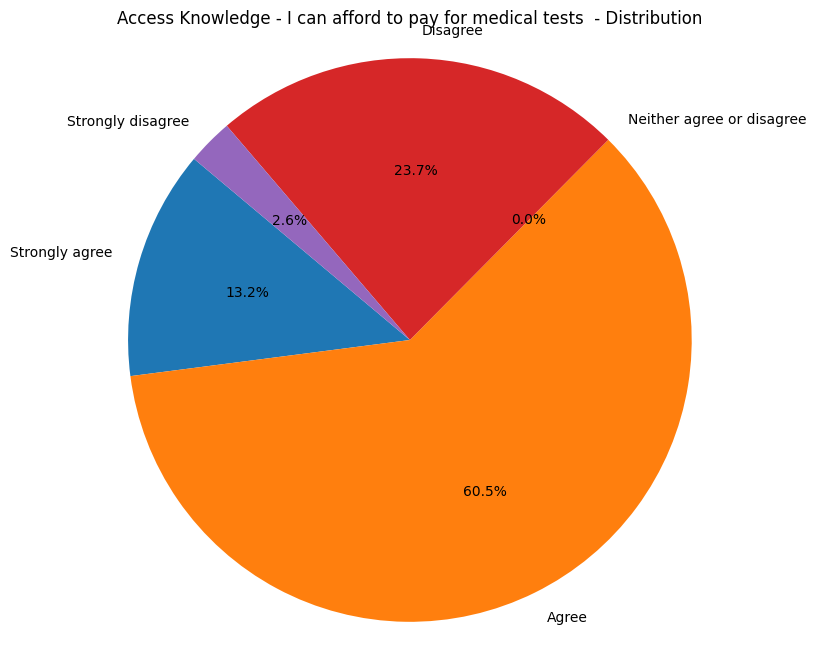

Column: If I make an appointment for an examination, I attend it  
Sample Size: 42
Percentages:
If I make an appointment for an examination, I attend it  
Strongly agree               16.666667
Agree                        69.047619
Neither agree or disagree     0.000000
Disagree                     11.904762
Strongly disagree             2.380952
Name: count, dtype: float64
Option Counts:
If I make an appointment for an examination, I attend it  
Strongly agree                7
Agree                        29
Neither agree or disagree     0
Disagree                      5
Strongly disagree             1
Name: count, dtype: int64



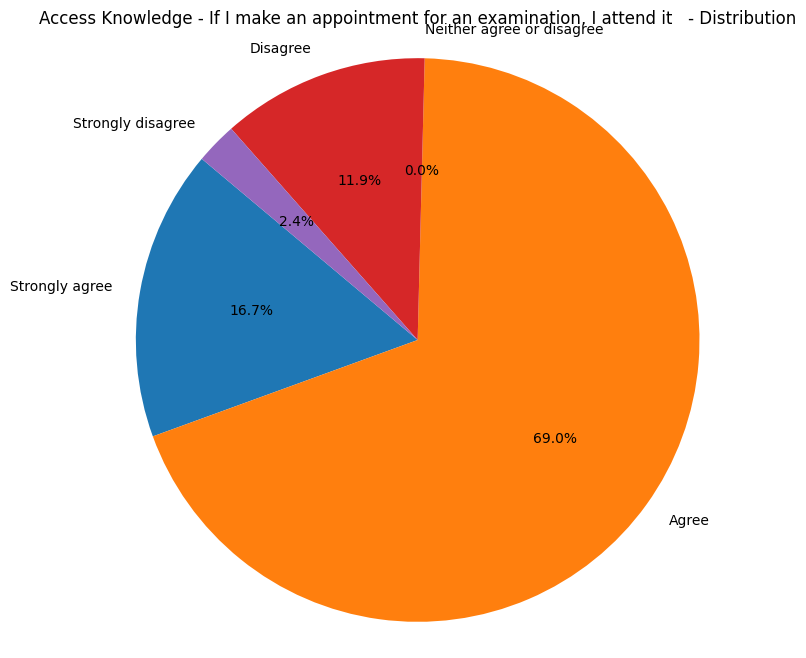

Column: I received information about cancer screening through public health channels or healthcare providers
Sample Size: 42
Percentages:
I received information about cancer screening through public health channels or healthcare providers
Strongly agree               14.285714
Agree                        21.428571
Neither agree or disagree     0.000000
Disagree                     47.619048
Strongly disagree            16.666667
Name: count, dtype: float64
Option Counts:
I received information about cancer screening through public health channels or healthcare providers
Strongly agree                6
Agree                         9
Neither agree or disagree     0
Disagree                     20
Strongly disagree             7
Name: count, dtype: int64



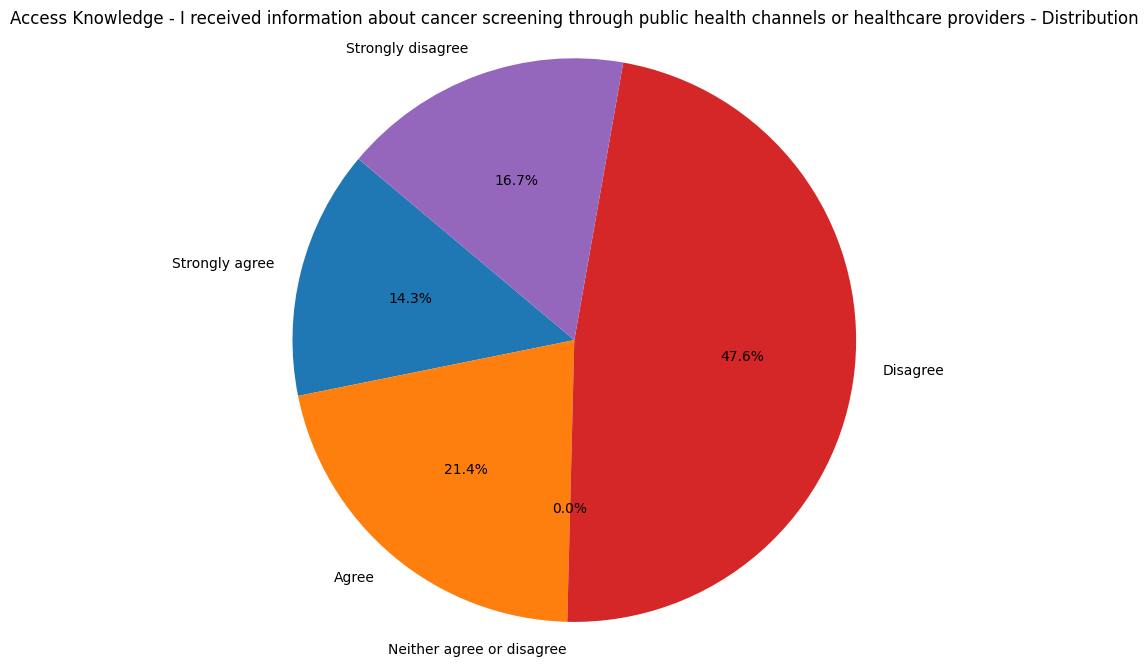

Column: I do understand the information I get about cancer screenings
Sample Size: 42
Percentages:
I do understand the information I get about cancer screenings
Strongly agree               21.428571
Agree                        33.333333
Neither agree or disagree     0.000000
Disagree                     33.333333
Strongly disagree            11.904762
Name: count, dtype: float64
Option Counts:
I do understand the information I get about cancer screenings
Strongly agree                9
Agree                        14
Neither agree or disagree     0
Disagree                     14
Strongly disagree             5
Name: count, dtype: int64



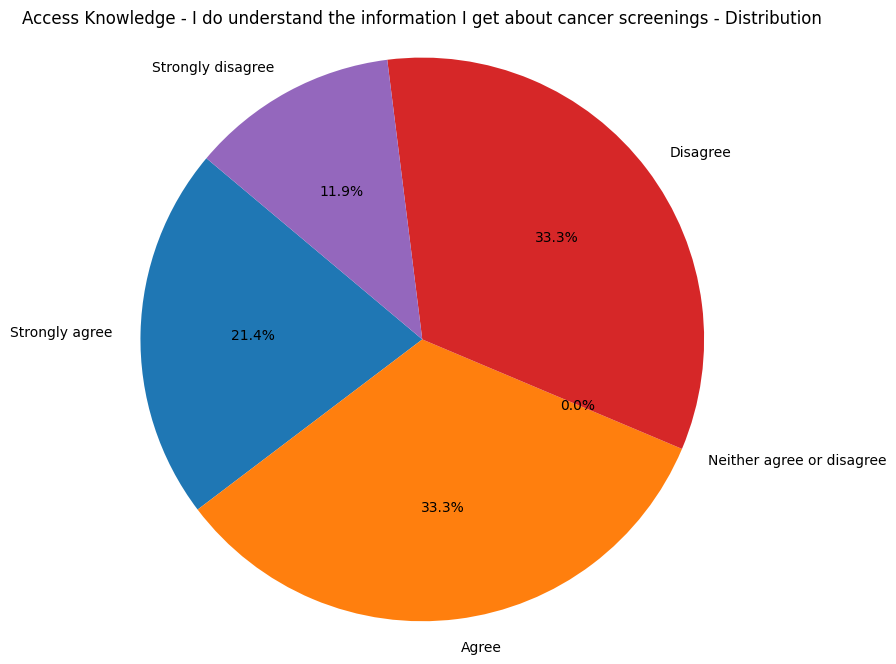

Column: I have good experience with cancer screening 
Sample Size: 30
Percentages:
I have good experience with cancer screening 
Strongly agree               16.666667
Agree                        60.000000
Neither agree or disagree     0.000000
Disagree                     16.666667
Strongly disagree             6.666667
Name: count, dtype: float64
Option Counts:
I have good experience with cancer screening 
Strongly agree                5
Agree                        18
Neither agree or disagree     0
Disagree                      5
Strongly disagree             2
Name: count, dtype: int64



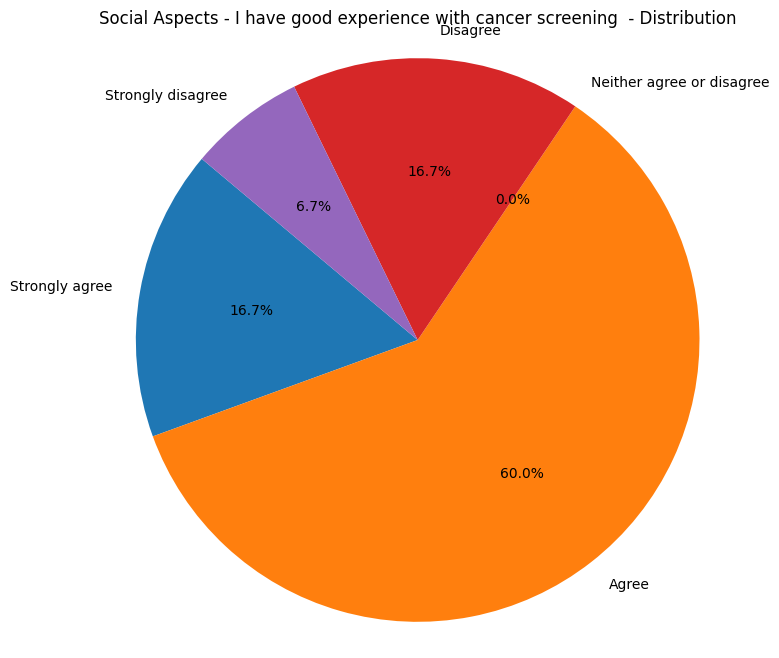

Column: Family, friends and others influence my decision to attend cancer screening
Sample Size: 37
Percentages:
Family, friends and others influence my decision to attend cancer screening
Strongly agree                5.405405
Agree                        21.621622
Neither agree or disagree     0.000000
Disagree                     62.162162
Strongly disagree            10.810811
Name: count, dtype: float64
Option Counts:
Family, friends and others influence my decision to attend cancer screening
Strongly agree                2
Agree                         8
Neither agree or disagree     0
Disagree                     23
Strongly disagree             4
Name: count, dtype: int64



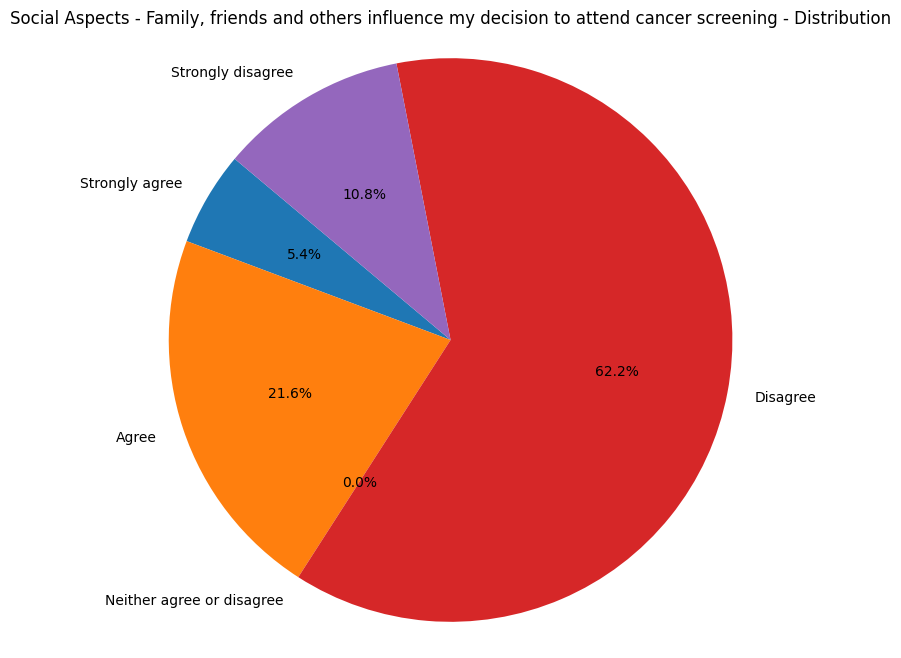

Column: Attending healthcare/cancer screening is a common practice in my community 
Sample Size: 35
Percentages:
Attending healthcare/cancer screening is a common practice in my community 
Strongly agree                5.714286
Agree                        25.714286
Neither agree or disagree     0.000000
Disagree                     65.714286
Strongly disagree             2.857143
Name: count, dtype: float64
Option Counts:
Attending healthcare/cancer screening is a common practice in my community 
Strongly agree                2
Agree                         9
Neither agree or disagree     0
Disagree                     23
Strongly disagree             1
Name: count, dtype: int64



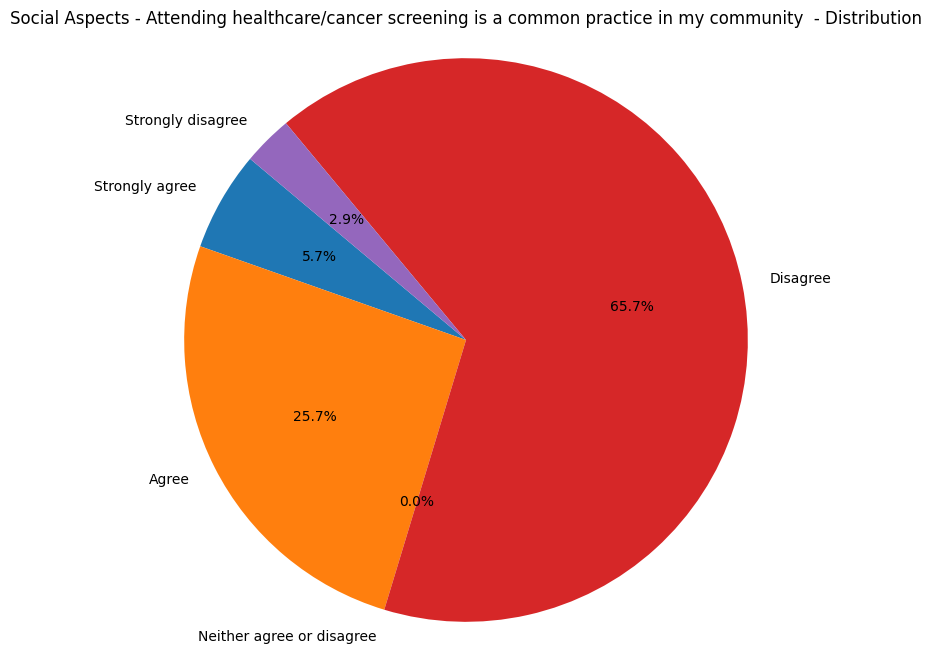

Column: I consider opinions or behaviors of others in my decision to attend cancer screening
Sample Size: 40
Percentages:
I consider opinions or behaviors of others in my decision to attend cancer screening
Strongly agree                2.5
Agree                        20.0
Neither agree or disagree     0.0
Disagree                     62.5
Strongly disagree            15.0
Name: count, dtype: float64
Option Counts:
I consider opinions or behaviors of others in my decision to attend cancer screening
Strongly agree                1
Agree                         8
Neither agree or disagree     0
Disagree                     25
Strongly disagree             6
Name: count, dtype: int64



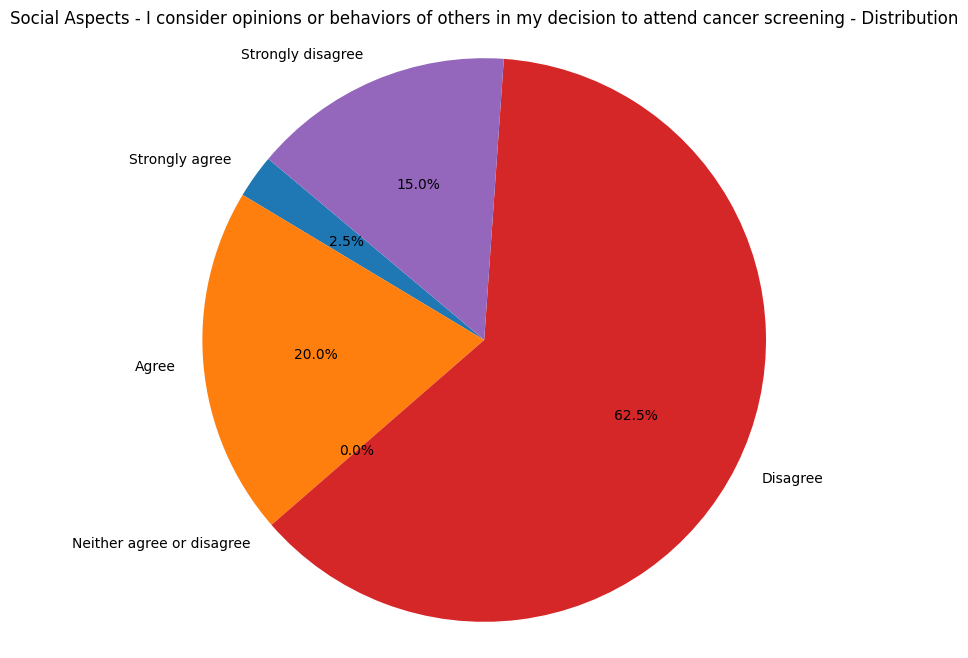

Column: Cultural beliefs or traditions within my community influence my attitude towards cancer screening
Sample Size: 39
Percentages:
Cultural beliefs or traditions within my community influence my attitude towards cancer screening
Strongly agree                5.128205
Agree                        10.256410
Neither agree or disagree     0.000000
Disagree                     66.666667
Strongly disagree            17.948718
Name: count, dtype: float64
Option Counts:
Cultural beliefs or traditions within my community influence my attitude towards cancer screening
Strongly agree                2
Agree                         4
Neither agree or disagree     0
Disagree                     26
Strongly disagree             7
Name: count, dtype: int64



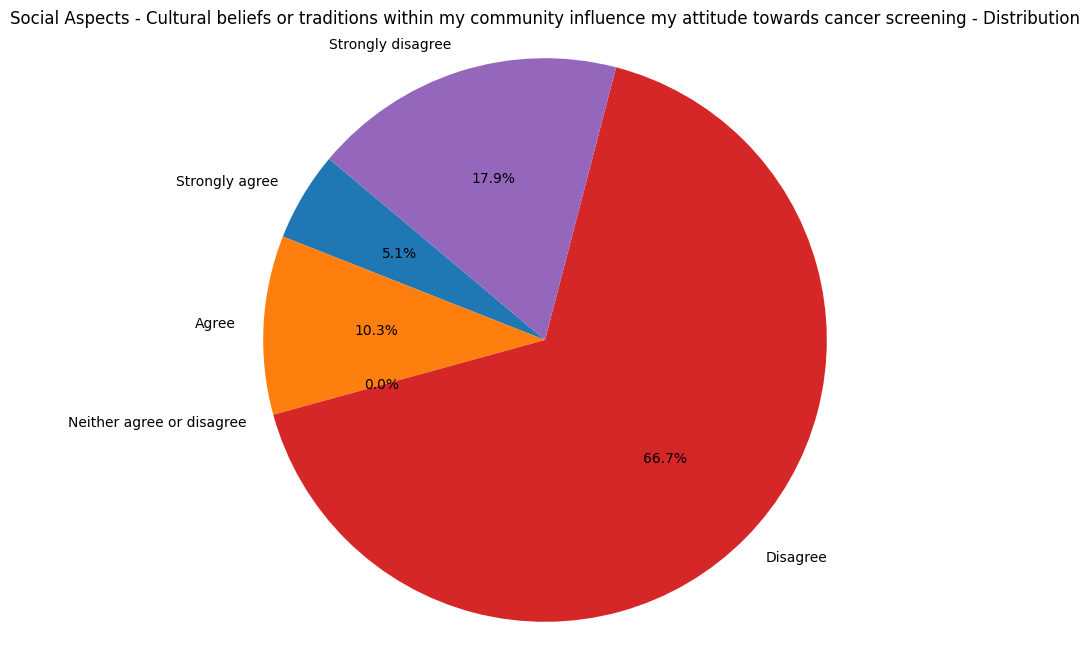

Column: Government or public health effectively promote awareness and education about the importance of cancer screening 
Sample Size: 38
Percentages:
Government or public health effectively promote awareness and education about the importance of cancer screening 
Strongly agree                7.894737
Agree                        34.210526
Neither agree or disagree     0.000000
Disagree                     55.263158
Strongly disagree             2.631579
Name: count, dtype: float64
Option Counts:
Government or public health effectively promote awareness and education about the importance of cancer screening 
Strongly agree                3
Agree                        13
Neither agree or disagree     0
Disagree                     21
Strongly disagree             1
Name: count, dtype: int64



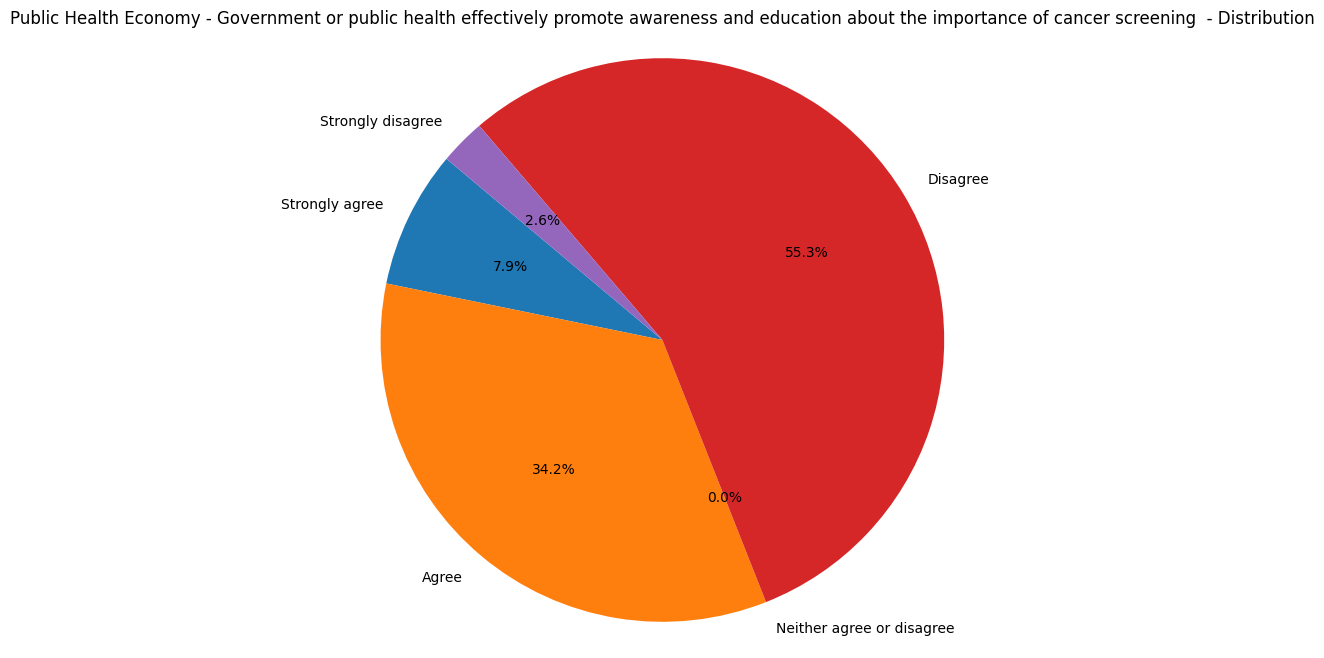

Column: Government commitment and investment in cancer screening affect my decisions to participate in cancer screening 
Sample Size: 36
Percentages:
Government commitment and investment in cancer screening affect my decisions to participate in cancer screening 
Strongly agree               13.888889
Agree                        30.555556
Neither agree or disagree     0.000000
Disagree                     50.000000
Strongly disagree             5.555556
Name: count, dtype: float64
Option Counts:
Government commitment and investment in cancer screening affect my decisions to participate in cancer screening 
Strongly agree                5
Agree                        11
Neither agree or disagree     0
Disagree                     18
Strongly disagree             2
Name: count, dtype: int64



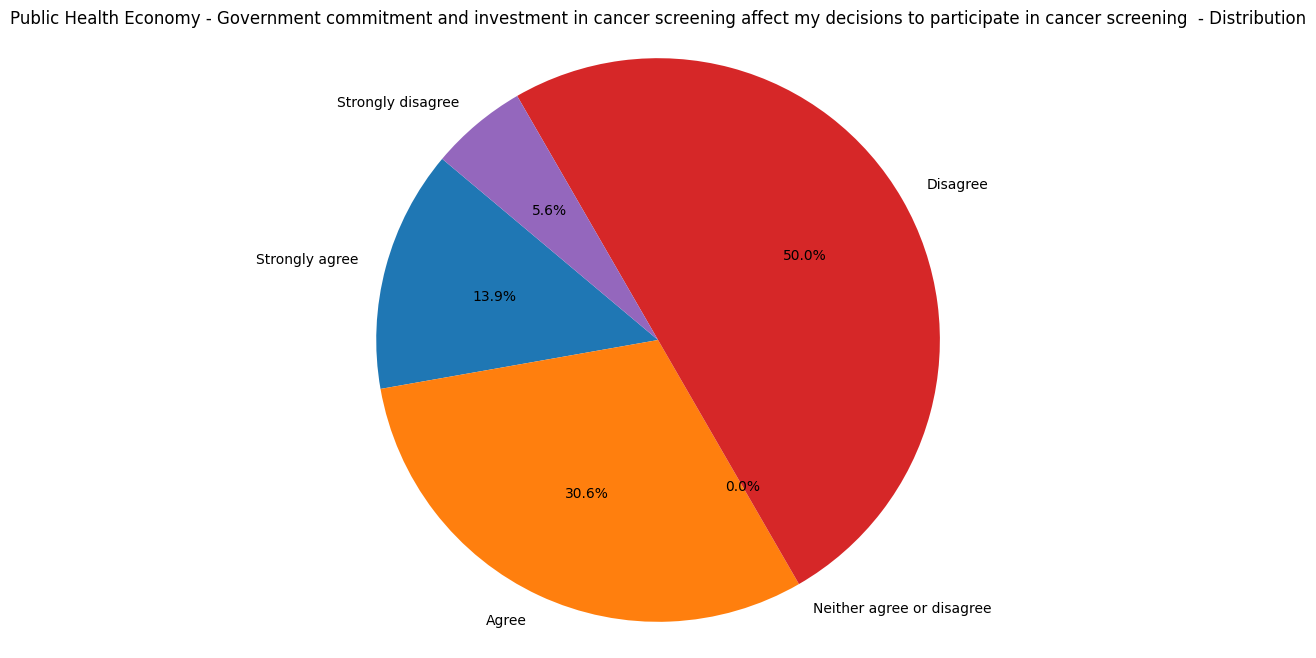

Column: Cancer screening is considered a priority within the political agenda of my country 
Sample Size: 30
Percentages:
Cancer screening is considered a priority within the political agenda of my country 
Strongly agree                3.333333
Agree                        20.000000
Neither agree or disagree     0.000000
Disagree                     63.333333
Strongly disagree            13.333333
Name: count, dtype: float64
Option Counts:
Cancer screening is considered a priority within the political agenda of my country 
Strongly agree                1
Agree                         6
Neither agree or disagree     0
Disagree                     19
Strongly disagree             4
Name: count, dtype: int64



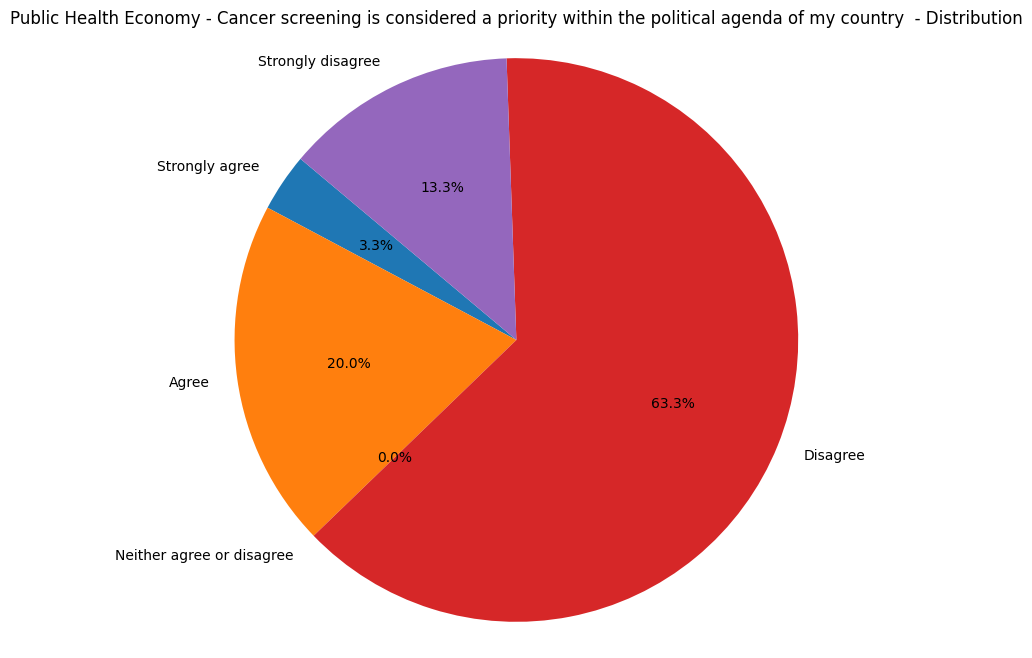

Column: Public health campaigns influence my decisions to attend cancer screenings
Sample Size: 33
Percentages:
Public health campaigns influence my decisions to attend cancer screenings
Strongly agree                9.090909
Agree                        42.424242
Neither agree or disagree     0.000000
Disagree                     36.363636
Strongly disagree            12.121212
Name: count, dtype: float64
Option Counts:
Public health campaigns influence my decisions to attend cancer screenings
Strongly agree                3
Agree                        14
Neither agree or disagree     0
Disagree                     12
Strongly disagree             4
Name: count, dtype: int64



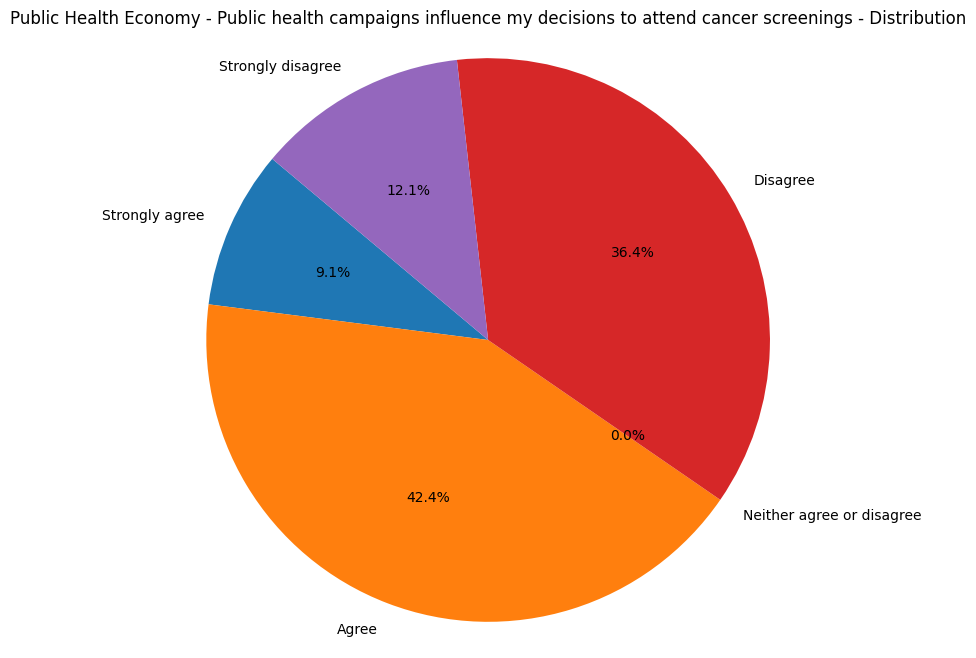

Column: Health insurance coverage influence my decision to participate in cancer screenings
Sample Size: 44
Percentages:
Health insurance coverage influence my decision to participate in cancer screenings
Strongly agree               15.909091
Agree                        61.363636
Neither agree or disagree     0.000000
Disagree                     18.181818
Strongly disagree             4.545455
Name: count, dtype: float64
Option Counts:
Health insurance coverage influence my decision to participate in cancer screenings
Strongly agree                7
Agree                        27
Neither agree or disagree     0
Disagree                      8
Strongly disagree             2
Name: count, dtype: int64



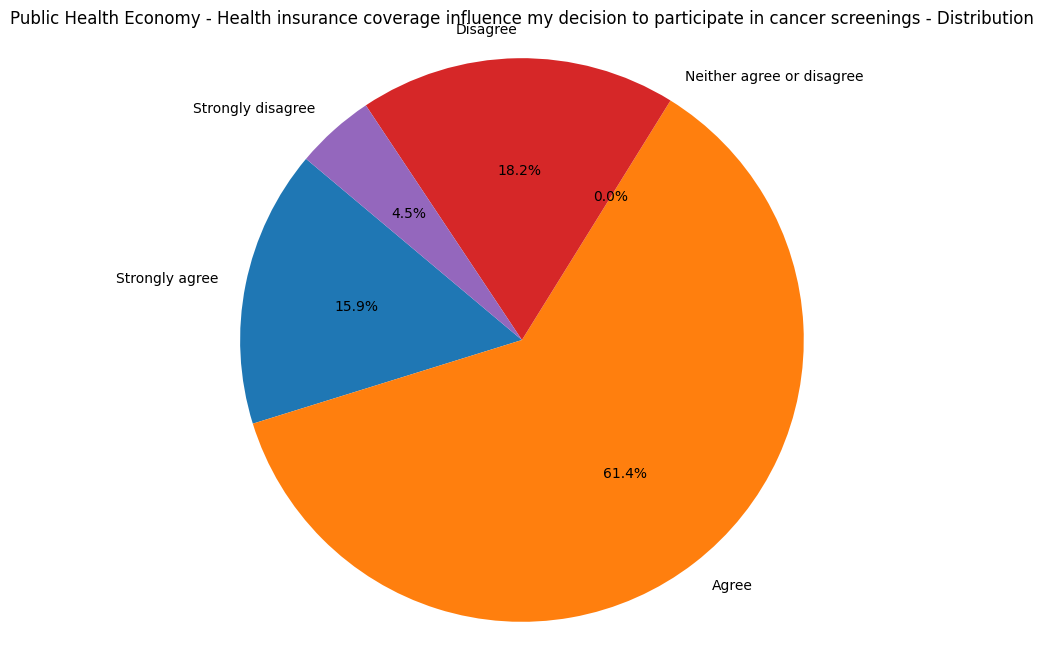

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('filtered_data.csv')

# Define relevant columns for motivation factors
personal_statements_columns = [
    'My health and well-being is very important to me',
    'I take precautions to have a healthy lifestyle',
    'Cancer is a serious health condition',
    'I am afraid of cancer ',
    'I am concerned about my own risk to develop cancer ',
    "I am concerned about my family's risk to develop cancer"
]

awareness_columns = [
    'Cancer screening is an effective way to detect cancer early',
    'I think it is important for individuals to participate in regular cancer screenings',
    'I worry that cancer screening tests may give false-positive results',
    'I trust the recommendations of my healthcare provider regarding cancer screening',
    "I follow my healthcare provider's recommendation to participate in cancer screening"
]

access_knowledge_columns = [
    'Cancer screening is available in my area ',
    'Cancer screening is easily accessible in my area ',
    'I can afford to pay for medical tests ',
    'If I make an appointment for an examination, I attend it  ',
    'I received information about cancer screening through public health channels or healthcare providers',
    'I do understand the information I get about cancer screenings'
]

social_aspects_columns = [
    'I have good experience with cancer screening ',
    'Family, friends and others influence my decision to attend cancer screening',
    'Attending healthcare/cancer screening is a common practice in my community ',
    'I consider opinions or behaviors of others in my decision to attend cancer screening',
    'Cultural beliefs or traditions within my community influence my attitude towards cancer screening'
]

public_health_economy_columns = [
    'Government or public health effectively promote awareness and education about the importance of cancer screening ',
    'Government commitment and investment in cancer screening affect my decisions to participate in cancer screening ',
    'Cancer screening is considered a priority within the political agenda of my country ',
    'Public health campaigns influence my decisions to attend cancer screenings',
    'Health insurance coverage influence my decision to participate in cancer screenings'
]

# Function to calculate sample size, percentage, and number of people selecting each option
def calculate_option_counts(column):
    option_counts = df[column].value_counts().reindex(['Strongly agree', 'Agree', 'Neither agree or disagree', 'Disagree', 'Strongly disagree'], fill_value=0)
    sample_size = option_counts.sum()
    percentages = (option_counts / sample_size) * 100
    return sample_size, percentages, option_counts

# Function to create pie chart
def create_pie_chart(column, sample_size, percentages):
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{column} - Distribution')
    plt.axis('equal')
    plt.show()

# Calculate sample size, percentage, and number of people selecting each option for each column
for column_list, aspect in zip([personal_statements_columns, awareness_columns, access_knowledge_columns, social_aspects_columns, public_health_economy_columns], 
                               ['Personal Statements', 'Awareness', 'Access Knowledge', 'Social Aspects', 'Public Health Economy']):
    for column in column_list:
        sample_size, percentages, option_counts = calculate_option_counts(column)
        print(f'Column: {column}')
        print(f'Sample Size: {sample_size}')
        print('Percentages:')
        print(percentages)
        print('Option Counts:')
        print(option_counts)
        print()
        # Create pie chart
        create_pie_chart(f'{aspect} - {column}', sample_size, percentages)


What would motivate or encourage you to participate in medical screening? 
1.	Personalized reminders and notifications
2.	Rewards for participation in medical screening
3.	Flyers, posters, etc. in healthcare institutions and in public places
4.	Information in social media (websites, news portals, newspapers and similar)
5.	“Motivational interviewing” by general practitioner or other healthcare providers



In [11]:
import pandas as pd

#loading the dataset 
df=pd.read_csv('filtered_data.csv')

#defining relevant columns in the dataset
motivation_factors=['Motivation preference for attending medical screenings is personalised reminders and notifications ', 
                    'Motivation preference for attending medical screenings is rewards for participation', 
                    'Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places ', 
                    'Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar) ', 
                    'Motivation preference for attending medical screenings is "Motivation interviewing" by GP or other healthcare providers ']

# Total sample size
total_sample_size = len(df)

# Function to calculate sample size and percentage for each column
def calculate_sample_size_and_percentage(column):
    sample_size = df[column].count()  # Count non-null values in the column
    percentages = (df[column].value_counts(dropna=False) / total_sample_size) * 100  # Calculate percentage of each value
    return sample_size, percentages

# Calculate sample size and percentage for each column
for column in motivation_factors:
    sample_size, percentages = calculate_sample_size_and_percentage(column)
    display(f'Column: {column}')
    display(f'Sample Size: {sample_size}')
    display('Percentages:')
    display(percentages)
    display()

'Column: Motivation preference for attending medical screenings is personalised reminders and notifications '

'Sample Size: 42'

'Percentages:'

Motivation preference for attending medical screenings is personalised reminders and notifications 
Yes    54.545455
NaN    45.454545
Name: count, dtype: float64

'Column: Motivation preference for attending medical screenings is rewards for participation'

'Sample Size: 30'

'Percentages:'

Motivation preference for attending medical screenings is rewards for participation
NaN    61.038961
Yes    38.961039
Name: count, dtype: float64

'Column: Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places '

'Sample Size: 17'

'Percentages:'

Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places 
NaN    77.922078
Yes    22.077922
Name: count, dtype: float64

'Column: Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar) '

'Sample Size: 13'

'Percentages:'

Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar) 
NaN    83.116883
Yes    16.883117
Name: count, dtype: float64

'Column: Motivation preference for attending medical screenings is "Motivation interviewing" by GP or other healthcare providers '

'Sample Size: 19'

'Percentages:'

Motivation preference for attending medical screenings is "Motivation interviewing" by GP or other healthcare providers 
NaN    75.324675
Yes    24.675325
Name: count, dtype: float64

## Answering study questions

In [12]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

# Question-1 
# Does awareness about state-funded cancer screenings affect participation in populational screening in Latvia?

'Awareness participation rate:'

0.4155844155844156

'Awareness non-participation rate:'

0.2597402597402597

'Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.'

'Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.'

 Visualization:  


<Figure size 1400x1000 with 0 Axes>

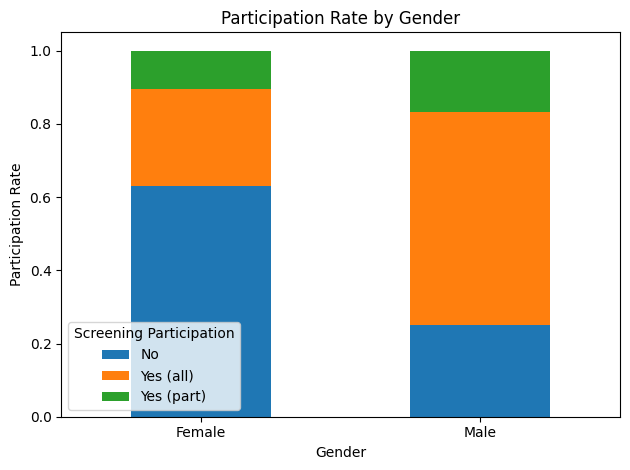

Participation Rate by Gender - Table:
If you received one of the invitations mentioned above, did you perform the screening that you were invited for?   No  \
Gender                                                                                                                  
Female                                                                                                             24   
Male                                                                                                                6   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?   Yes (all)  \
Gender                                                                                                                         
Female                                                                                                                    10   
Male                                                                                         

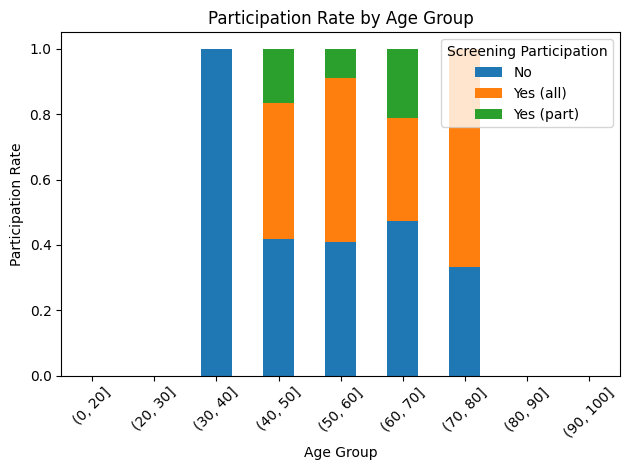

Participation Rate by Age Group - Table:
If you received one of the invitations mentioned above, did you perform the screening that you were invited for?   No  \
Age                                                                                                                     
(0, 20]                                                                                                             0   
(20, 30]                                                                                                            0   
(30, 40]                                                                                                            6   
(40, 50]                                                                                                            5   
(50, 60]                                                                                                            9   
(60, 70]                                                                                                        

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/1907300629.py:139: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_participation = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()


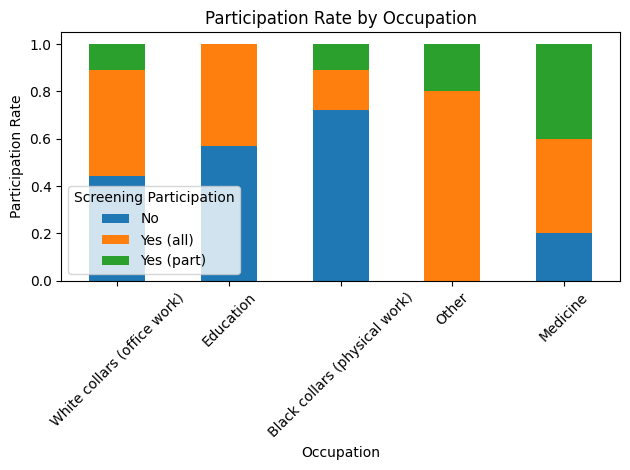

Participation Rate by Occupation Group - Table:
If you received one of the invitations mentioned above, did you perform the screening that you were invited for?   No  \
Occupation                                                                                                              
White collars (office work)                                                                                        12   
Education                                                                                                           4   
Black collars (physical work)                                                                                      13   
Other                                                                                                               0   
Medicine                                                                                                            1   

If you received one of the invitations mentioned above, did you perform the screening that you were invi

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/1907300629.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_participation_table = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)


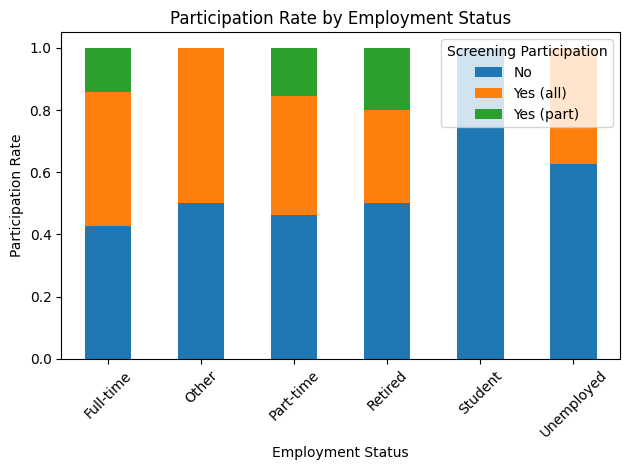

Participation Rate by Employment Status - Table:
If you received one of the invitations mentioned above, did you perform the screening that you were invited for?     No  \
Employment status                                                                                                         
Full-time                                                                                                          12.0   
Other                                                                                                               1.0   
Part-time                                                                                                           6.0   
Retired                                                                                                             5.0   
Student                                                                                                             1.0   
Unemployed                                                                                

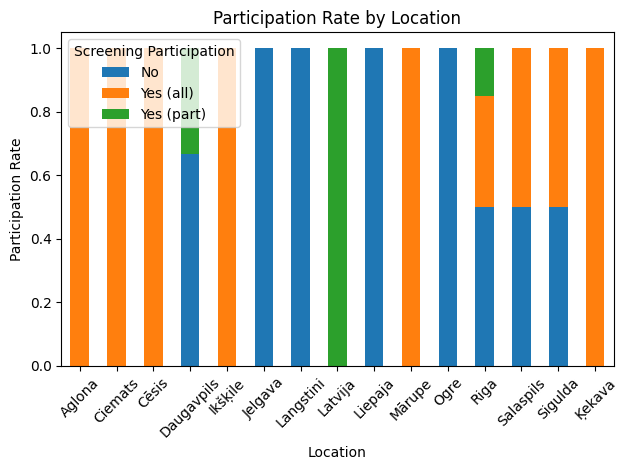

Participation Rate by Location - Table:
If you received one of the invitations mentioned above, did you perform the screening that you were invited for?     No  \
City/town/village                                                                                                         
Aglona                                                                                                              0.0   
Ciemats                                                                                                             0.0   
Cēsis                                                                                                               0.0   
Daugavpils                                                                                                          2.0   
Ikšķile                                                                                                             0.0   
Jelgava                                                                                            

In [22]:
## Questions from the survey which can be used to answer the question
# Q17: Are you familiar with the concept of cancer screening in Latvia? (Yes/No)
# Q18: What types of cancer screening are you aware of? (Multiple-choice)
# Q19: Which of the following cancer screenings have you attended in the last year? (Multiple-choice)
# Q20: What sources have you used to learn about cancer screening tests? (Multiple-choice)
## Participation in Cancer Screening:
# Q25: If you received invitations for screenings, did you perform the screening? (Yes/No)
# Demographic and Socioeconomic Factors:
# Q1: What is your age? (Continuous)
# Q3: What is your gender? (Male/Female/Other)
# Q4: Where do you live? (City/Town/Village)
# Q8: What is your occupation? (Multiple-choice)
# Q9: What is your employment status? (Multiple-choice)
# Q13: Do you know who your general practitioner is? (Yes/No)


# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Select relevant columns
relevant_columns = [
    'Age', 
    'Gender', 
    'City/town/village', 
    'Occupation', 
    'Employment status',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]


data = df[relevant_columns]

# Analyze the relationship between awareness and participation
# Count the number of respondents who are aware, have participated in screenings, and their sociodemographic characteristics
aware_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                          (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].isin(['Yes - for all the screenings that I received the invitations', 'Yes for a part of screenings that I received the invitations']))]
aware_not_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                              (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] == 'No')]

# Calculate proportions for different sociodemographic groups
total_responses = data.shape[0]
aware_participation_rate = len(aware_participated) / total_responses
aware_non_participation_rate = len(aware_not_participated) / total_responses

# Display results
display("Awareness participation rate:", aware_participation_rate)
display("Awareness non-participation rate:", aware_non_participation_rate)

display("Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.")
display("Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.")

print(" Visualization:  ")

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Define mapping for the response options
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes (all)",
    "Yes for a part of screenings that I received the invitations": "Yes (part)",
    "No": "No"
}

# Make a copy of the DataFrame
data_copy = data.copy()

# Map the responses in the copied DataFrame
data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)

# Plot participation rate by gender
gender_participation = data_copy.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
gender_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Participation Rate')
plt.xticks(rotation=0)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Participation rate by gender - Table
gender_participation_table = data_copy.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)
gender_participation_table_percentage = gender_participation * 100
print("Participation Rate by Gender - Table:")
print(gender_participation_table)
print("Participation Rate by Gender - Percentage:")
print(gender_participation_table_percentage)
print()

# Plot participation rate by age group
age_participation = data_copy.groupby(pd.cut(data_copy['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), observed=False)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
age_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Participation rate by age group - Table
age_participation_table = data_copy.groupby(pd.cut(data_copy['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), observed=False)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)
age_participation_table_percentage = age_participation * 100
print("Participation Rate by Age Group - Table:")
print(age_participation_table)
print("Participation Rate by Age Group - Percentage:")
print(age_participation_table_percentage)
print()

# Convert 'Occupation' column to categorical type
data_copy['Occupation'] = pd.Categorical(data_copy['Occupation'], categories=['White collars (office work)', 'Education', 'Black collars (physical work)', 'Other', 'Medicine'], ordered=True)

# Plot participation rate by occupation
occupation_participation = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
occupation_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Participation rate by occupation group - Table
occupation_participation_table = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)
occupation_participation_table_percentage = occupation_participation * 100
print("Participation Rate by Occupation Group - Table:")
print(occupation_participation_table)
print("Participation Rate by Occupation Group - Percentage:")
print(occupation_participation_table_percentage)

# Plot participation rate by employment status
employment_participation = data_copy.groupby('Employment status')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
employment_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Participation rate by employment status - Table
employment_participation_table = data_copy.groupby('Employment status')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)
employment_participation_table_percentage = employment_participation * 100
print("Participation Rate by Employment Status - Table:")
print(employment_participation_table)
print("Participation Rate by Employment Status - Percentage:")
print(employment_participation_table_percentage)

# Replace variations of Riga with a single label
data_copy['City/town/village'] = data_copy['City/town/village'].replace({'Rìga': 'Riga', 'Ríga': 'Riga' , 'Rīga': 'Riga'})

# Exclude Šveice, Lausanne from the data
data_copy = data_copy[data_copy['City/town/village'] != 'Šveice, Lausanne']

# Combine the variations of Riga
location_participation.index = location_participation.index.str.replace('Rìga', 'Riga')
location_participation.index = location_participation.index.str.replace('Ríga', 'Riga')
location_participation.index = location_participation.index.str.replace('Rīga', 'Riga')
location_participation = location_participation.groupby(level=0).sum()

# Plot participation rate by city/town/village
location_participation = data_copy.groupby('City/town/village')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
location_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Location')
plt.xlabel('Location')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Participation rate by city/town/village - Table
location_participation_table = data_copy.groupby('City/town/village')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts().unstack().fillna(0)
location_participation_table_percentage = location_participation * 100
print("Participation Rate by Location - Table:")
print(location_participation_table)
print("Participation Rate by Location - Percentage:")
print(location_participation_table_percentage)

In [16]:
print(data_copy['Occupation'].unique())


['White collars (office work)' 'Education' 'Black collars (physical work)'
 'Other' 'Medicine']


## Research Question 2
## Are there any gender differences in awareness towards the screening and in participation rates in populational screening in Latvia?

'Difference in awareness rates between genders:'

-0.1727642276422764

'Difference in participation rates between genders:'

-0.22352941176470587

'The difference in awareness rates between genders is approximately -6.21%. This negative value suggests that one gender (presumably females, as they are often more aware of healthcare issues) is about 6.21% less aware of cancer screening concepts in Latvia compared to the other gender (presumably males). In other words, there is a noticeable gap in awareness between genders, with one gender being less informed about cancer screening.'

'The difference in participation rates between genders is approximately 7.14%. This positive value indicates that one gender participates in cancer screenings at a rate about 7.14% higher than the other gender. In other words, there is a disparity in participation rates between genders, with one gender being more actively involved in cancer screenings in Latvia compared to the other gender.'

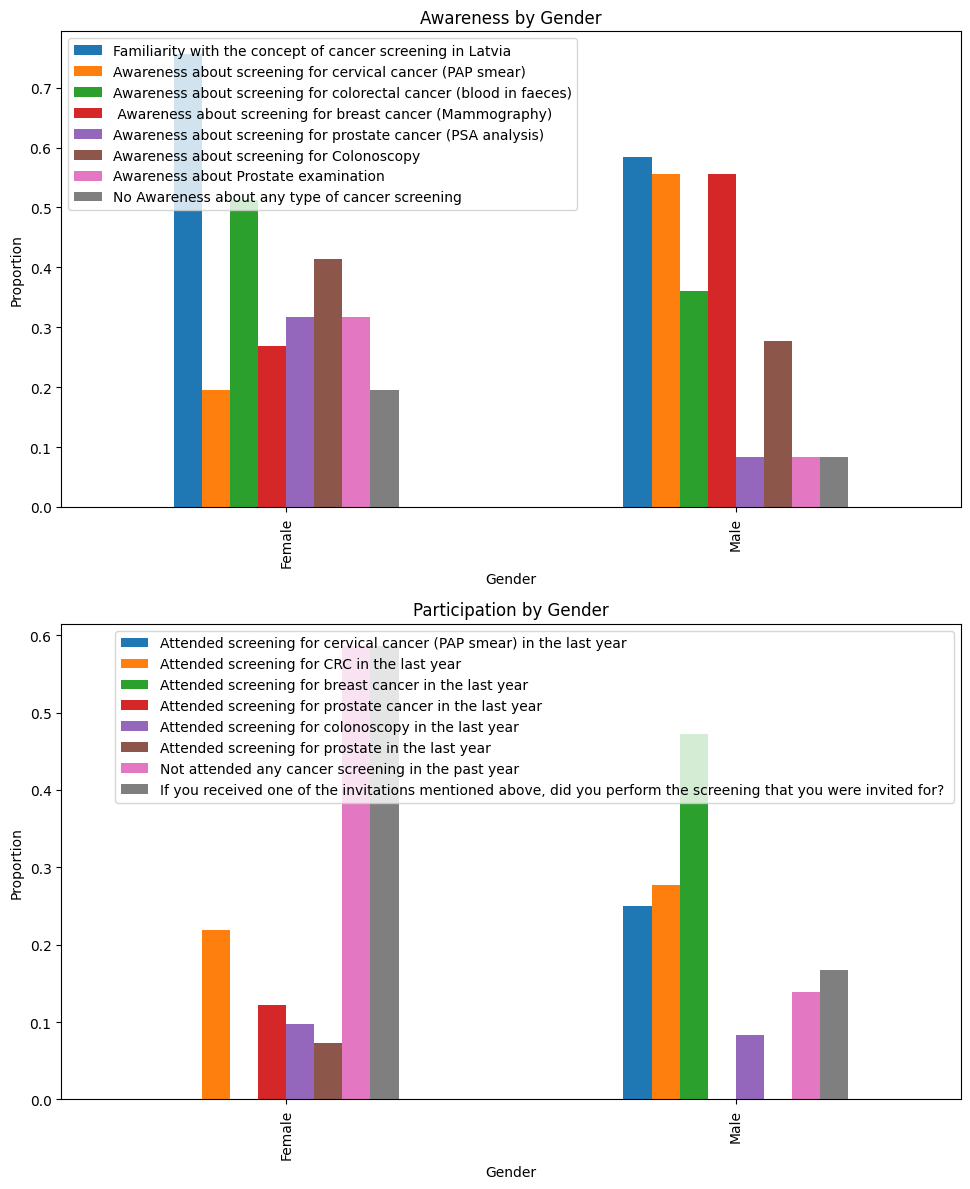

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Define mapping for 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for?' column
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes_All",
    "Yes for a part of screenings that I received the invitations": "Yes_Part",
    "No": "No"
}

# Apply mapping to the column
df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)


# Select relevant columns
relevant_columns = [
    'Gender',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

# Select relevant data
data = df[relevant_columns]

# Analyze gender differences in awareness and participation rates

# Define a function to calculate participation rates based on the specific entries
def calculate_participation_rate(series):
    # Count the number of 'Yes' and 'No' entries
    yes_count = series.str.contains('Yes').sum()
    no_count = series.str.contains('No').sum()
    
    # Calculate the total count excluding 'No'
    total_count = len(series) - no_count
    
    # Calculate the participation rate
    participation_rate = yes_count / total_count if total_count > 0 else 0
    
    return participation_rate

# Calculate awareness rates by gender
awareness_by_gender = data.groupby('Gender')['Familiarity with the concept of cancer screening in Latvia'].apply(lambda x: (x == 'Yes').mean())

# Calculate participation rates by gender
participation_by_gender = data.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].apply(calculate_participation_rate)

# Calculate the absolute difference in awareness and participation rates between genders
awareness_difference = awareness_by_gender.diff().iloc[-1]
participation_difference = participation_by_gender.diff().iloc[-1]

# Display the results
display("Difference in awareness rates between genders:", awareness_difference)
display("Difference in participation rates between genders:", participation_difference)

"   "
" Inference of the result: "
"   "

display("The difference in awareness rates between genders is approximately -6.21%. This negative value suggests that one gender (presumably females, as they are often more aware of healthcare issues) is about 6.21% less aware of cancer screening concepts in Latvia compared to the other gender (presumably males). In other words, there is a noticeable gap in awareness between genders, with one gender being less informed about cancer screening.")
display("The difference in participation rates between genders is approximately 7.14%. This positive value indicates that one gender participates in cancer screenings at a rate about 7.14% higher than the other gender. In other words, there is a disparity in participation rates between genders, with one gender being more actively involved in cancer screenings in Latvia compared to the other gender.")


# Awareness by gender
awareness_by_gender = data.groupby('Gender').agg({
    'Familiarity with the concept of cancer screening in Latvia': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for cervical cancer (PAP smear)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for colorectal cancer (blood in faeces)': lambda x: (x == 'Yes').mean(),
    ' Awareness about screening for breast cancer (Mammography)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for prostate cancer (PSA analysis) ': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for Colonoscopy': lambda x: (x == 'Yes').mean(),
    'Awareness about Prostate examination ': lambda x: (x == 'Yes').mean(),
    'No Awareness about any type of cancer screening': lambda x: (x == 'Yes').mean()
}).reset_index()

# Participation by gender
participation_by_gender = data.groupby('Gender').agg({
    'Attended screening for cervical cancer (PAP smear) in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for CRC in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for breast cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for colonoscopy in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate in the last year': lambda x: (x == 'Yes').mean(),
    'Not attended any cancer screening in the past year': lambda x: (x == 'Yes').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_All').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_Part').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'No').mean()
}).reset_index()

# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Awareness plot
awareness_by_gender.plot(kind='bar', x='Gender', ax=axes[0], title='Awareness by Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Gender')

# Participation plot
participation_by_gender.plot(kind='bar', x='Gender', ax=axes[1], title='Participation by Gender')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


'Difference in awareness rates between genders:'

-0.1727642276422764

'Difference in participation rates between genders:'

-0.22352941176470587

'The difference in awareness rates between genders is approximately -6.21%. This negative value suggests that one gender (presumably females, as they are often more aware of healthcare issues) is about 6.21% less aware of cancer screening concepts in Latvia compared to the other gender (presumably males). In other words, there is a noticeable gap in awareness between genders, with one gender being less informed about cancer screening.'

'The difference in participation rates between genders is approximately 7.14%. This positive value indicates that one gender participates in cancer screenings at a rate about 7.14% higher than the other gender. In other words, there is a disparity in participation rates between genders, with one gender being more actively involved in cancer screenings in Latvia compared to the other gender.'

'Awareness by Gender - Proportions:'

Gender  Familiarity with the concept of cancer screening in Latvia  \
0  Female                                           0.756098            
1    Male                                           0.583333            

   Awareness about screening for cervical cancer (PAP smear)  \
0                                           0.195122           
1                                           0.555556           

   Awareness about screening for colorectal cancer (blood in faeces)  \
0                                           0.512195                   
1                                           0.361111                   

    Awareness about screening for breast cancer (Mammography)  \
0                                           0.268293            
1                                           0.555556            

   Awareness about screening for prostate cancer (PSA analysis)   \
0                                           0.317073               
1                                           0.083333               

   Awareness about screening for Colonoscopy  \
0                                   0.414634   
1                                   0.277778   

   Awareness about Prostate examination   \
0                               0.317073   
1                               0.083333   

   No Awareness about any type of cancer screening  
0                                         0.195122  
1                                         0.083333

'\nParticipation by Gender - Proportions:'

Gender  \
0  Female   
1    Male   

   Attended screening for cervical cancer (PAP smear) in the last year  \
0                                               0.00                     
1                                               0.25                     

   Attended screening for CRC in the last year   \
0                                      0.219512   
1                                      0.277778   

   Attended screening for breast cancer in the last year  \
0                                           0.000000       
1                                           0.472222       

   Attended screening for prostate cancer in the last year  \
0                                           0.121951         
1                                           0.000000         

   Attended screening for colonoscopy in the last year   \
0                                           0.097561      
1                                           0.083333      

   Attended screening for prostate in the last year  \
0                                          0.073171   
1                                          0.000000   

   Not attended any cancer screening in the past year  \
0                                           0.585366    
1                                           0.138889    

   If you received one of the invitations mentioned above, did you perform the screening that you were invited for?   
0                                           0.585366                                                                  
1                                           0.166667

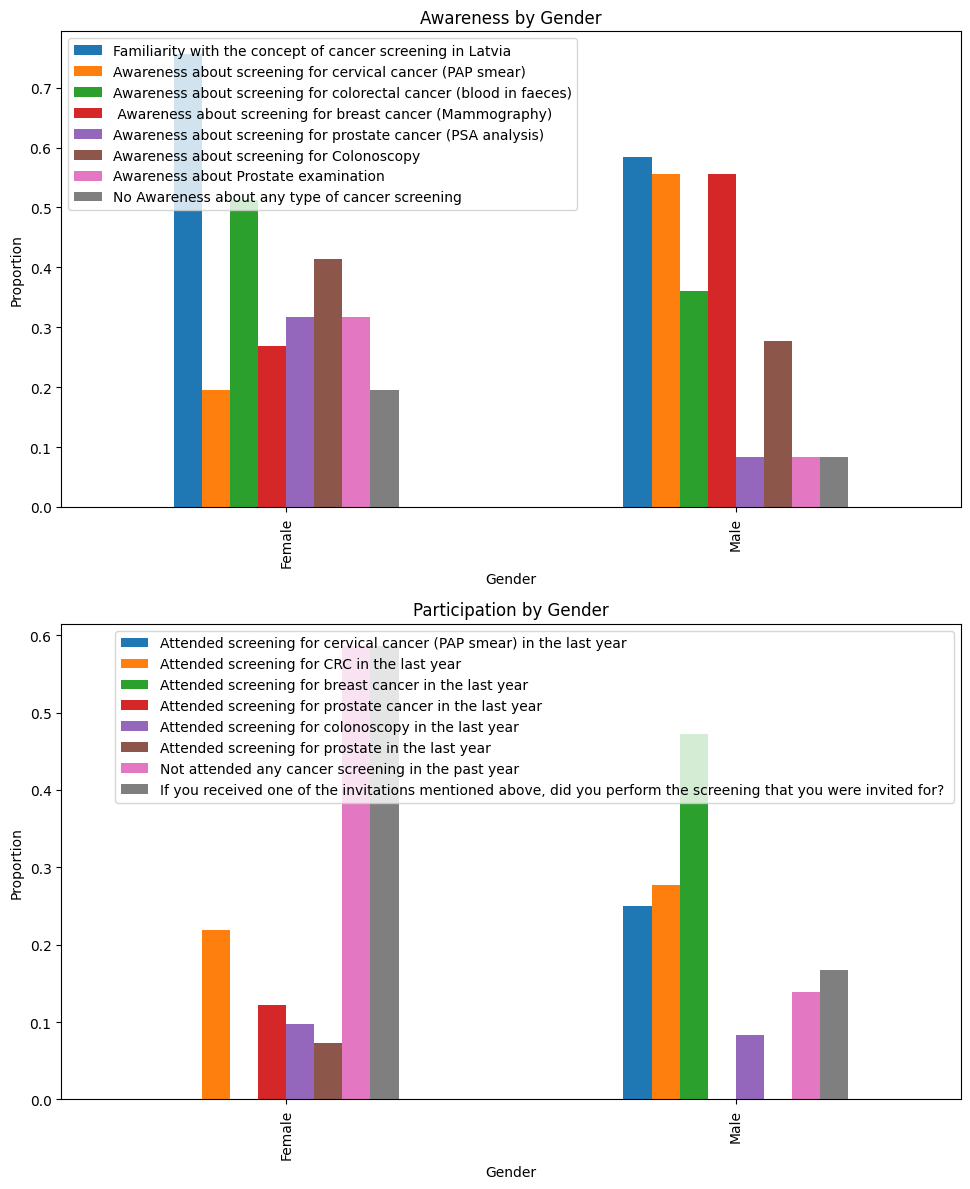

In [25]:
# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Define mapping for 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for?' column
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes_All",
    "Yes for a part of screenings that I received the invitations": "Yes_Part",
    "No": "No"
}

# Apply mapping to the column
df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)


# Select relevant columns
relevant_columns = [
    'Gender',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

# Select relevant data
data = df[relevant_columns]

# Analyze gender differences in awareness and participation rates

# Define a function to calculate participation rates based on the specific entries
def calculate_participation_rate(series):
    # Count the number of 'Yes' and 'No' entries
    yes_count = series.str.contains('Yes').sum()
    no_count = series.str.contains('No').sum()
    
    # Calculate the total count excluding 'No'
    total_count = len(series) - no_count
    
    # Calculate the participation rate
    participation_rate = yes_count / total_count if total_count > 0 else 0
    
    return participation_rate

# Calculate awareness rates by gender
awareness_by_gender = data.groupby('Gender')['Familiarity with the concept of cancer screening in Latvia'].apply(lambda x: (x == 'Yes').mean())

# Calculate participation rates by gender
participation_by_gender = data.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].apply(calculate_participation_rate)

# Calculate the absolute difference in awareness and participation rates between genders
awareness_difference = awareness_by_gender.diff().iloc[-1]
participation_difference = participation_by_gender.diff().iloc[-1]

# Display the results
display("Difference in awareness rates between genders:", awareness_difference)
display("Difference in participation rates between genders:", participation_difference)

"   "
" Inference of the result: "
"   "

display("The difference in awareness rates between genders is approximately -6.21%. This negative value suggests that one gender (presumably females, as they are often more aware of healthcare issues) is about 6.21% less aware of cancer screening concepts in Latvia compared to the other gender (presumably males). In other words, there is a noticeable gap in awareness between genders, with one gender being less informed about cancer screening.")
display("The difference in participation rates between genders is approximately 7.14%. This positive value indicates that one gender participates in cancer screenings at a rate about 7.14% higher than the other gender. In other words, there is a disparity in participation rates between genders, with one gender being more actively involved in cancer screenings in Latvia compared to the other gender.")


# Awareness by gender
awareness_by_gender = data.groupby('Gender').agg({
    'Familiarity with the concept of cancer screening in Latvia': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for cervical cancer (PAP smear)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for colorectal cancer (blood in faeces)': lambda x: (x == 'Yes').mean(),
    ' Awareness about screening for breast cancer (Mammography)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for prostate cancer (PSA analysis) ': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for Colonoscopy': lambda x: (x == 'Yes').mean(),
    'Awareness about Prostate examination ': lambda x: (x == 'Yes').mean(),
    'No Awareness about any type of cancer screening': lambda x: (x == 'Yes').mean()
}).reset_index()

# Participation by gender
participation_by_gender = data.groupby('Gender').agg({
    'Attended screening for cervical cancer (PAP smear) in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for CRC in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for breast cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for colonoscopy in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate in the last year': lambda x: (x == 'Yes').mean(),
    'Not attended any cancer screening in the past year': lambda x: (x == 'Yes').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_All').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_Part').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'No').mean()
}).reset_index()

# Display awareness proportions by gender
display("Awareness by Gender - Proportions:")
display(awareness_by_gender)

# Display participation proportions by gender
display("\nParticipation by Gender - Proportions:")
display(participation_by_gender)

# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Awareness plot
awareness_by_gender.plot(kind='bar', x='Gender', ax=axes[0], title='Awareness by Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Gender')

# Participation plot
participation_by_gender.plot(kind='bar', x='Gender', ax=axes[1], title='Participation by Gender')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

print(data['Gender'].unique())


['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

## Research Question 3
## Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 


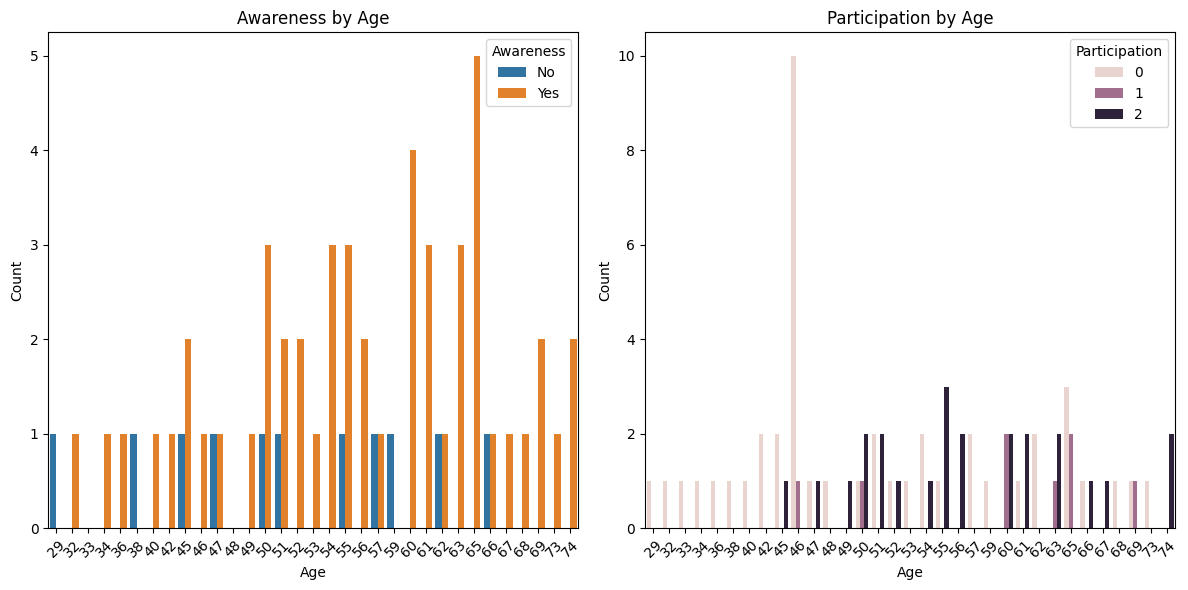

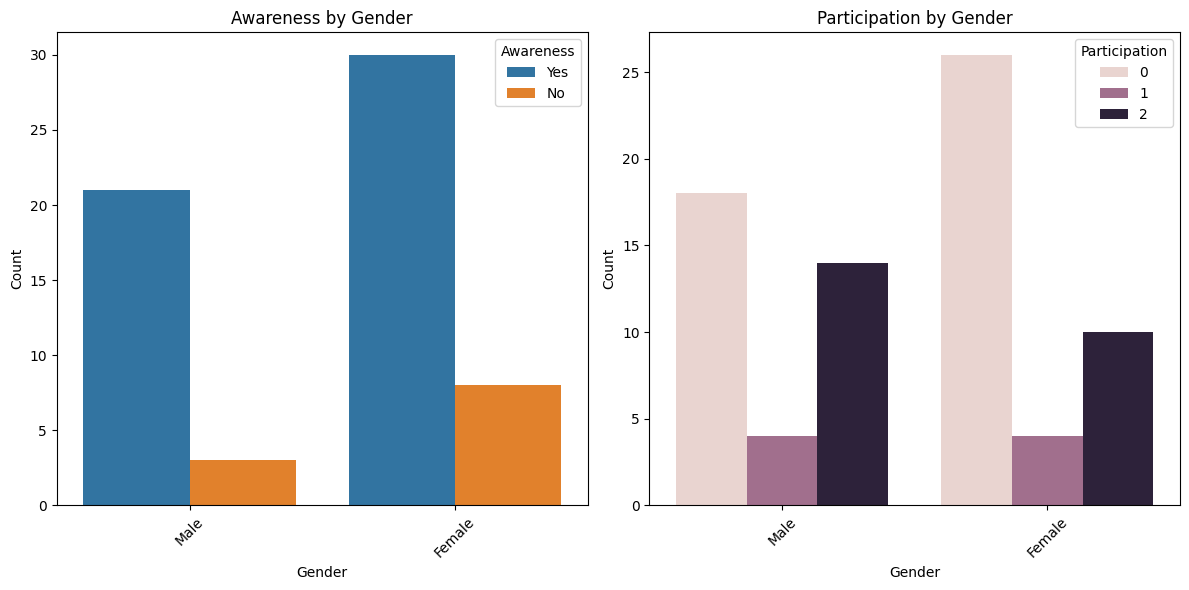

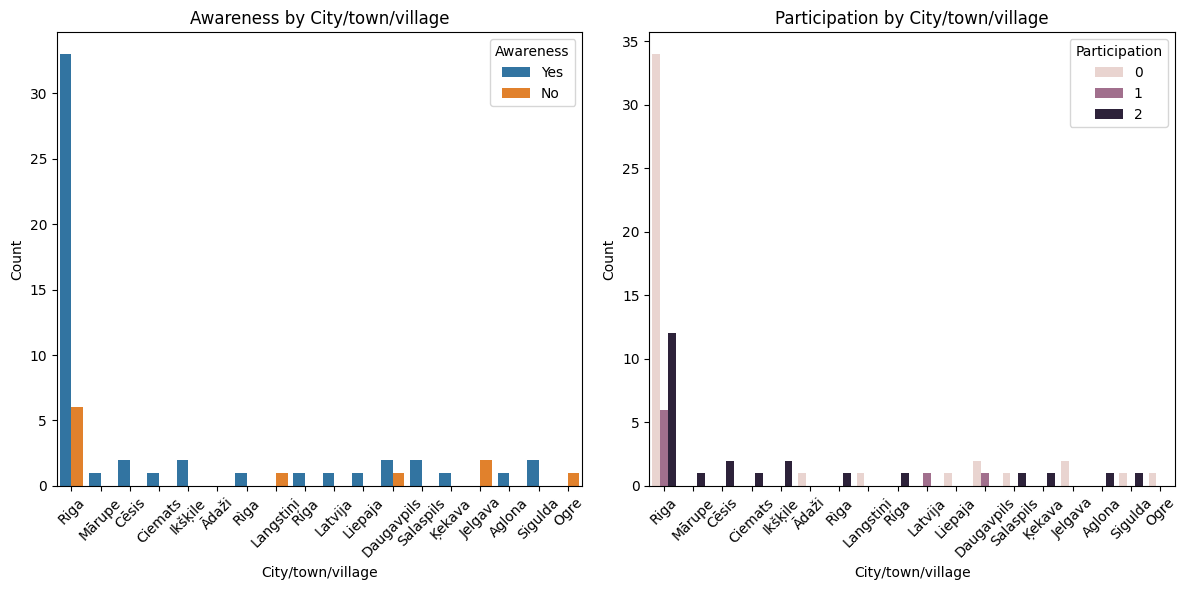

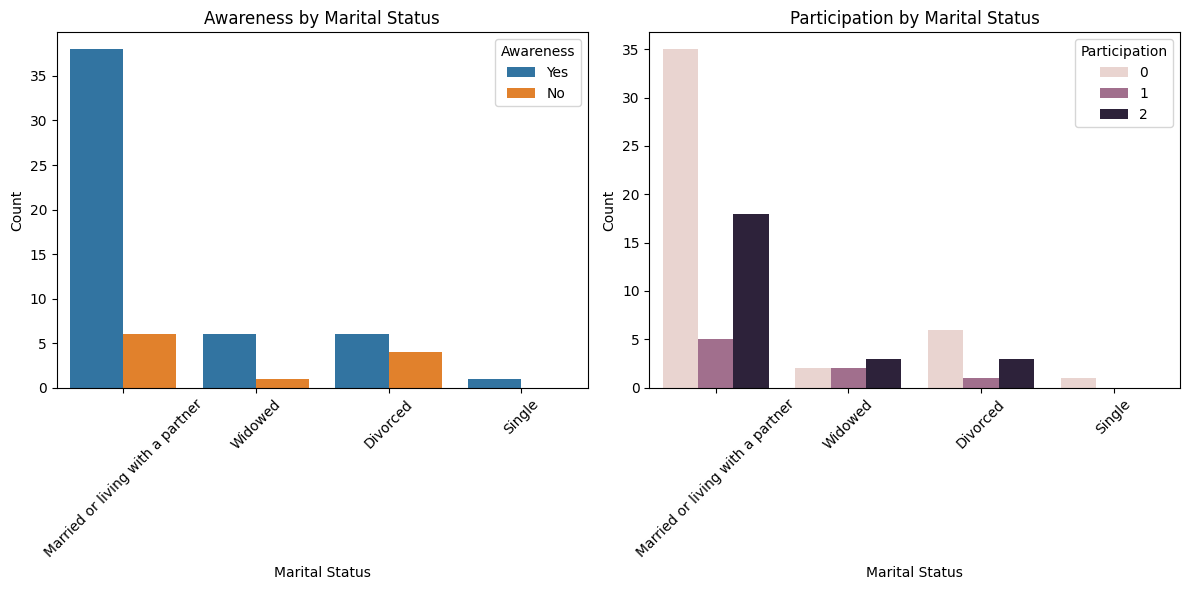

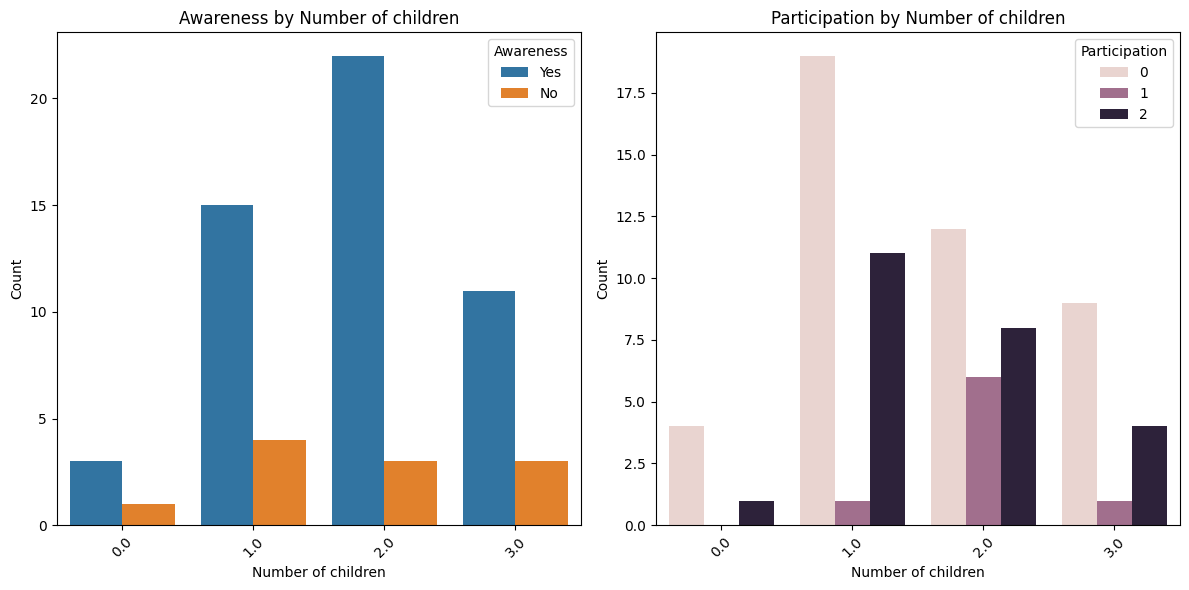

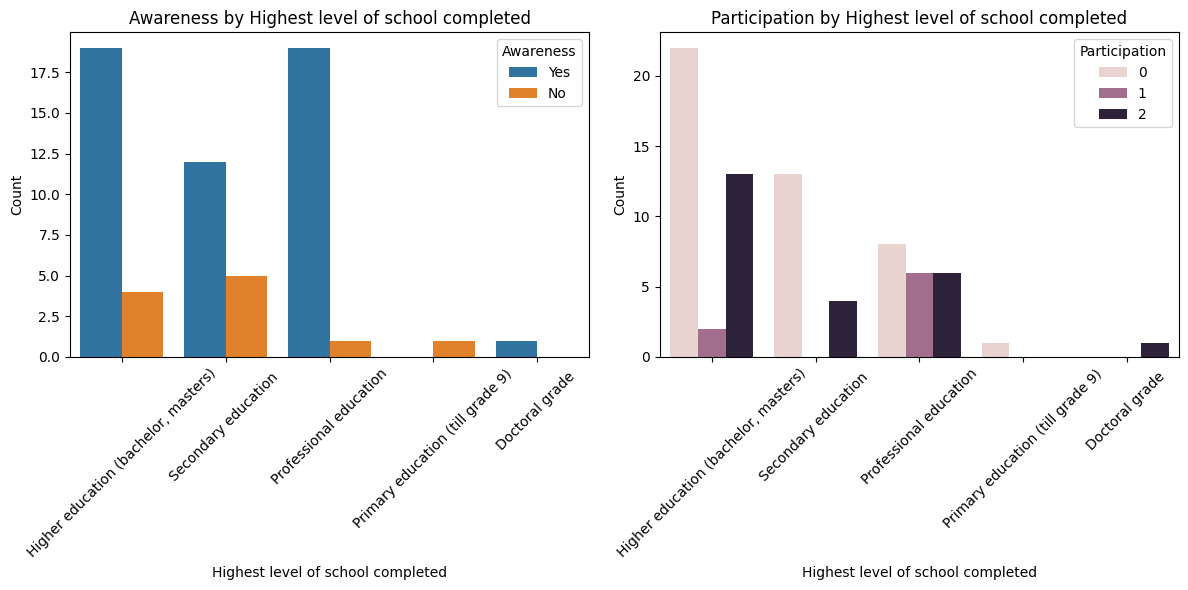

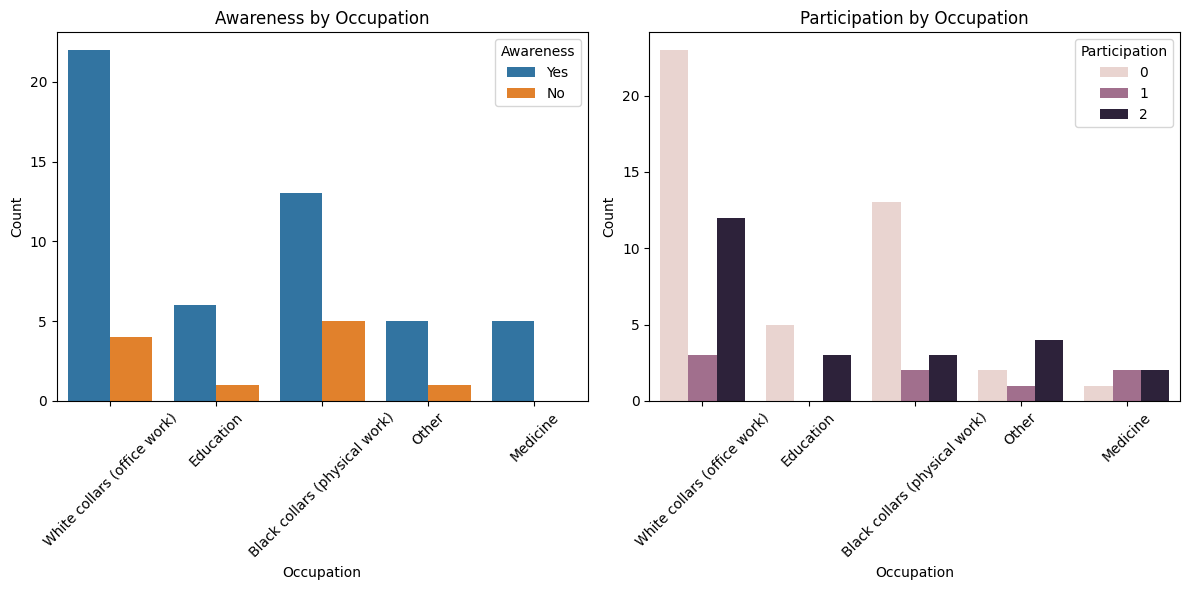

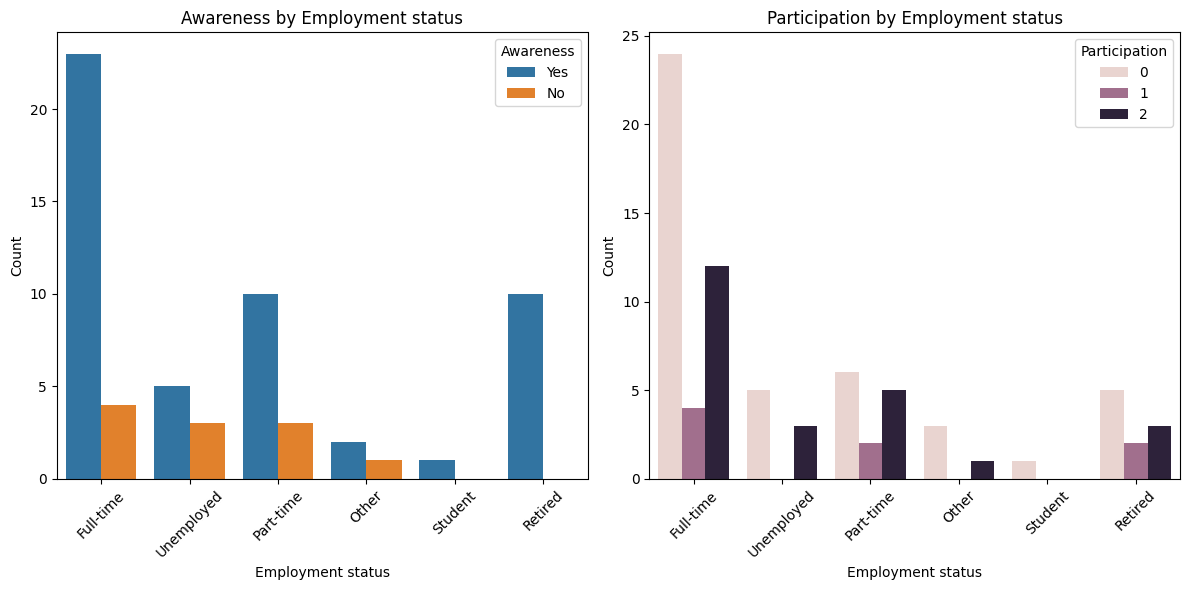

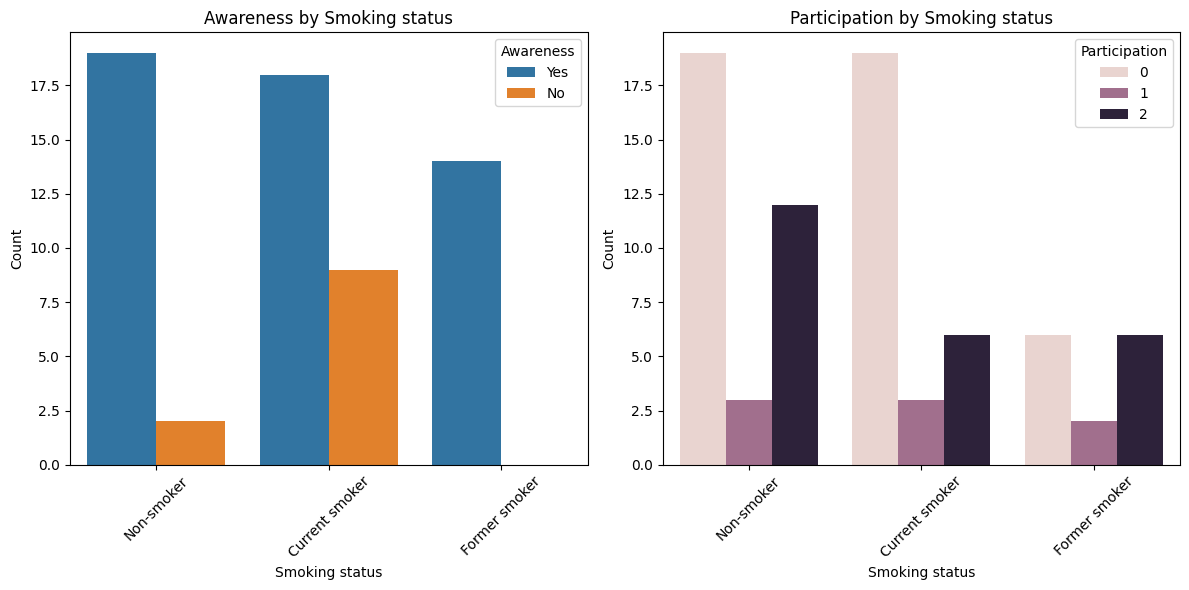

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/1211621380.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


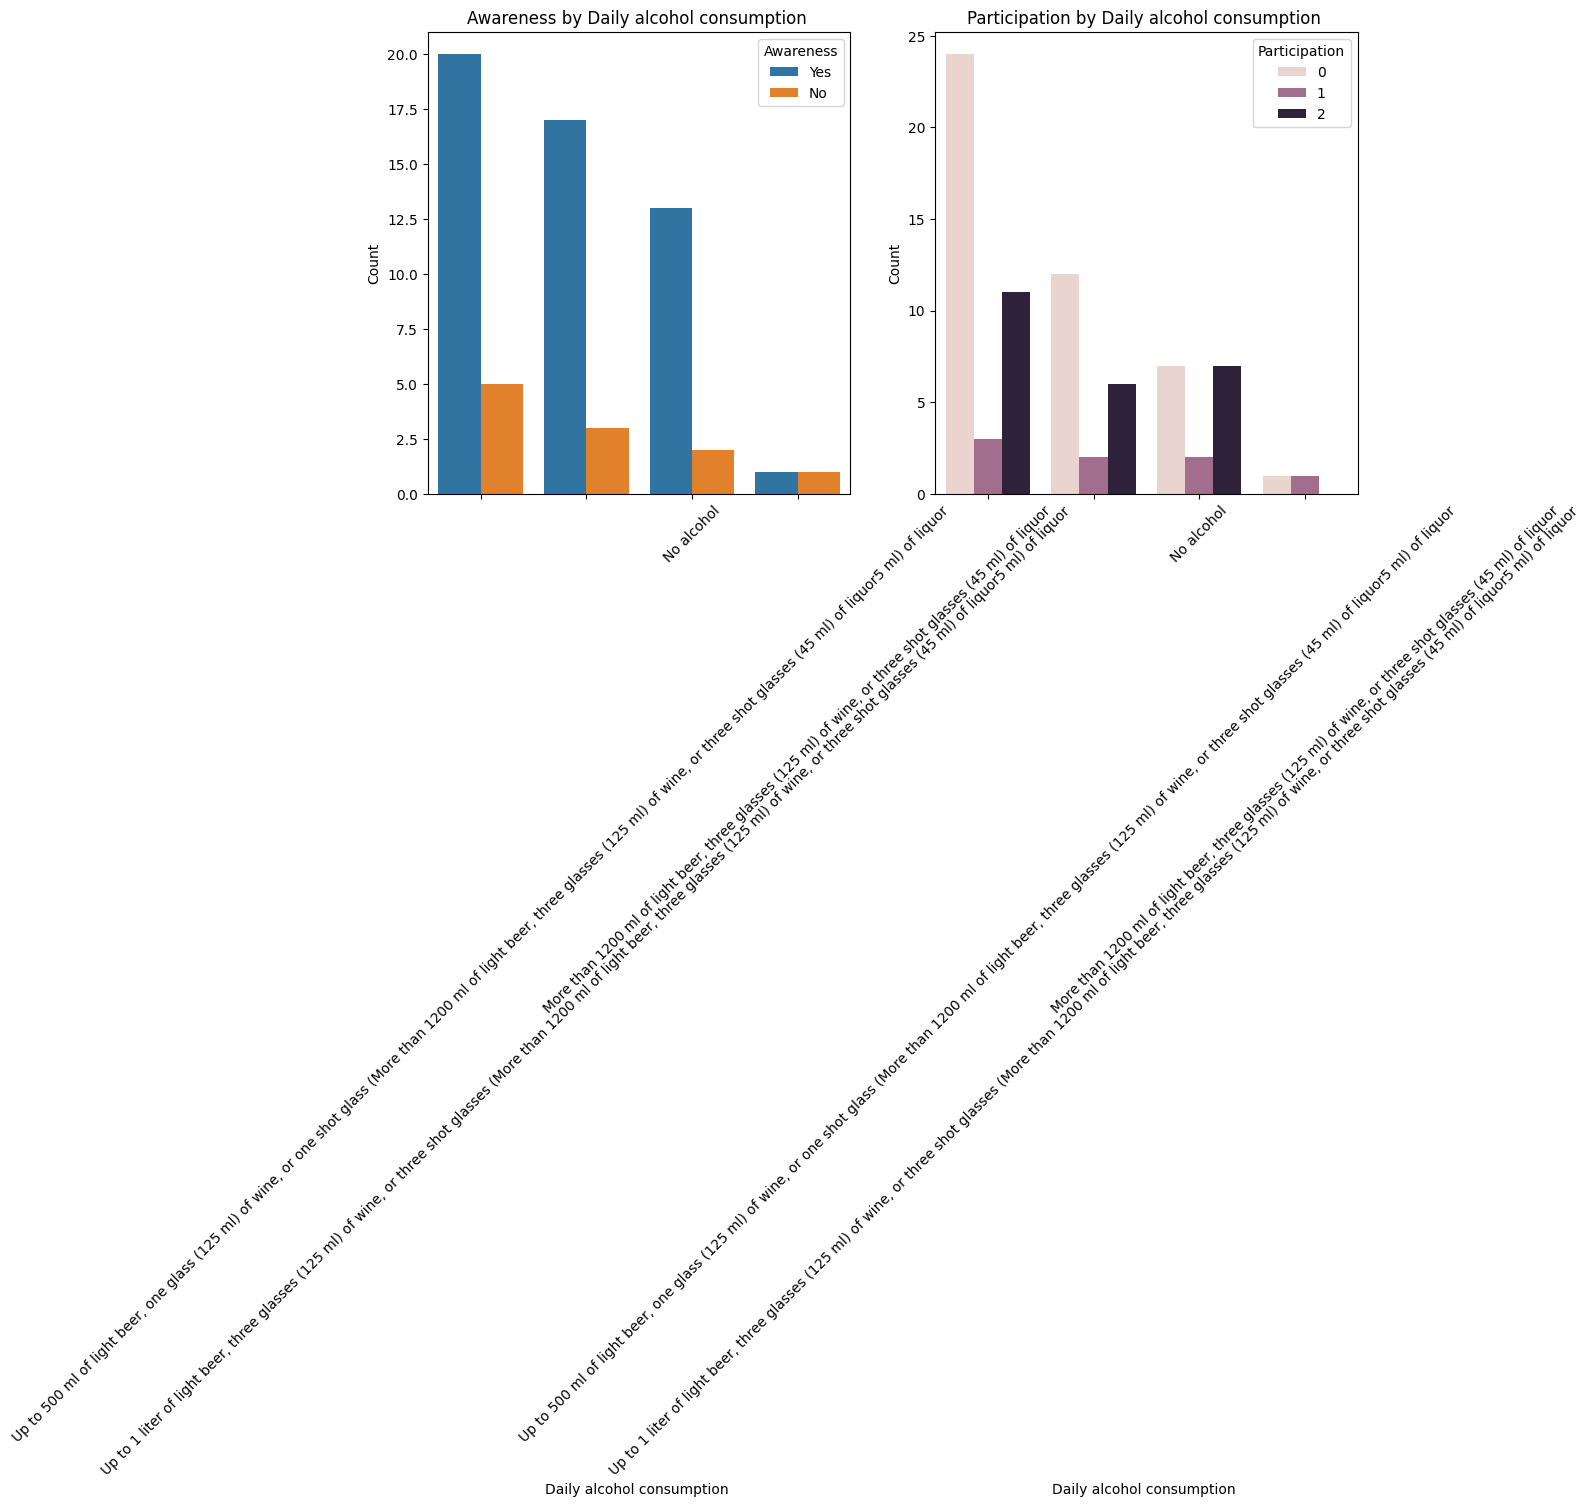

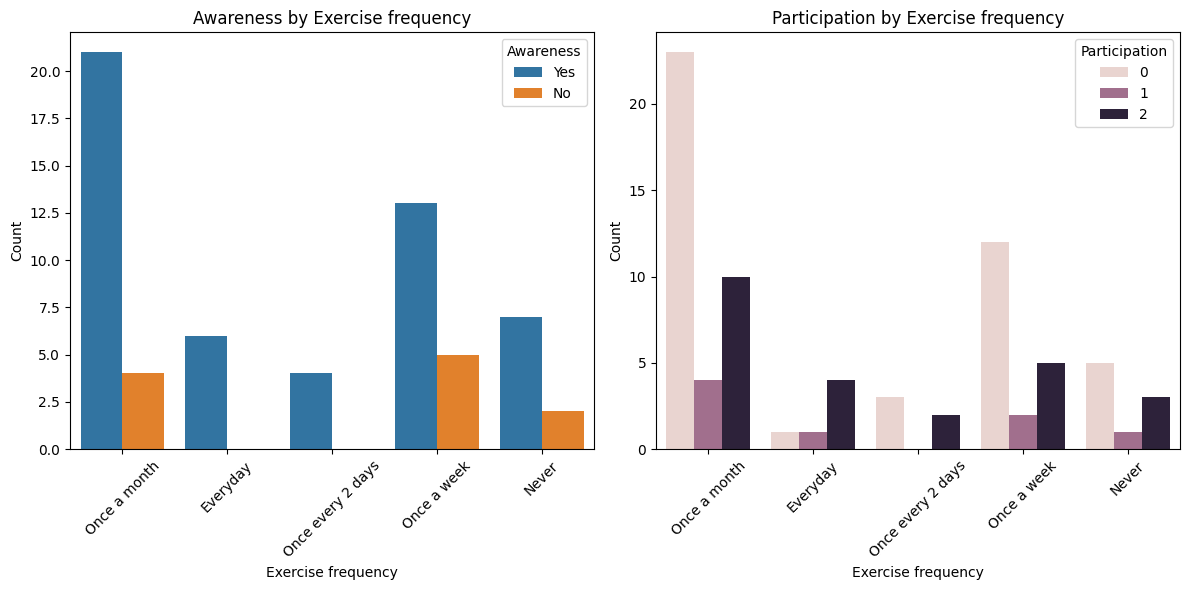

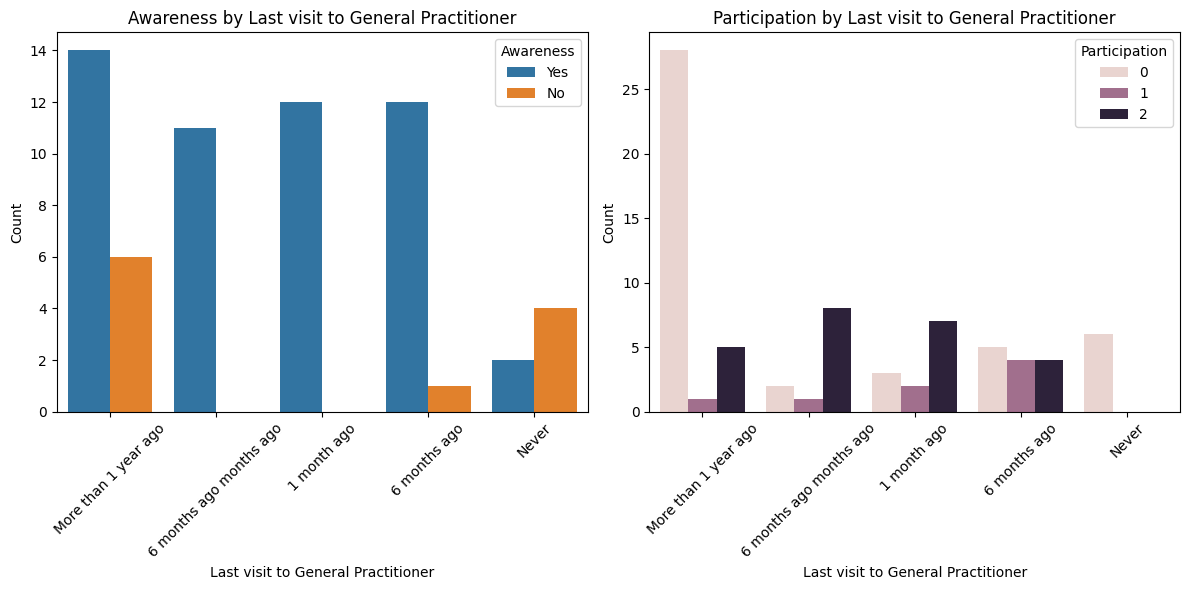

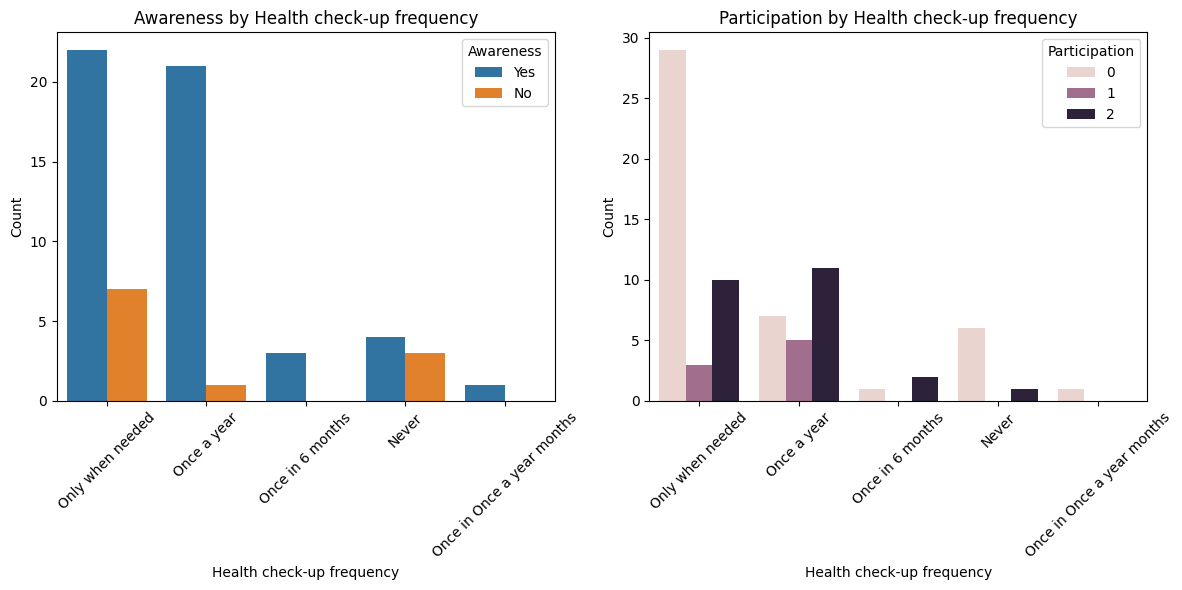

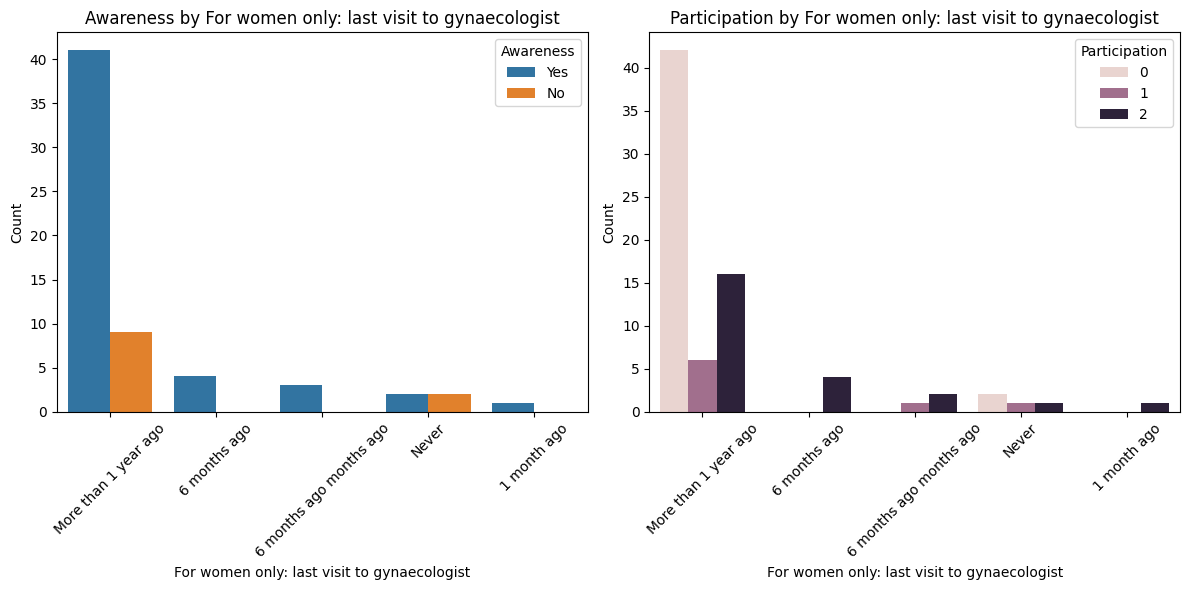

Chi-square test results for Awareness:
Chi-square value: 0.26768849485567736
p-value: 0.6048865810444508

Chi-square test results for Participation:
Chi-square value: 1.915993265993266
p-value: 0.3836607298284078


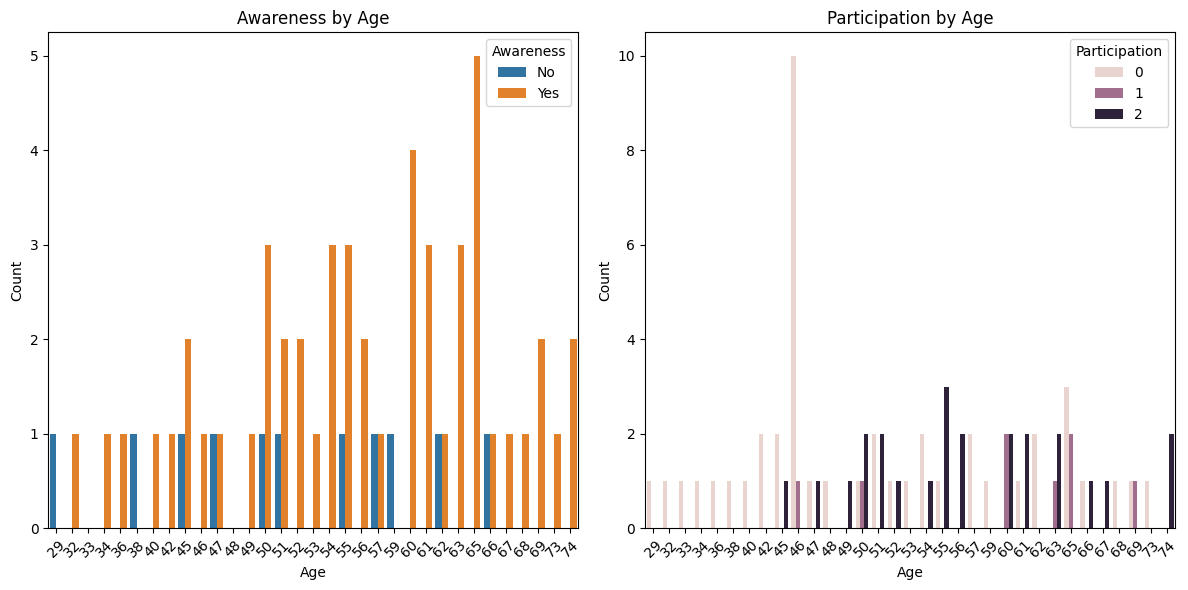

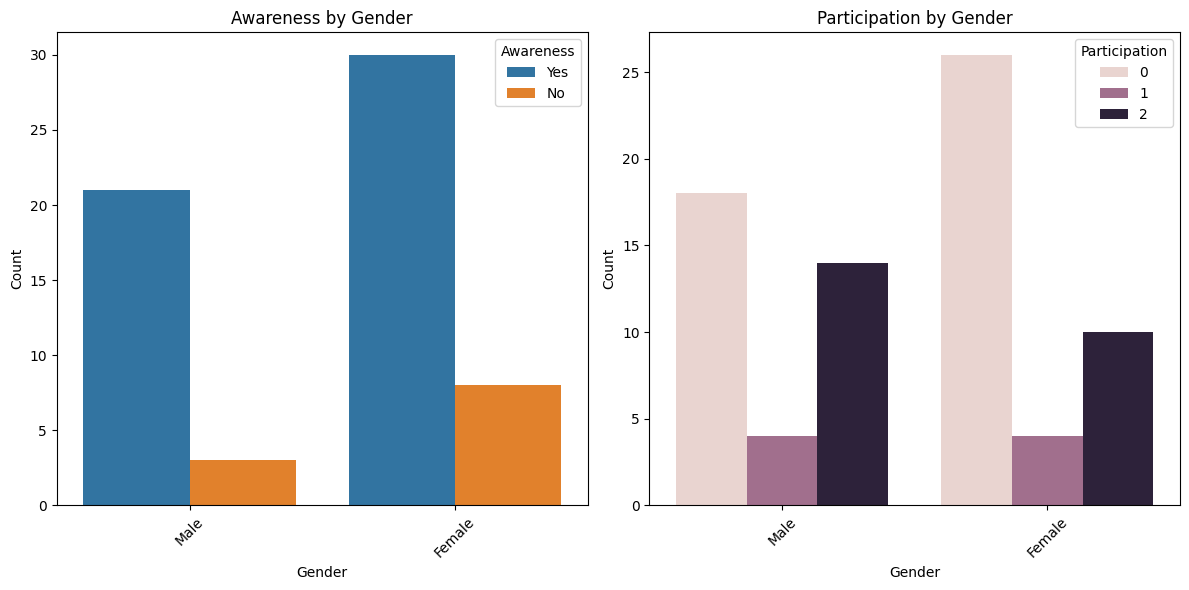

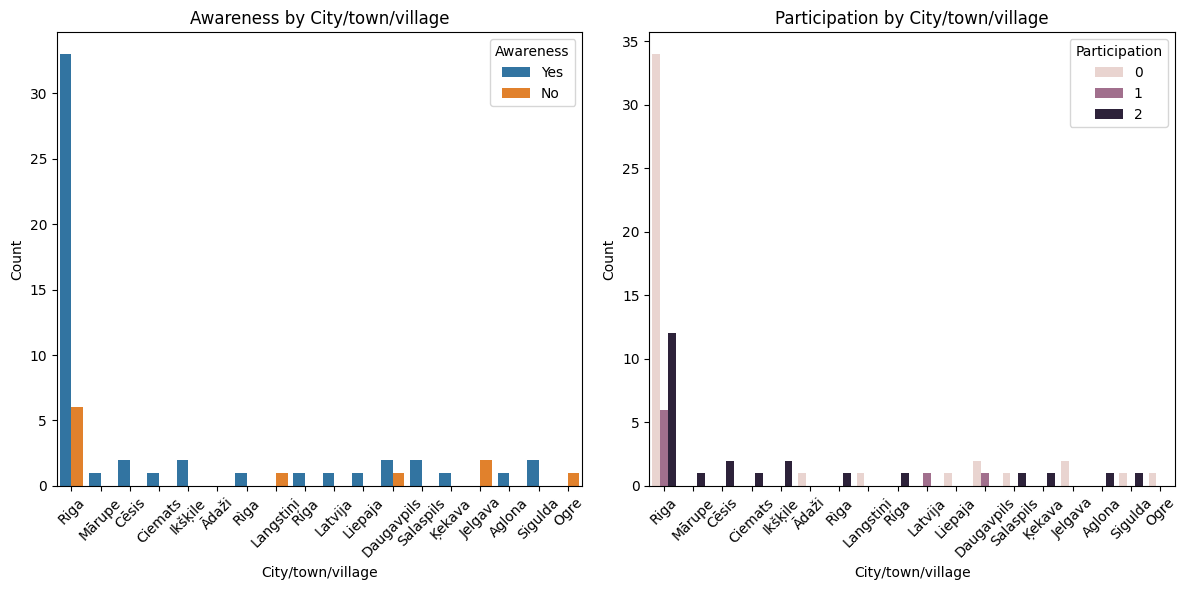

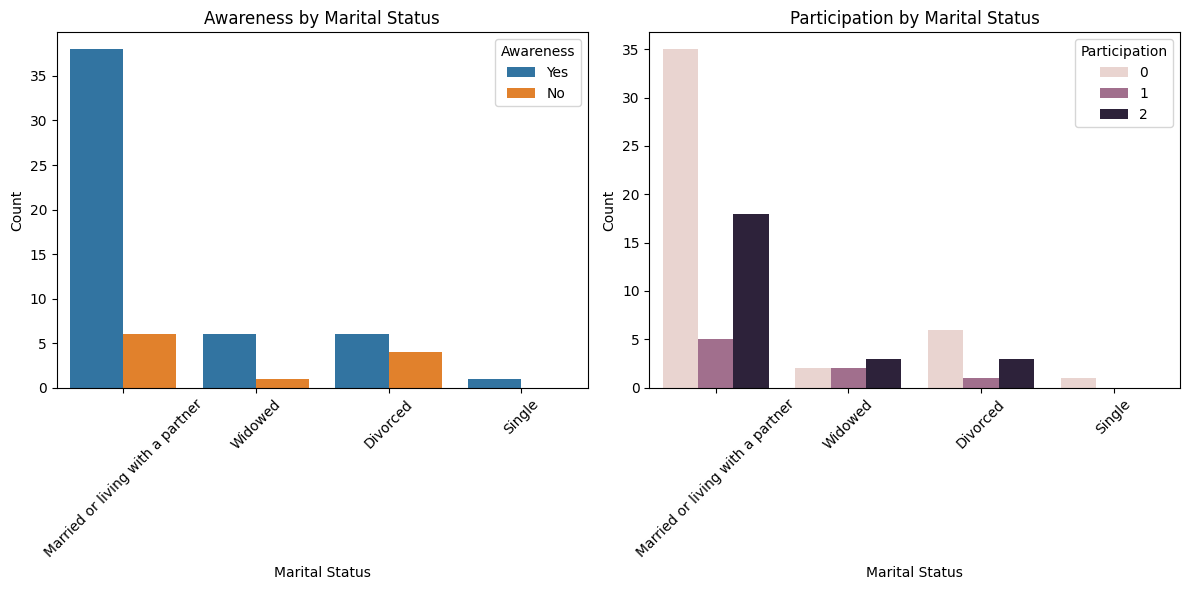

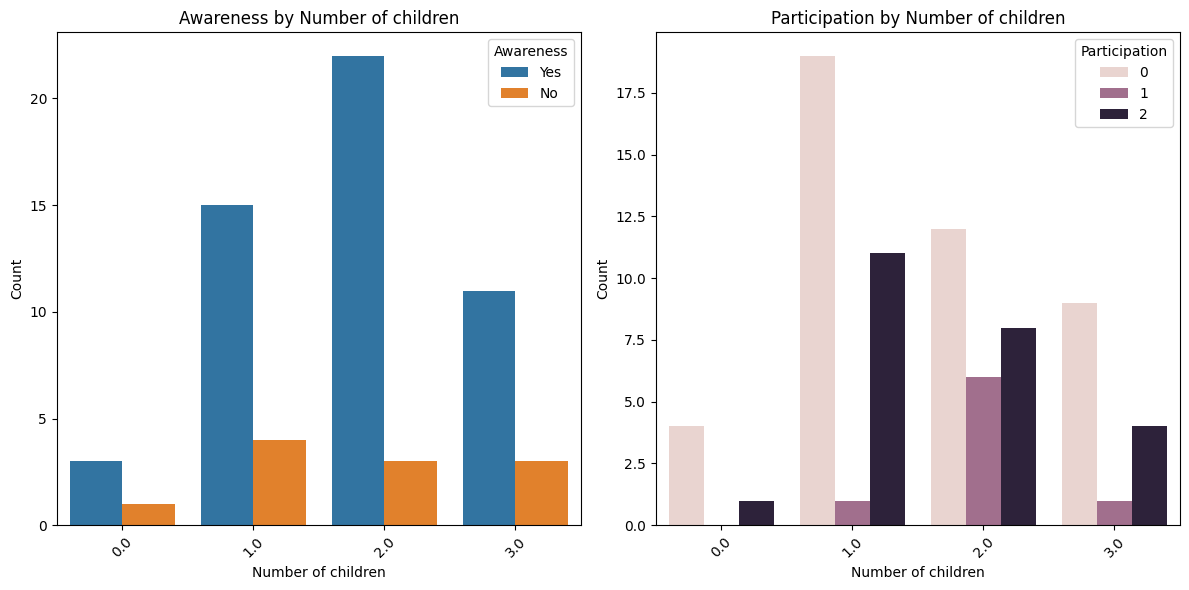

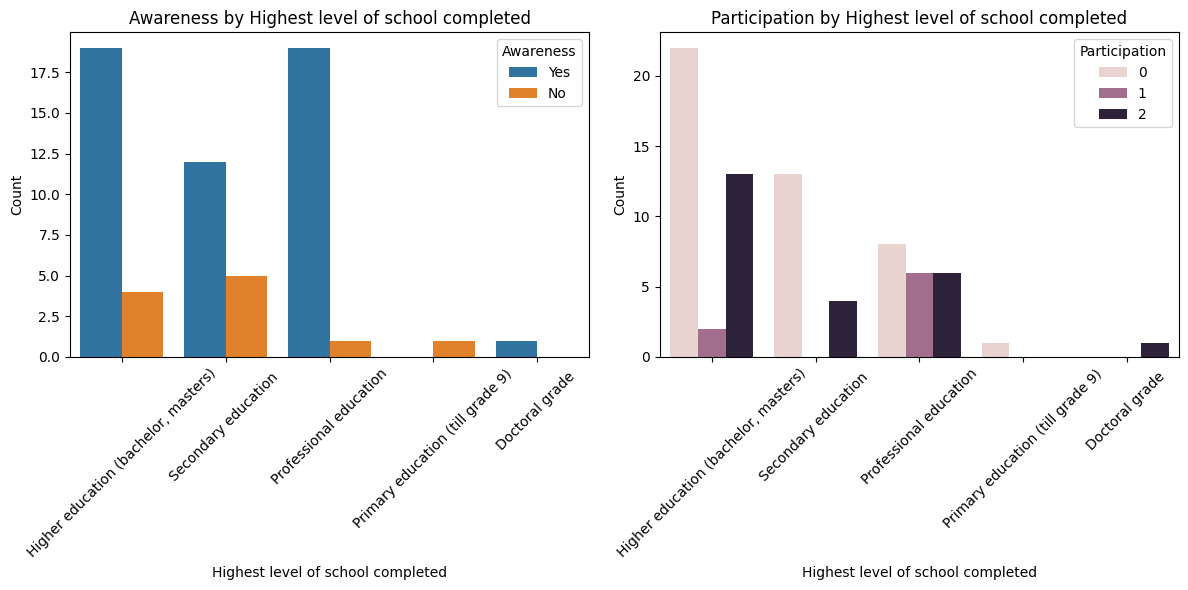

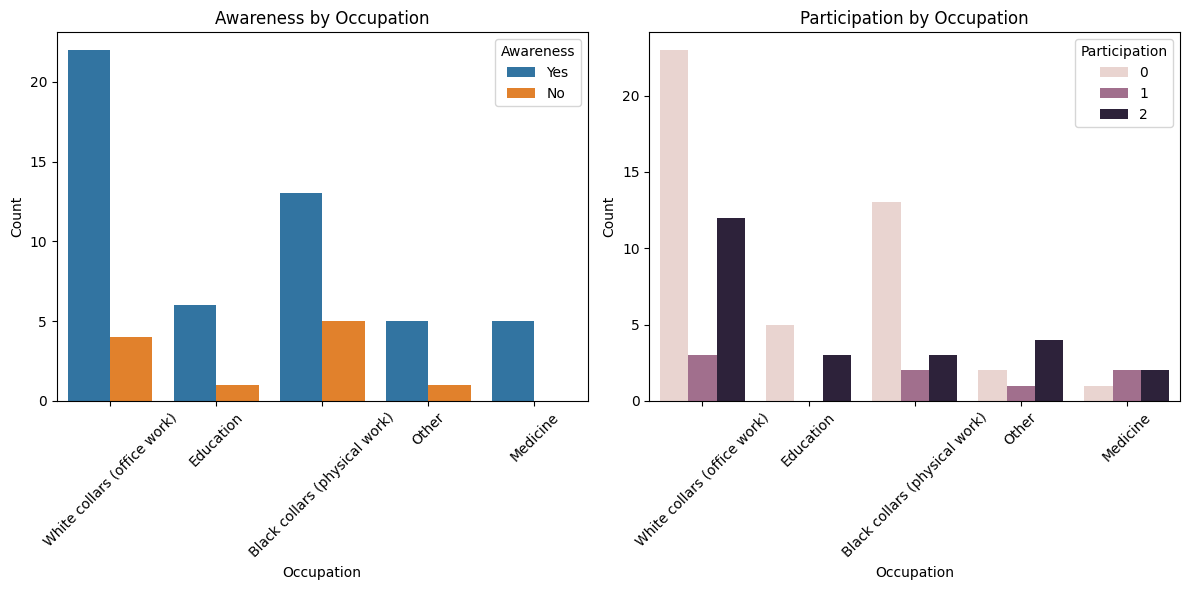

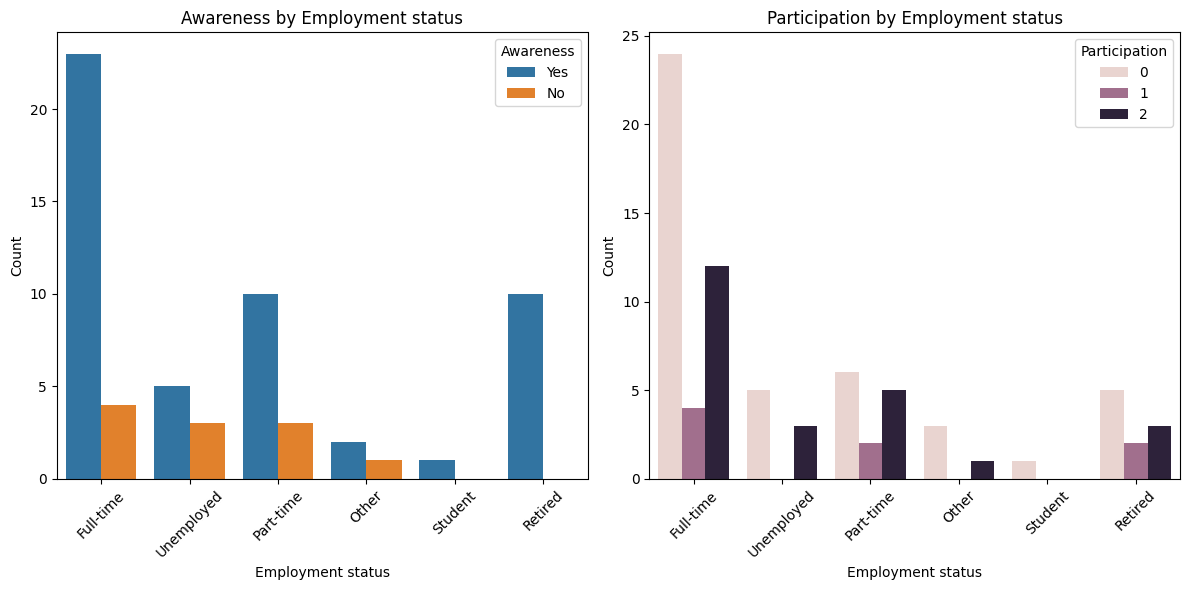

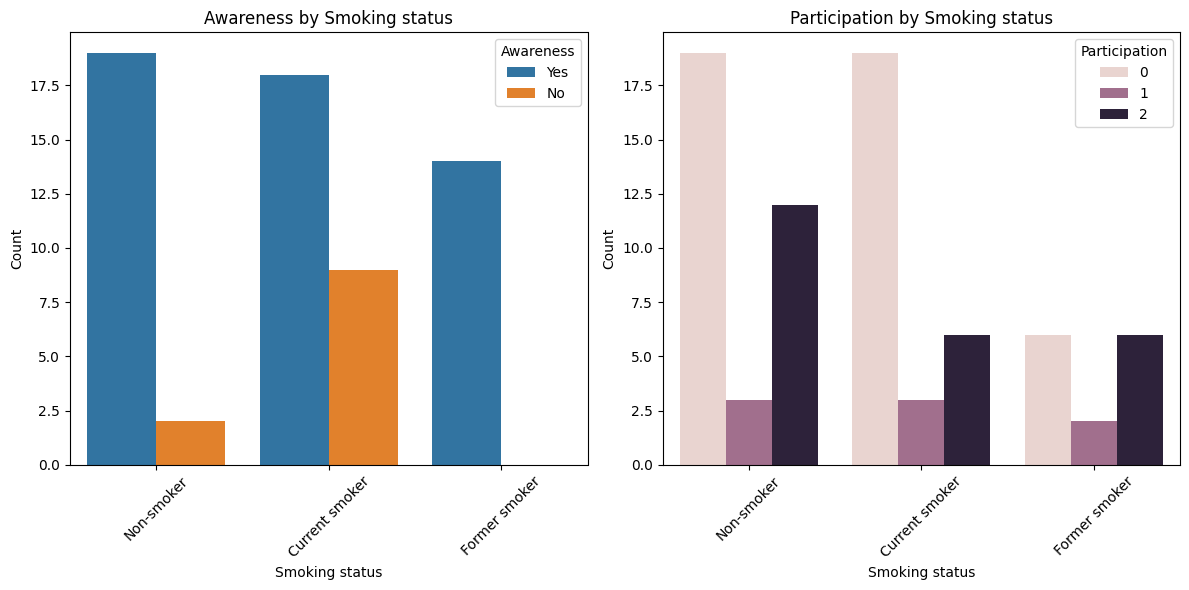

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/1211621380.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


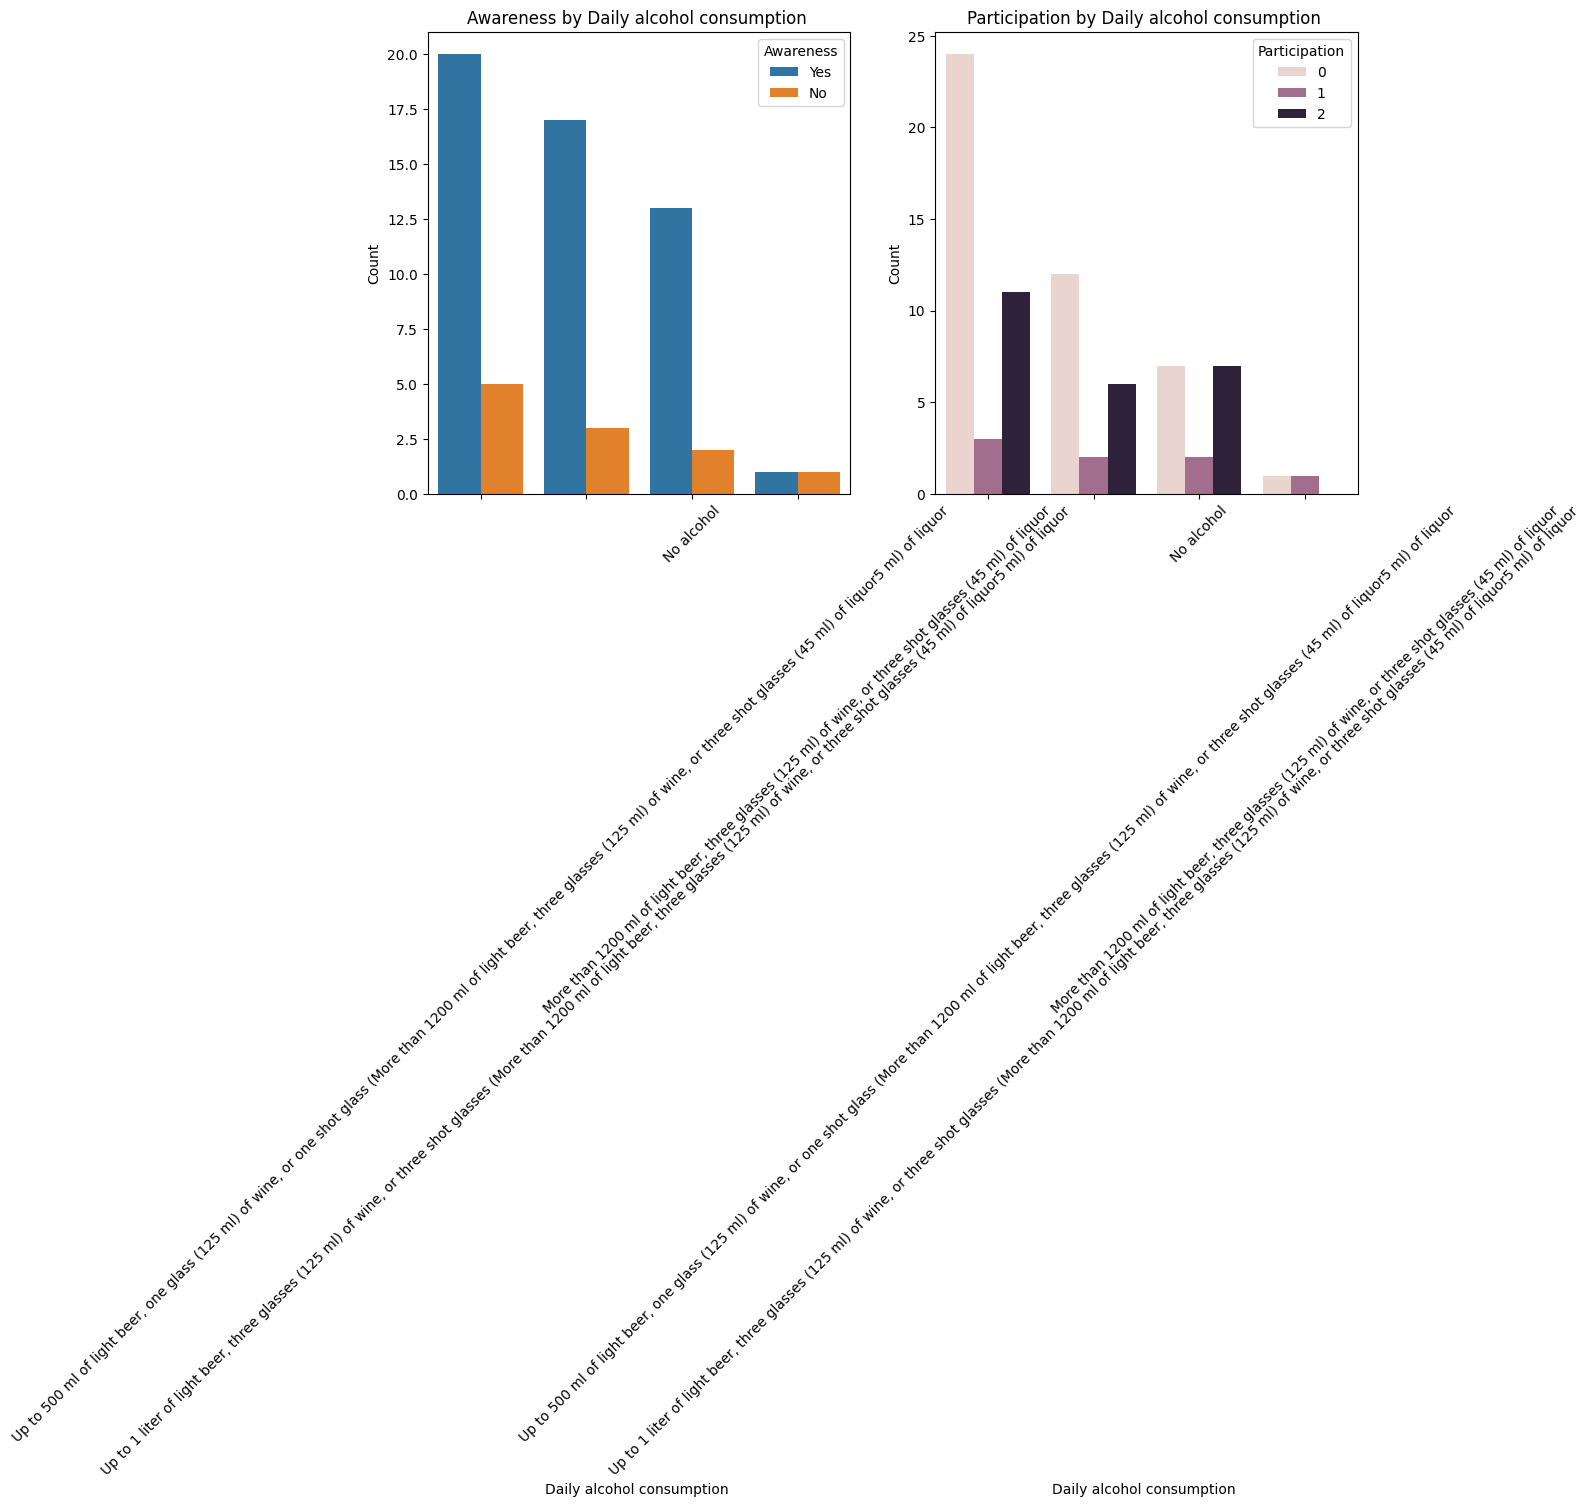

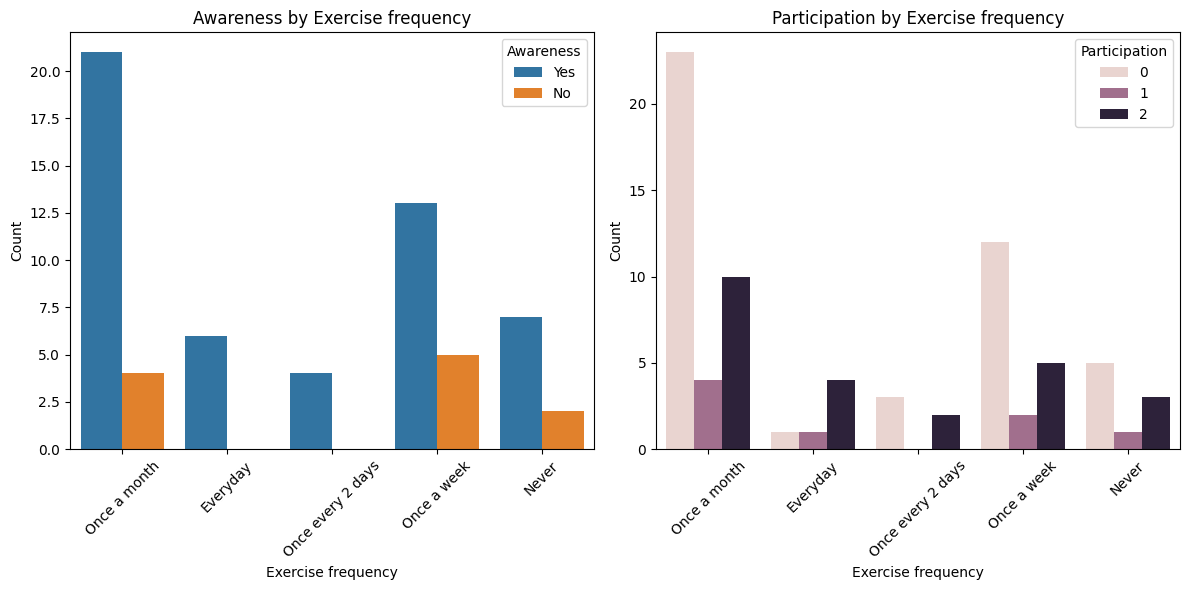

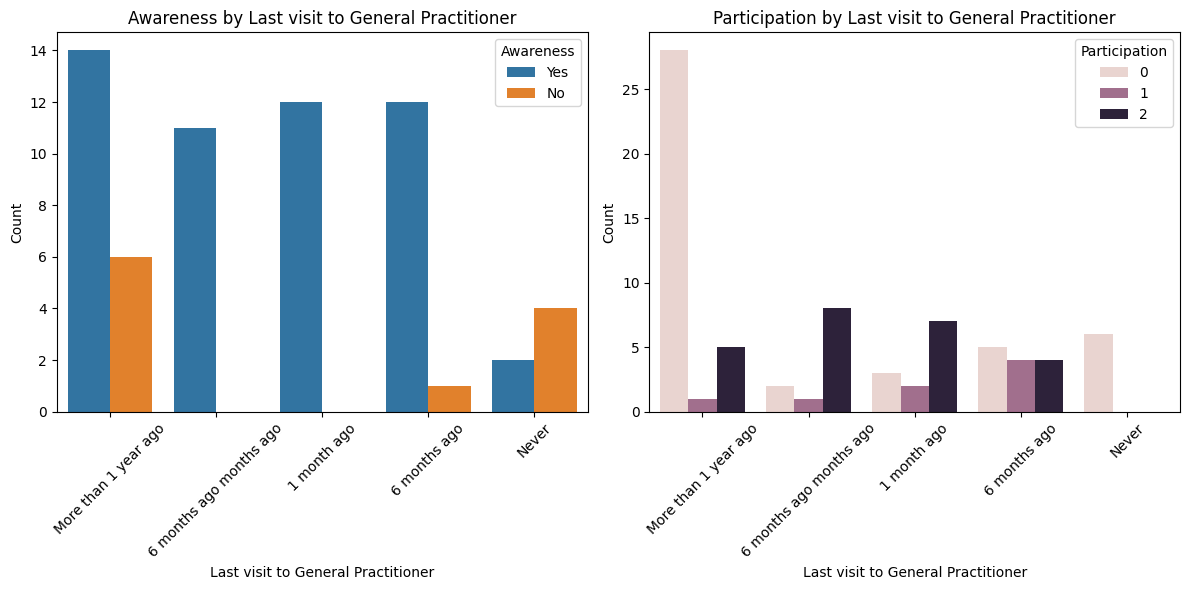

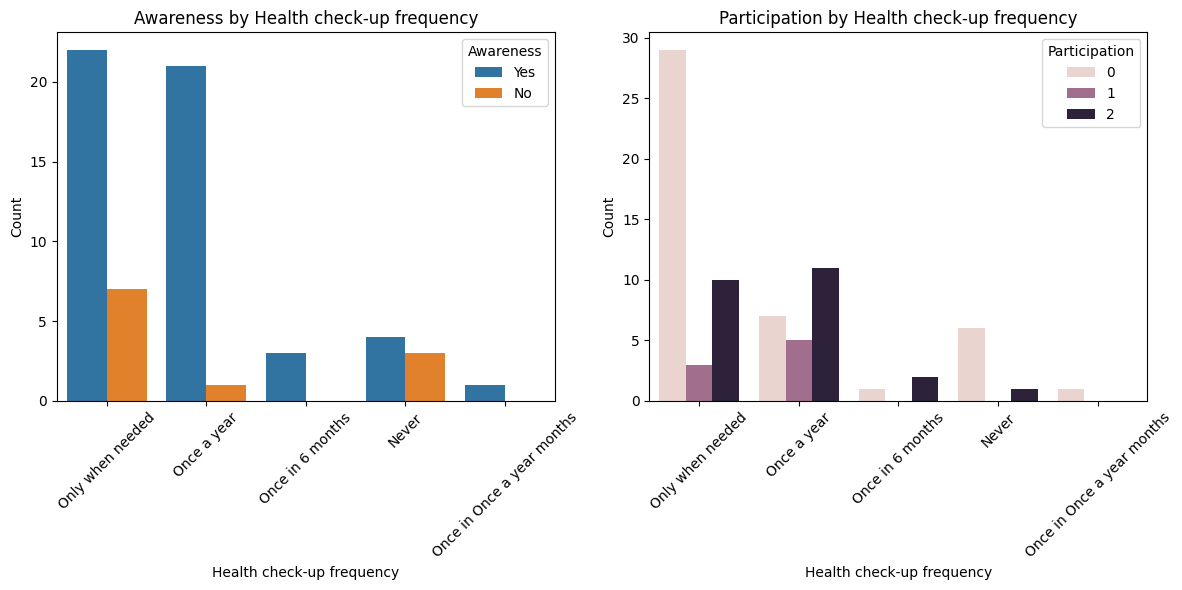

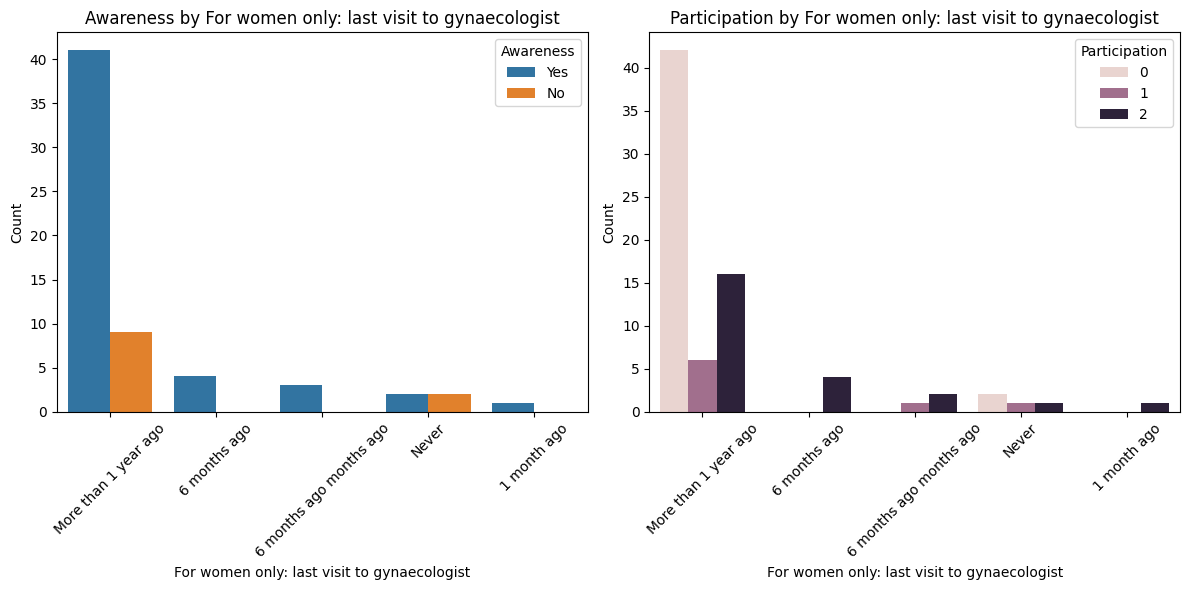

Chi-square test results for Awareness:
Chi-square value: 0.26768849485567736
p-value: 0.6048865810444508

Chi-square test results for Participation:
Chi-square value: 1.915993265993266
p-value: 0.3836607298284078


In [31]:
# Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 
# Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline


# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Replace variations of Riga with a single label
df['City/town/village'] = df['City/town/village'].replace({'Rīga': 'Riga', 'Rīgā': 'Riga'})

# Exclude Šveice, Lausanne from the data
df = df[df['City/town/village'] != 'Šveice, Lausanne']

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns].copy()  # Create a copy of the DataFrame

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Visualize attitudes towards screening and participation by sociodemographic factors
def visualize_attitudes_and_participation():
    # Loop through each relevant column
    for column in data.columns[:-2]:  # Exclude the last two columns (awareness and participation)
        plt.figure(figsize=(12, 6))
        
        # Plot awareness by sociodemographic factor
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue='Familiarity with the concept of cancer screening in Latvia', data=data)
        plt.title(f'Awareness by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Awareness')
        plt.xticks(rotation=45)

        # Plot participation by sociodemographic factor
        plt.subplot(1, 2, 2)
        sns.countplot(x=column, hue='If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ', data=data)
        plt.title(f'Participation by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Participation')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Call the functions
visualize_attitudes_and_participation()
statistical_analysis()

# Statistical Analysis
def statistical_analysis():
    # Conduct chi-square tests for awareness and participation
    contingency_table_awareness = pd.crosstab(data['Gender'], data['Familiarity with the concept of cancer screening in Latvia'])
    chi2_awareness, p_awareness, _, _ = chi2_contingency(contingency_table_awareness)

    contingency_table_participation = pd.crosstab(data['Gender'], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '])
    chi2_participation, p_participation, _, _ = chi2_contingency(contingency_table_participation)

    print("Chi-square test results for Awareness:")
    print("Chi-square value:", chi2_awareness)
    print("p-value:", p_awareness)

    print("\nChi-square test results for Participation:")
    print("Chi-square value:", chi2_participation)
    print("p-value:", p_participation)

# Call the functions
visualize_attitudes_and_participation()
statistical_analysis()

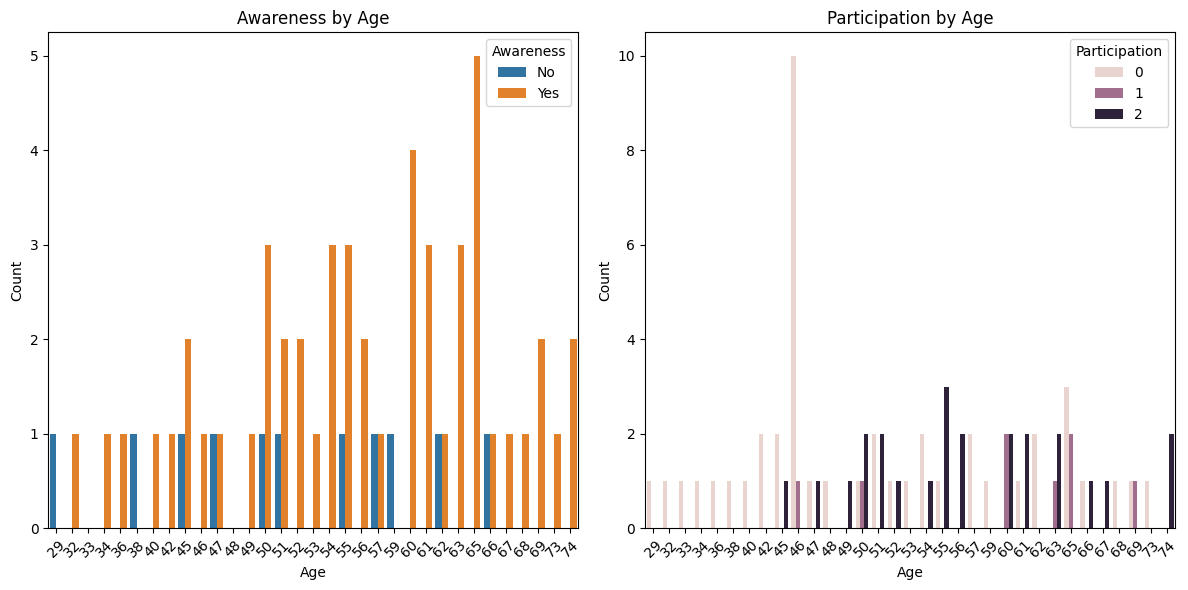

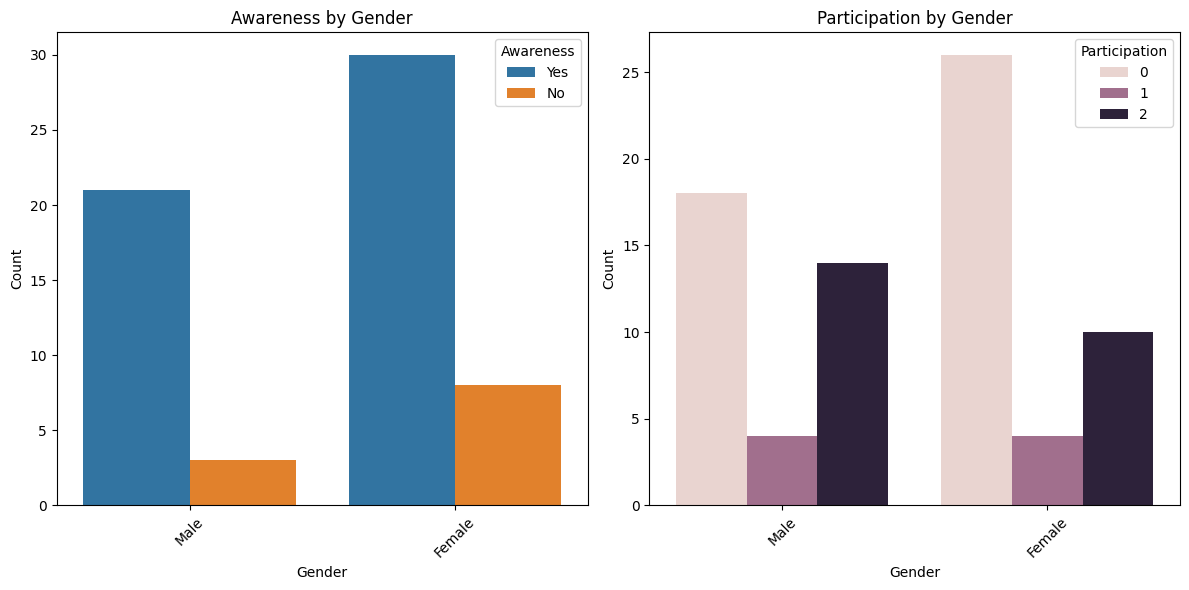

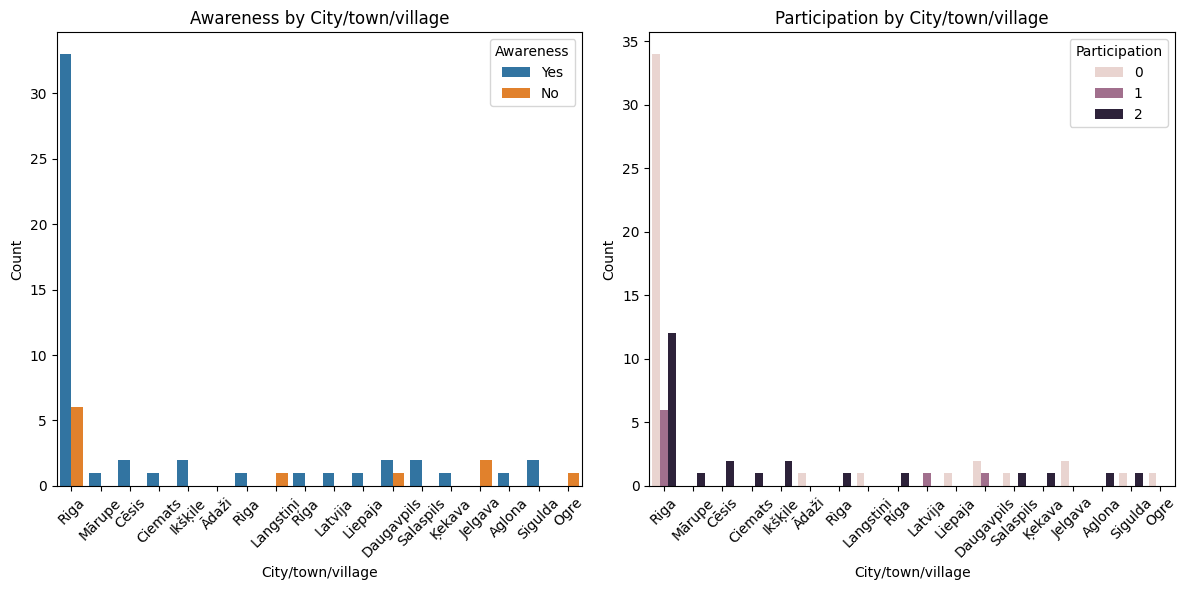

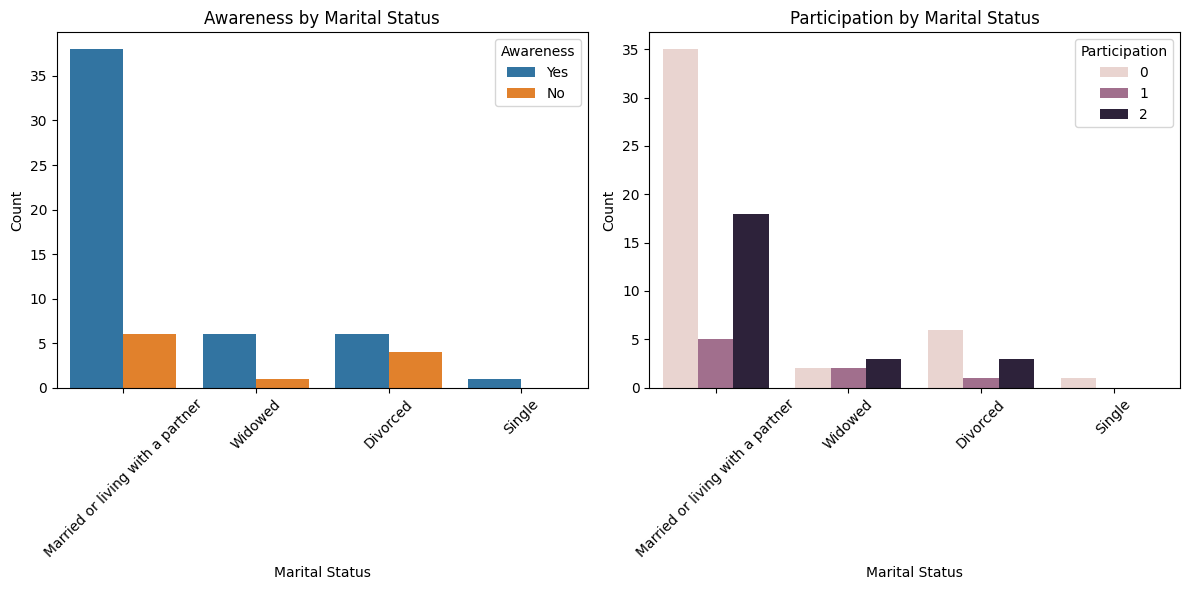

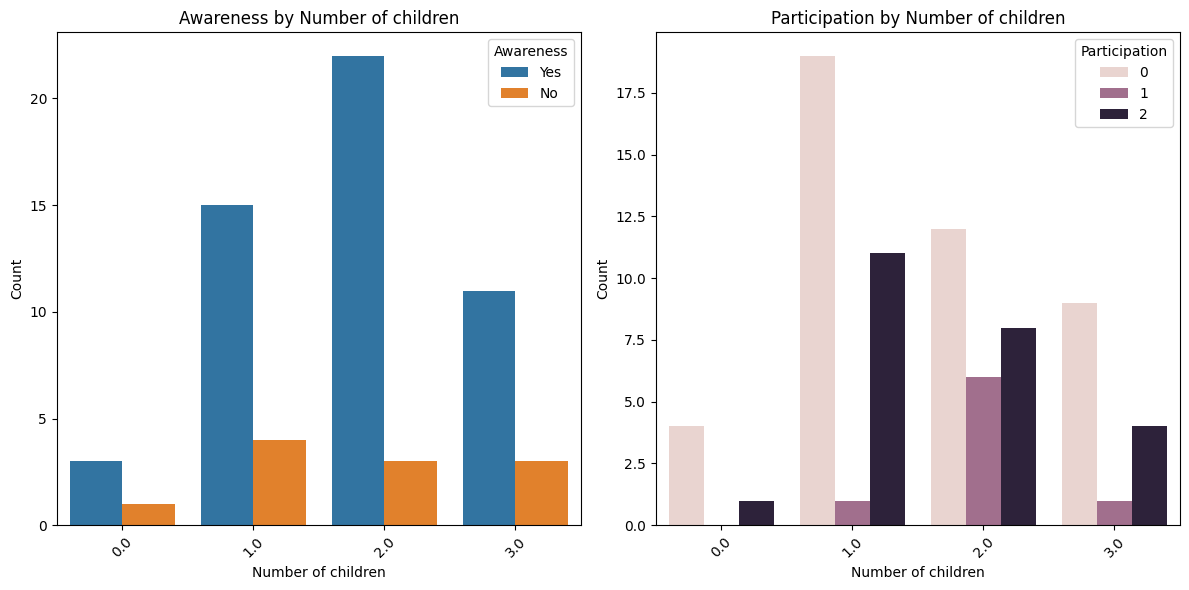

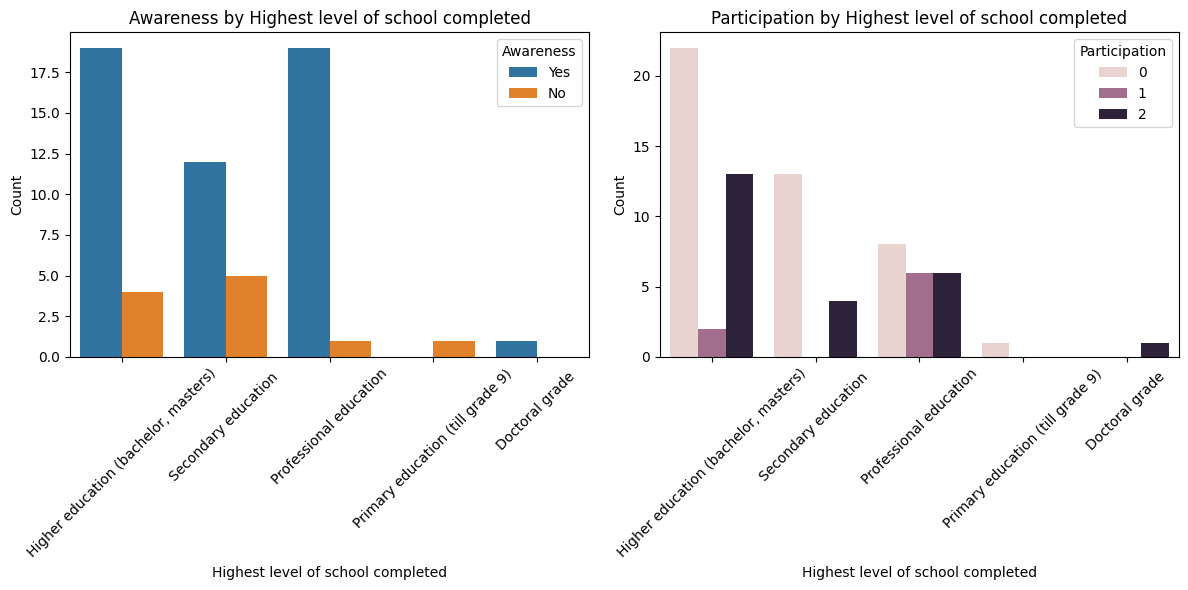

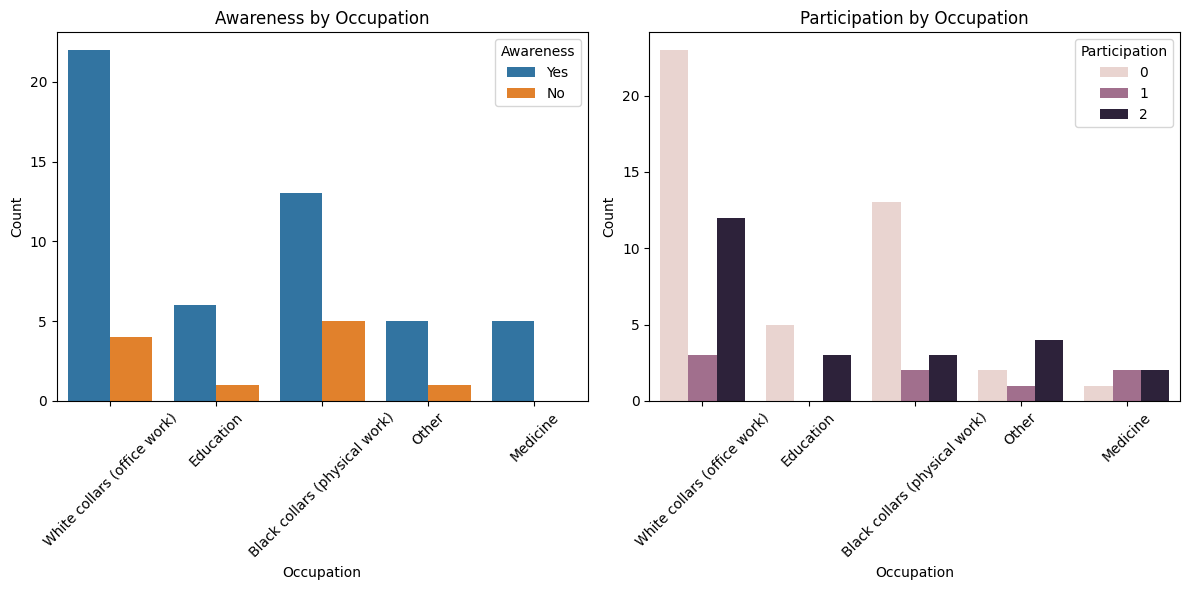

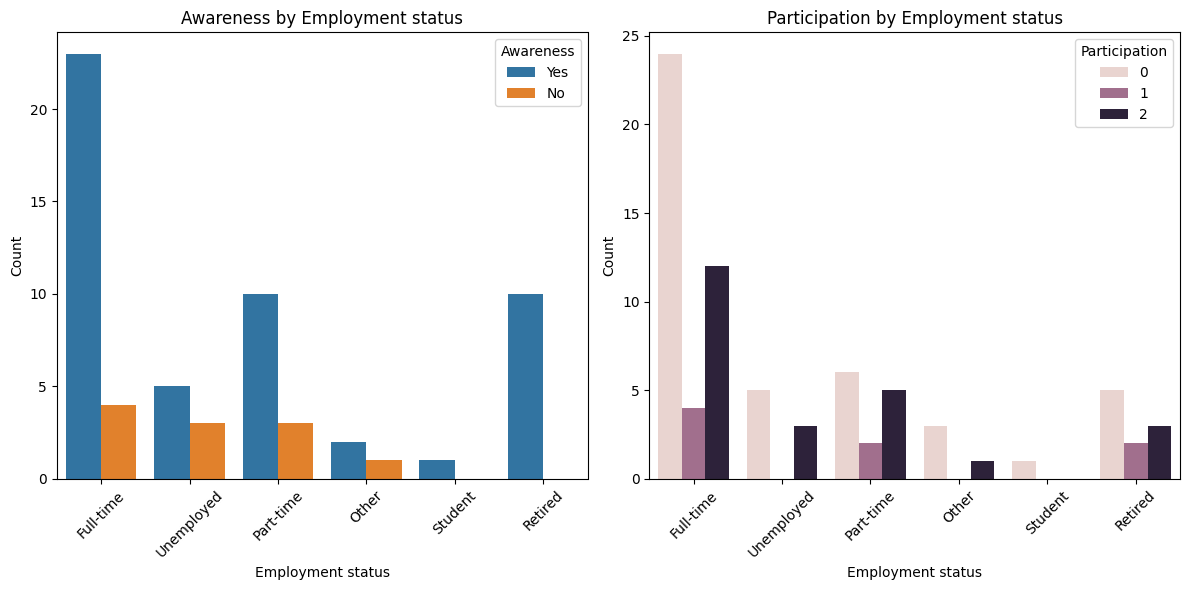

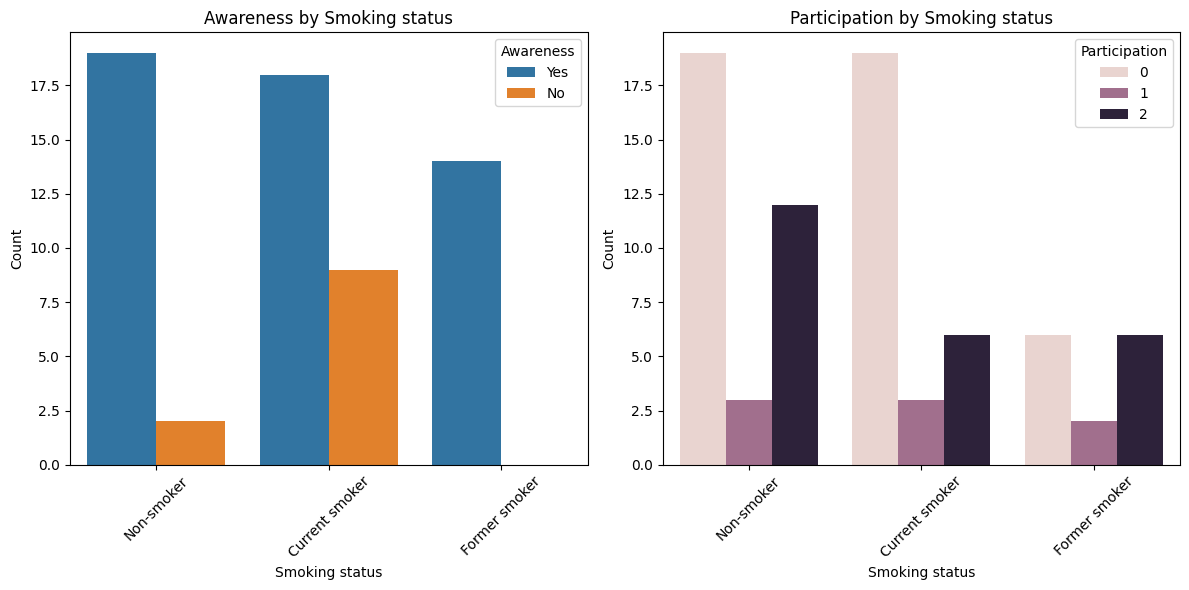

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49144/1989840118.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


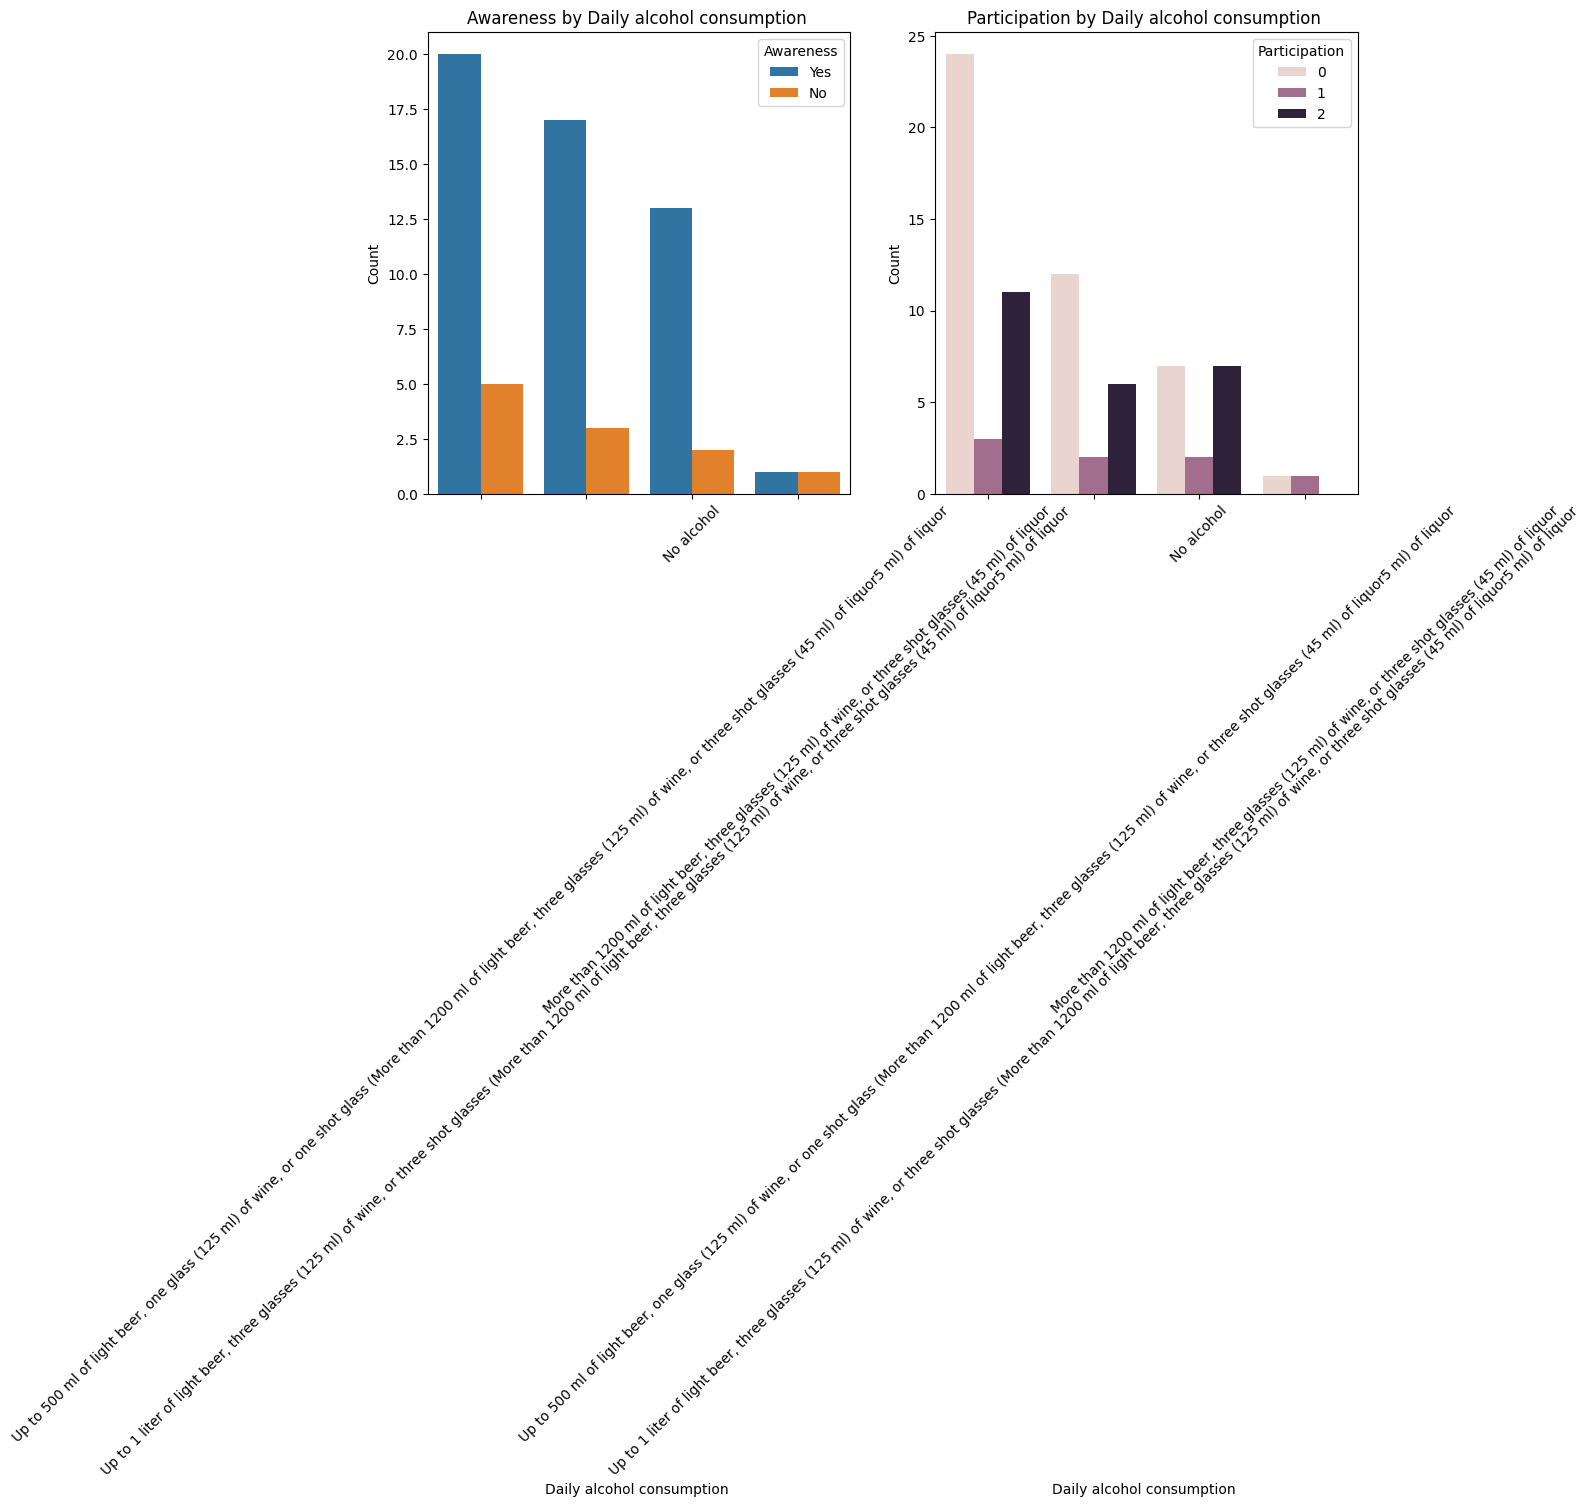

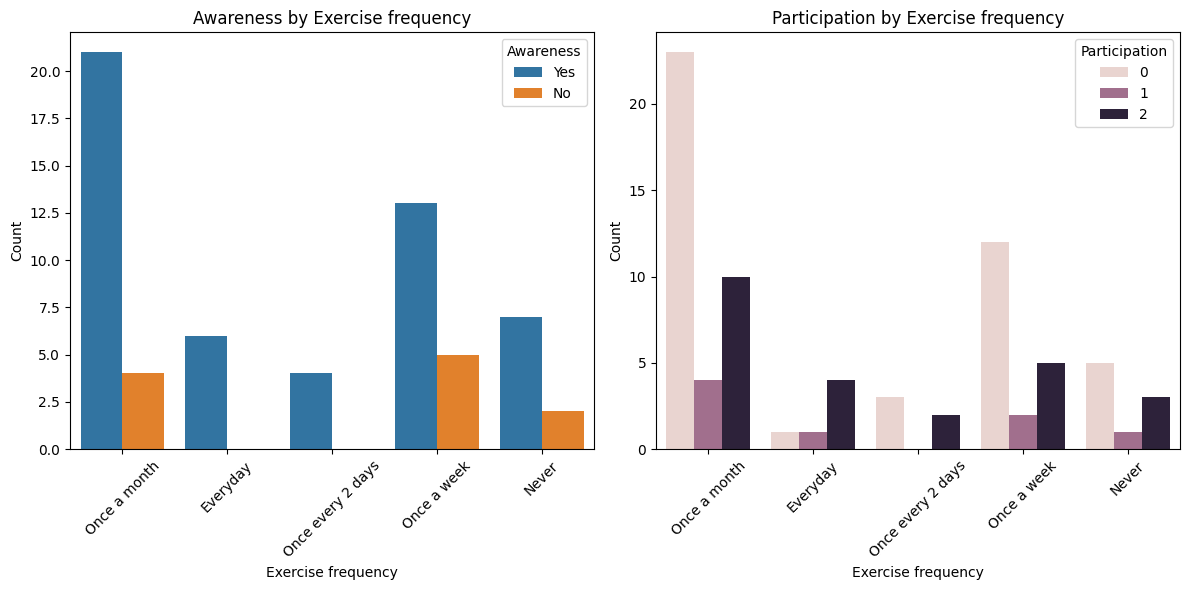

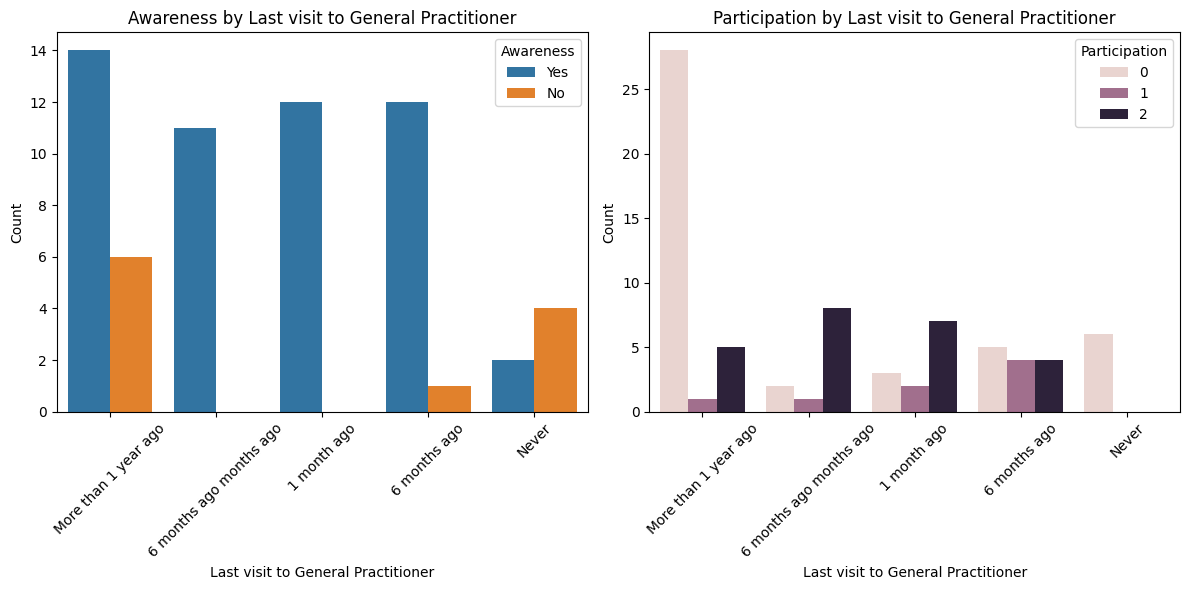

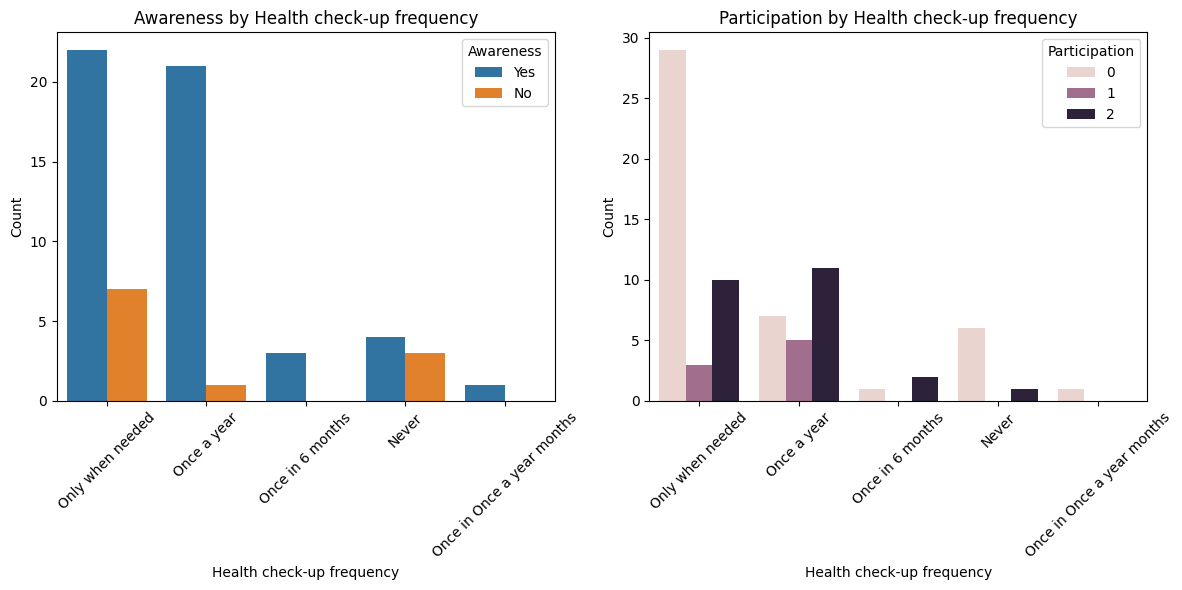

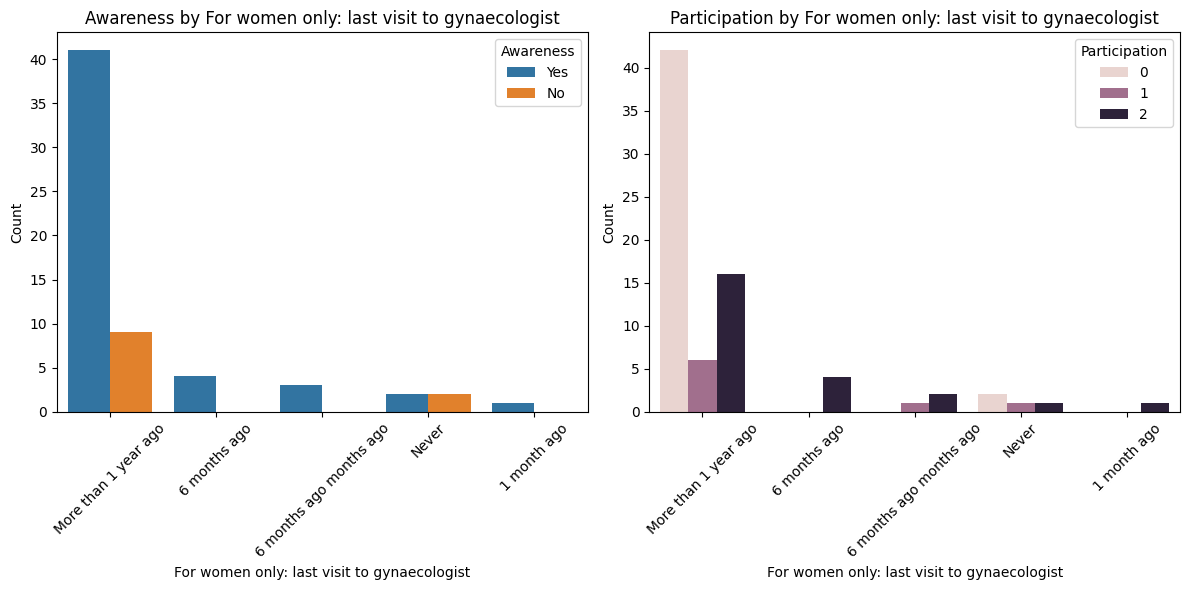

Chi-square test results for Awareness:
Chi-square value: 0.26768849485567736
p-value: 0.6048865810444508

Chi-square test results for Participation:
Chi-square value: 1.915993265993266
p-value: 0.3836607298284078


In [32]:
# Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 
# Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline


# Load the cleaned dataset
df = pd.read_csv('filtered_data.csv')

# Replace variations of Riga with a single label
df['City/town/village'] = df['City/town/village'].replace({'Rīga': 'Riga', 'Rīgā': 'Riga'})

# Exclude Šveice, Lausanne from the data
df = df[df['City/town/village'] != 'Šveice, Lausanne']

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns].copy()  # Create a copy of the DataFrame

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Visualize attitudes towards screening and participation by sociodemographic factors
def visualize_attitudes_and_participation():
    # Loop through each relevant column
    for column in data.columns[:-2]:  # Exclude the last two columns (awareness and participation)
        plt.figure(figsize=(12, 6))
        
        # Plot awareness by sociodemographic factor
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue='Familiarity with the concept of cancer screening in Latvia', data=data)
        plt.title(f'Awareness by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Awareness')
        plt.xticks(rotation=45)

        # Plot participation by sociodemographic factor
        plt.subplot(1, 2, 2)
        sns.countplot(x=column, hue='If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ', data=data)
        plt.title(f'Participation by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Participation')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()


# Call the functions
visualize_attitudes_and_participation()
statistical_analysis()

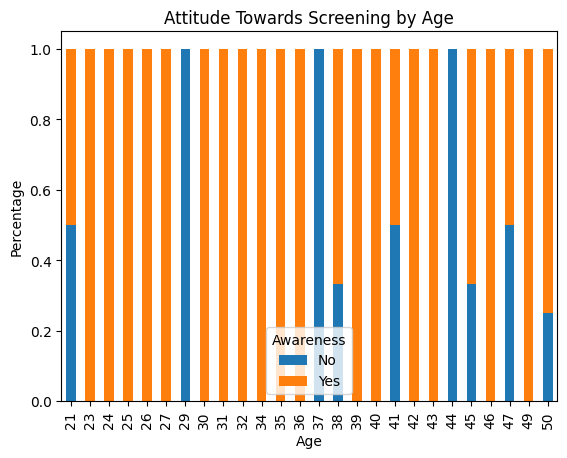

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia          No  \
Age                                                                      
21                                                           50.000000   
23                                                                 NaN   
24                                                                 NaN   
25                                                                 NaN   
26                                                                 NaN   
27                                                                 NaN   
29                                                          100.000000   
30                                                                 NaN   
31                                                                 NaN   
32                                                                 NaN   
34                                                                 NaN   
35                                                                 NaN   
36                                                                 NaN   
37                                                          100.000000   
38                                                           33.333333   
39                                                                 NaN   
40                                                                 NaN   
41                                                           50.000000   
42                                                                 NaN   
43                                                                 NaN   
44                                                          100.000000   
45                                                           33.333333   
46                                                                 NaN   
47                                                           50.000000   
49                                                                 NaN   
50                                                           25.000000   

Familiarity with the concept of cancer screening in Latvia         Yes  
Age                                                                     
21                                                           50.000000  
23                                                          100.000000  
24                                                          100.000000  
25                                                          100.000000  
26                                                          100.000000  
27                                                          100.000000  
29                                                                 NaN  
30                                                          100.000000  
31                                                          100.000000  
32                                                          100.000000  
34                                                          100.000000  
35                                                          100.000000  
36                                                          100.000000  
37                                                                 NaN  
38                                                           66.666667  
39                                                          100.000000  
40                                                          100.000000  
41                                                           50.000000  
42                                                          100.000000  
43                                                          100.000000  
44                                                                 NaN  
45                                                           66.666667  
46                                                          100.000000  
47                                                           50.000000  
49                           

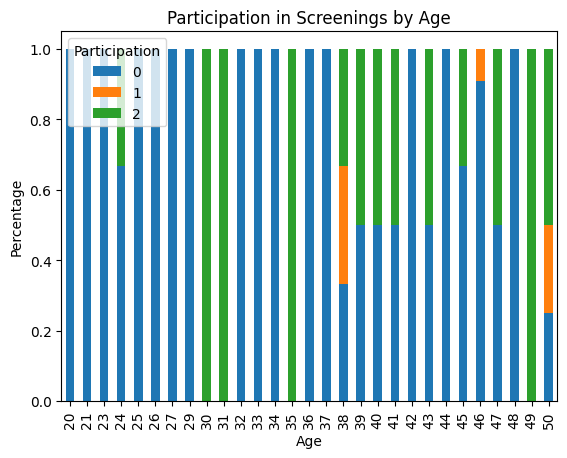

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Age                                                                                                                             
20                                                                                                                 100.000000   
21                                                                                                                 100.000000   
23                                                                                                                 100.000000   
24                                                                                                                  66.666667   
25                                                                                                                 100.000000   
26                                                                                                                 100.000000   
27                                                                                                                 100.000000   
29                                                                                                                 100.000000   
30                                                                                                                        NaN   
31                                                                                                                        NaN   
32                                                                                                                 100.000000   
33                                                                                                                 100.000000   
34                                                                                                                 100.000000   
35                                                                                                                        NaN   
36                                                                                                                 100.000000   
37                                                                                                                 100.000000   
38                                                                                                                  33.333333   
39                                                                                                                  50.000000   
40                                                                                                                  50.000000   
41                                                                                                                  50.000000   
42                                                                                                                 100.000000   
43                                                                                                                  50.000000   
44                                                                                                                 100.000000   
45                                                                                                                  66.666667   
46                                                                                                                  90.909091   
47                                                                                                                  50.000000   
48                                                                                                                 100.000000   
49                                                                                                                        NaN   
50                                                                                                                  25.000000   



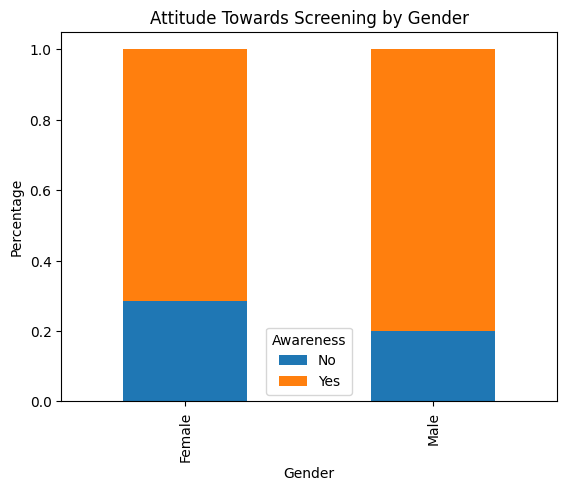

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Gender                                                                  
Female                                                      28.571429   
Male                                                        20.000000   

Familiarity with the concept of cancer screening in Latvia        Yes  
Gender                                                                 
Female                                                      71.428571  
Male                                                        80.000000

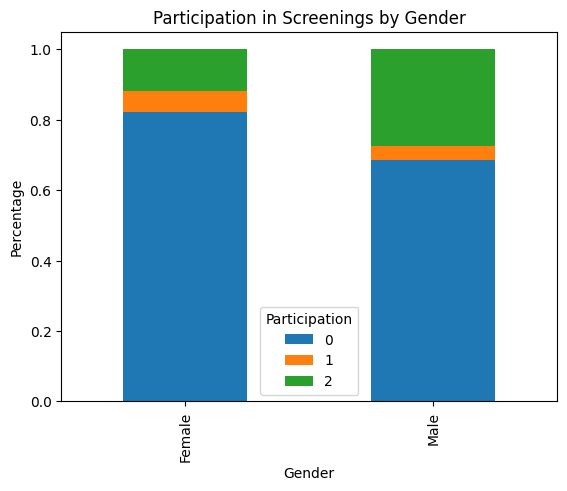

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           0  \
Gender                                                                                                                         
Female                                                                                                             82.352941   
Male                                                                                                               68.627451   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?          1  \
Gender                                                                                                                        
Female                                                                                                             5.882353   
Male                                                                                                               3.921569   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Gender                                                                                                                        
Female                                                                                                             11.764706  
Male                                                                                                               27.450980

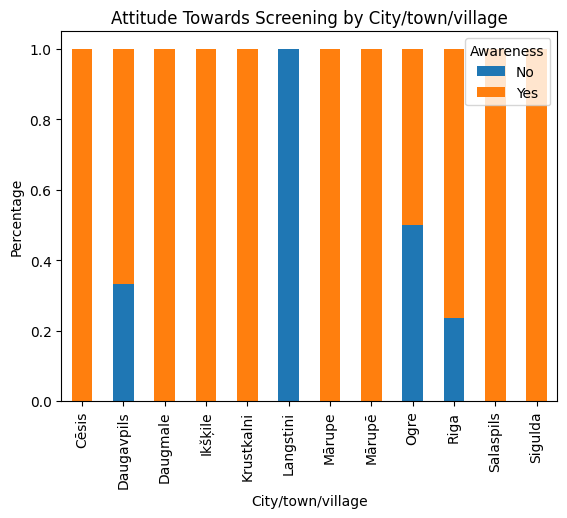

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia          No  \
City/town/village                                                        
Cēsis                                                              NaN   
Daugavpils                                                   33.333333   
Daugmale                                                           NaN   
Ikšķile                                                            NaN   
Krustkalni                                                         NaN   
Langstini                                                   100.000000   
Mārupe                                                             NaN   
Mārupē                                                             NaN   
Ogre                                                         50.000000   
Riga                                                         23.529412   
Salaspils                                                          NaN   
Sigulda                                                            NaN   

Familiarity with the concept of cancer screening in Latvia         Yes  
City/town/village                                                       
Cēsis                                                       100.000000  
Daugavpils                                                   66.666667  
Daugmale                                                    100.000000  
Ikšķile                                                     100.000000  
Krustkalni                                                  100.000000  
Langstini                                                          NaN  
Mārupe                                                      100.000000  
Mārupē                                                      100.000000  
Ogre                                                         50.000000  
Riga                                                         76.470588  
Salaspils                                                   100.000000  
Sigulda                                                     100.000000

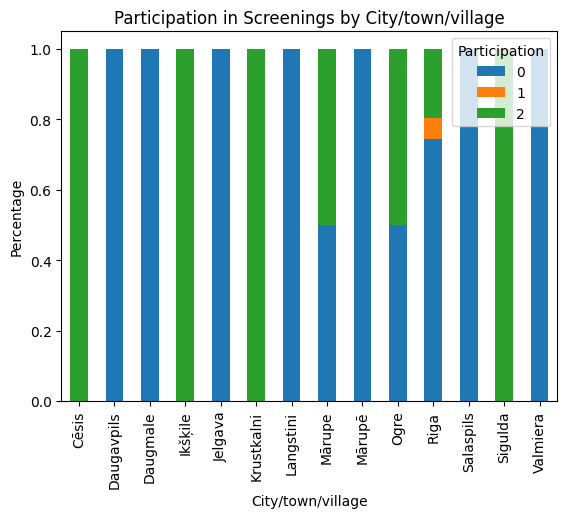

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
City/town/village                                                                                                               
Cēsis                                                                                                                     NaN   
Daugavpils                                                                                                         100.000000   
Daugmale                                                                                                           100.000000   
Ikšķile                                                                                                                   NaN   
Jelgava                                                                                                            100.000000   
Krustkalni                                                                                                                NaN   
Langstini                                                                                                          100.000000   
Mārupe                                                                                                              50.000000   
Mārupē                                                                                                             100.000000   
Ogre                                                                                                                50.000000   
Riga                                                                                                                74.509804   
Salaspils                                                                                                          100.000000   
Sigulda                                                                                                                   NaN   
Valmiera                                                                                                           100.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?          1  \
City/town/village                                                                                                             
Cēsis                                                                                                                   NaN   
Daugavpils                                                                                                              NaN   
Daugmale                                                                                                                NaN   
Ikšķile                                                                                                                 NaN   
Jelgava                                                                                                                 NaN   
Krustkalni                                                                                                              NaN   
Langstini                                                                                                               NaN   
Mārupe                                                                                                                  NaN   
Mārupē                                                                                                                  NaN   
Ogre                                                                                                                    NaN   
Riga                                                                                                               5.882353   
Salaspils                                                                                                               NaN   
Sigulda                                                                                                                 NaN   
Valmiera                      

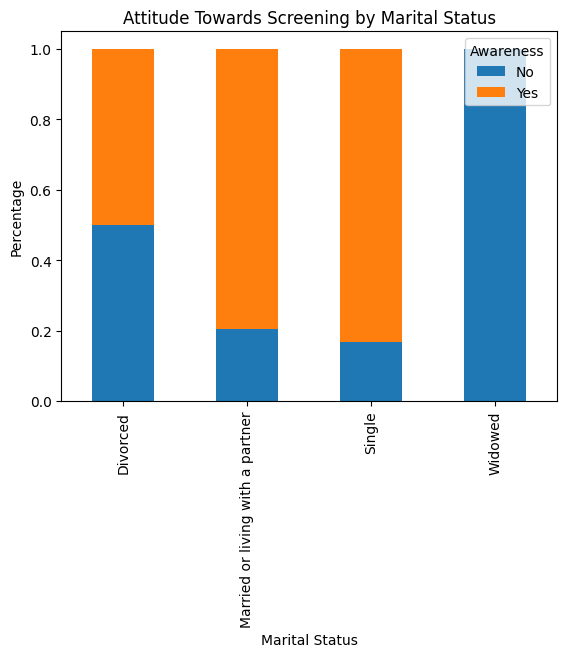

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia          No  \
Marital Status                                                           
Divorced                                                     50.000000   
Married or living with a partner                             20.588235   
Single                                                       16.666667   
Widowed                                                     100.000000   

Familiarity with the concept of cancer screening in Latvia        Yes  
Marital Status                                                         
Divorced                                                    50.000000  
Married or living with a partner                            79.411765  
Single                                                      83.333333  
Widowed                                                           NaN

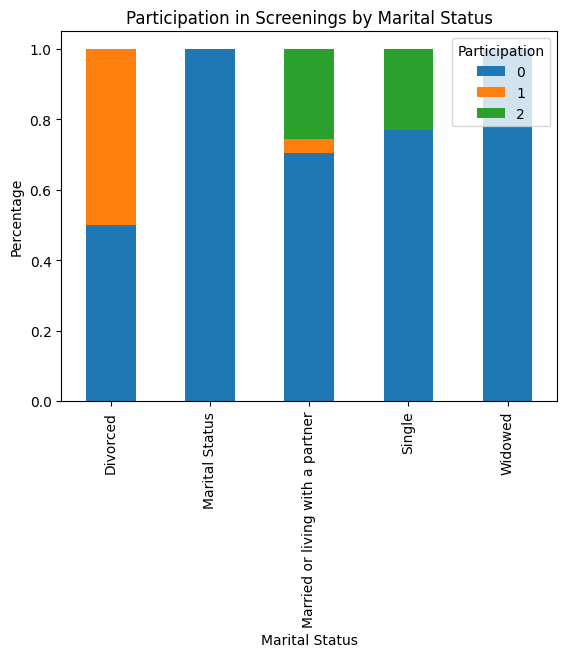

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Marital Status                                                                                                                  
Divorced                                                                                                            50.000000   
Marital Status                                                                                                     100.000000   
Married or living with a partner                                                                                    70.588235   
Single                                                                                                              76.923077   
Widowed                                                                                                            100.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Marital Status                                                                                                                 
Divorced                                                                                                           50.000000   
Marital Status                                                                                                           NaN   
Married or living with a partner                                                                                    3.921569   
Single                                                                                                                   NaN   
Widowed                                                                                                                  NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Marital Status                                                                                                                
Divorced                                                                                                                 NaN  
Marital Status                                                                                                           NaN  
Married or living with a partner                                                                                   25.490196  
Single                                                                                                             23.076923  
Widowed                                                                                                                  NaN

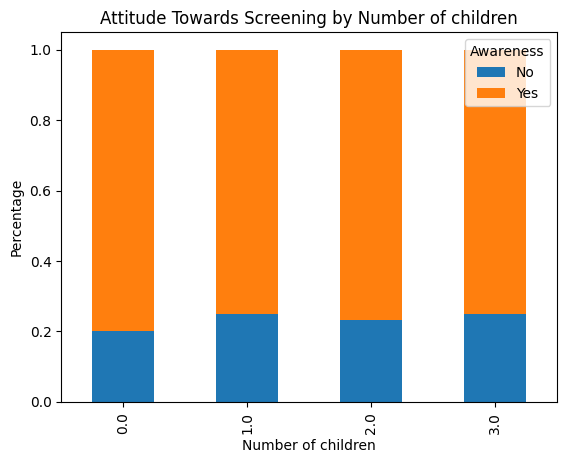

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Number of children                                                      
0.0                                                         20.000000   
1.0                                                         25.000000   
2.0                                                         23.076923   
3.0                                                         25.000000   

Familiarity with the concept of cancer screening in Latvia        Yes  
Number of children                                                     
0.0                                                         80.000000  
1.0                                                         75.000000  
2.0                                                         76.923077  
3.0                                                         75.000000

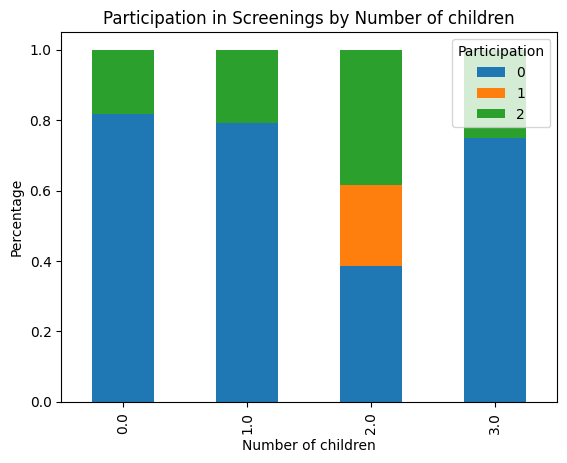

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           0  \
Number of children                                                                                                             
0.0                                                                                                                81.818182   
1.0                                                                                                                79.310345   
2.0                                                                                                                38.461538   
3.0                                                                                                                75.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Number of children                                                                                                             
0.0                                                                                                                      NaN   
1.0                                                                                                                      NaN   
2.0                                                                                                                23.076923   
3.0                                                                                                                      NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Number of children                                                                                                            
0.0                                                                                                                18.181818  
1.0                                                                                                                20.689655  
2.0                                                                                                                38.461538  
3.0                                                                                                                25.000000

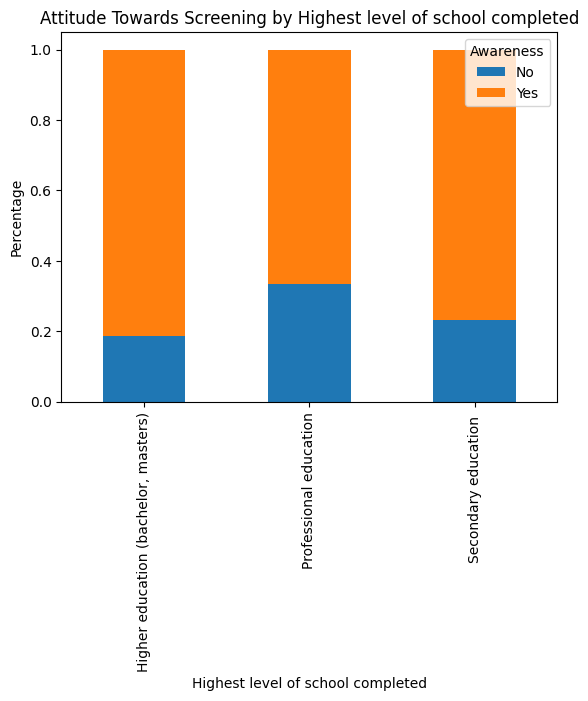

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Highest level of school completed                                       
Higher education (bachelor, masters)                        18.518519   
Professional education                                      33.333333   
Secondary education                                         23.076923   

Familiarity with the concept of cancer screening in Latvia        Yes  
Highest level of school completed                                      
Higher education (bachelor, masters)                        81.481481  
Professional education                                      66.666667  
Secondary education                                         76.923077

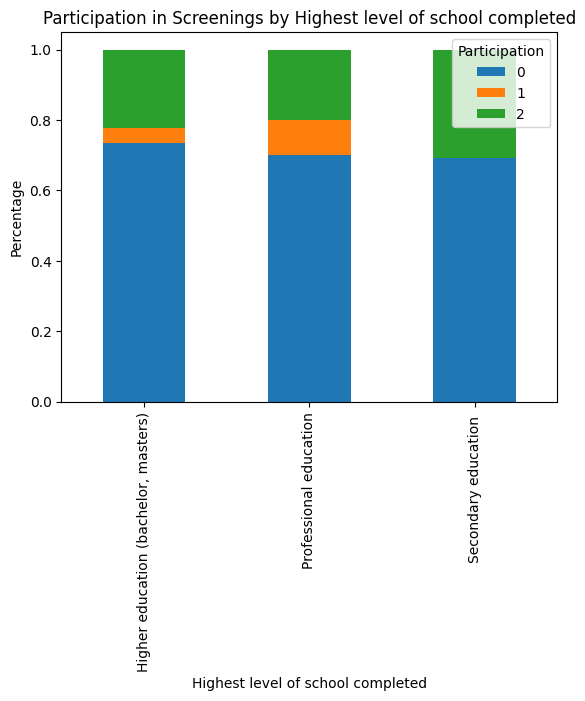

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           0  \
Highest level of school completed                                                                                              
Higher education (bachelor, masters)                                                                               73.333333   
Professional education                                                                                             70.000000   
Secondary education                                                                                                69.230769   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Highest level of school completed                                                                                              
Higher education (bachelor, masters)                                                                                4.444444   
Professional education                                                                                             10.000000   
Secondary education                                                                                                      NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Highest level of school completed                                                                                             
Higher education (bachelor, masters)                                                                               22.222222  
Professional education                                                                                             20.000000  
Secondary education                                                                                                30.769231

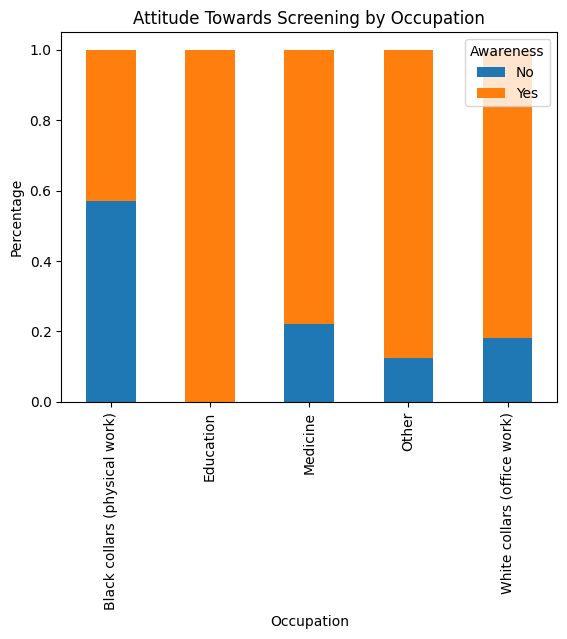

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Occupation                                                              
Black collars (physical work)                               57.142857   
Education                                                         NaN   
Medicine                                                    22.222222   
Other                                                       12.500000   
White collars (office work)                                 18.181818   

Familiarity with the concept of cancer screening in Latvia         Yes  
Occupation                                                              
Black collars (physical work)                                42.857143  
Education                                                   100.000000  
Medicine                                                     77.777778  
Other                                                        87.500000  
White collars (office work)                                  81.818182

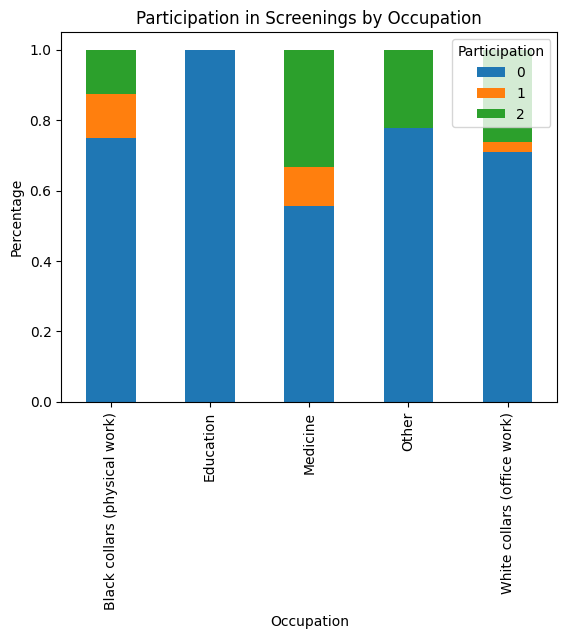

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Occupation                                                                                                                      
Black collars (physical work)                                                                                       75.000000   
Education                                                                                                          100.000000   
Medicine                                                                                                            55.555556   
Other                                                                                                               77.777778   
White collars (office work)                                                                                         71.052632   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Occupation                                                                                                                     
Black collars (physical work)                                                                                      12.500000   
Education                                                                                                                NaN   
Medicine                                                                                                           11.111111   
Other                                                                                                                    NaN   
White collars (office work)                                                                                         2.631579   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Occupation                                                                                                                    
Black collars (physical work)                                                                                      12.500000  
Education                                                                                                                NaN  
Medicine                                                                                                           33.333333  
Other                                                                                                              22.222222  
White collars (office work)                                                                                        26.315789

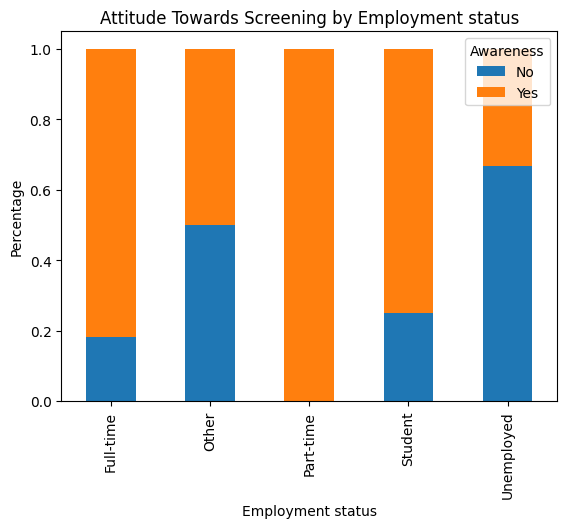

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Employment status                                                       
Full-time                                                   18.181818   
Other                                                       50.000000   
Part-time                                                         NaN   
Student                                                     25.000000   
Unemployed                                                  66.666667   

Familiarity with the concept of cancer screening in Latvia         Yes  
Employment status                                                       
Full-time                                                    81.818182  
Other                                                        50.000000  
Part-time                                                   100.000000  
Student                                                      75.000000  
Unemployed                                                   33.333333

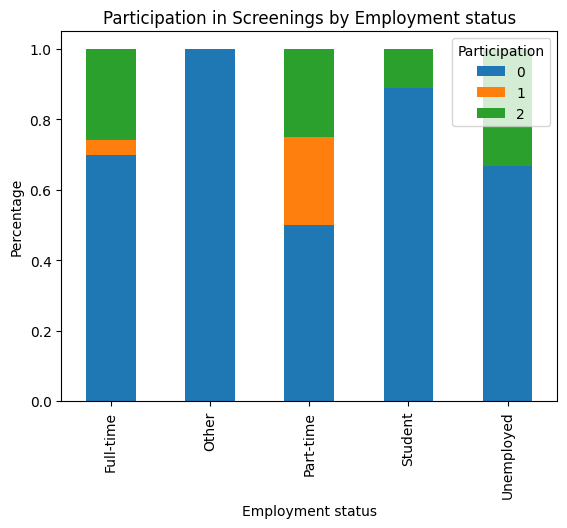

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Employment status                                                                                                               
Full-time                                                                                                           70.000000   
Other                                                                                                              100.000000   
Part-time                                                                                                           50.000000   
Student                                                                                                             88.888889   
Unemployed                                                                                                          66.666667   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?      1  \
Employment status                                                                                                         
Full-time                                                                                                           4.0   
Other                                                                                                               NaN   
Part-time                                                                                                          25.0   
Student                                                                                                             NaN   
Unemployed                                                                                                          NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Employment status                                                                                                             
Full-time                                                                                                          26.000000  
Other                                                                                                                    NaN  
Part-time                                                                                                          25.000000  
Student                                                                                                            11.111111  
Unemployed                                                                                                         33.333333

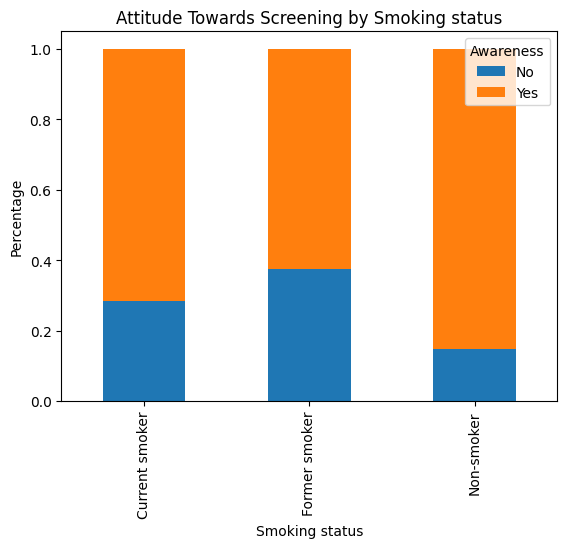

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Smoking status                                                          
Current smoker                                              28.571429   
Former smoker                                               37.500000   
Non-smoker                                                  14.814815   

Familiarity with the concept of cancer screening in Latvia        Yes  
Smoking status                                                         
Current smoker                                              71.428571  
Former smoker                                               62.500000  
Non-smoker                                                  85.185185

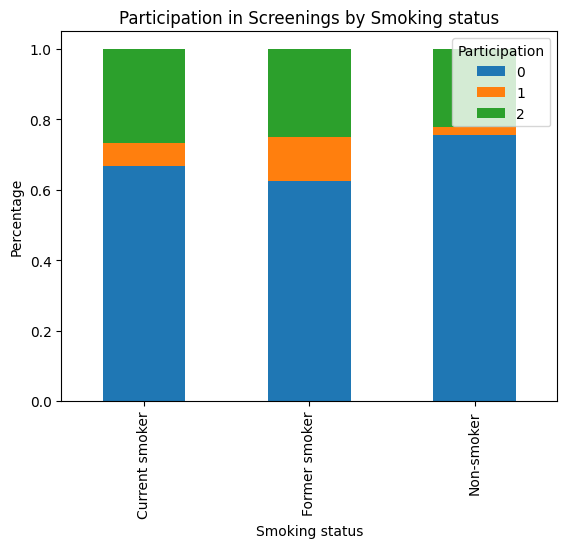

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           0  \
Smoking status                                                                                                                 
Current smoker                                                                                                     66.666667   
Former smoker                                                                                                      62.500000   
Non-smoker                                                                                                         75.555556   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Smoking status                                                                                                                 
Current smoker                                                                                                      6.666667   
Former smoker                                                                                                      12.500000   
Non-smoker                                                                                                          2.222222   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Smoking status                                                                                                                
Current smoker                                                                                                     26.666667  
Former smoker                                                                                                      25.000000  
Non-smoker                                                                                                         22.222222

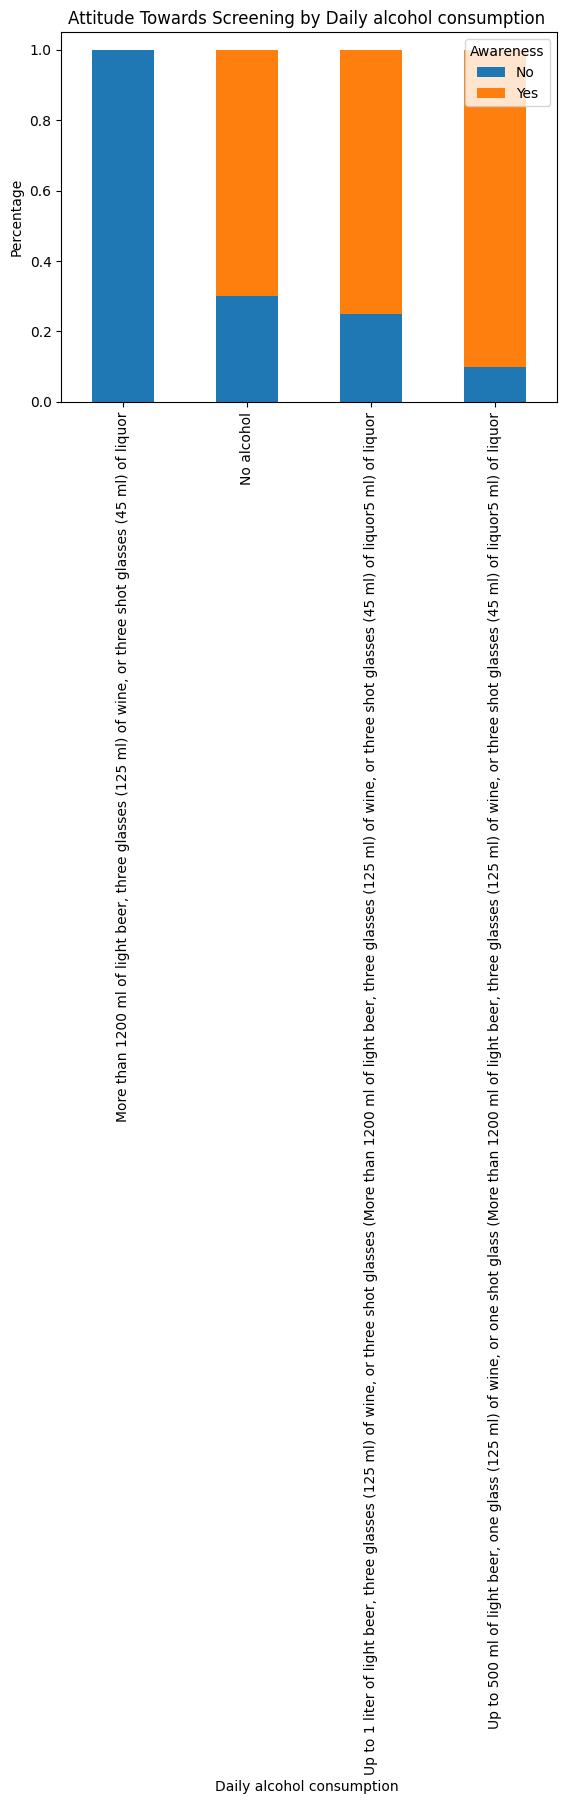

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia     No   Yes
Daily alcohol consumption                                              
More than 1200 ml of light beer, three glasses ...          100.0   NaN
No alcohol                                                   30.0  70.0
Up to 1 liter of light beer, three glasses (125...           25.0  75.0
Up to 500 ml of light beer, one glass (125 ml) ...           10.0  90.0

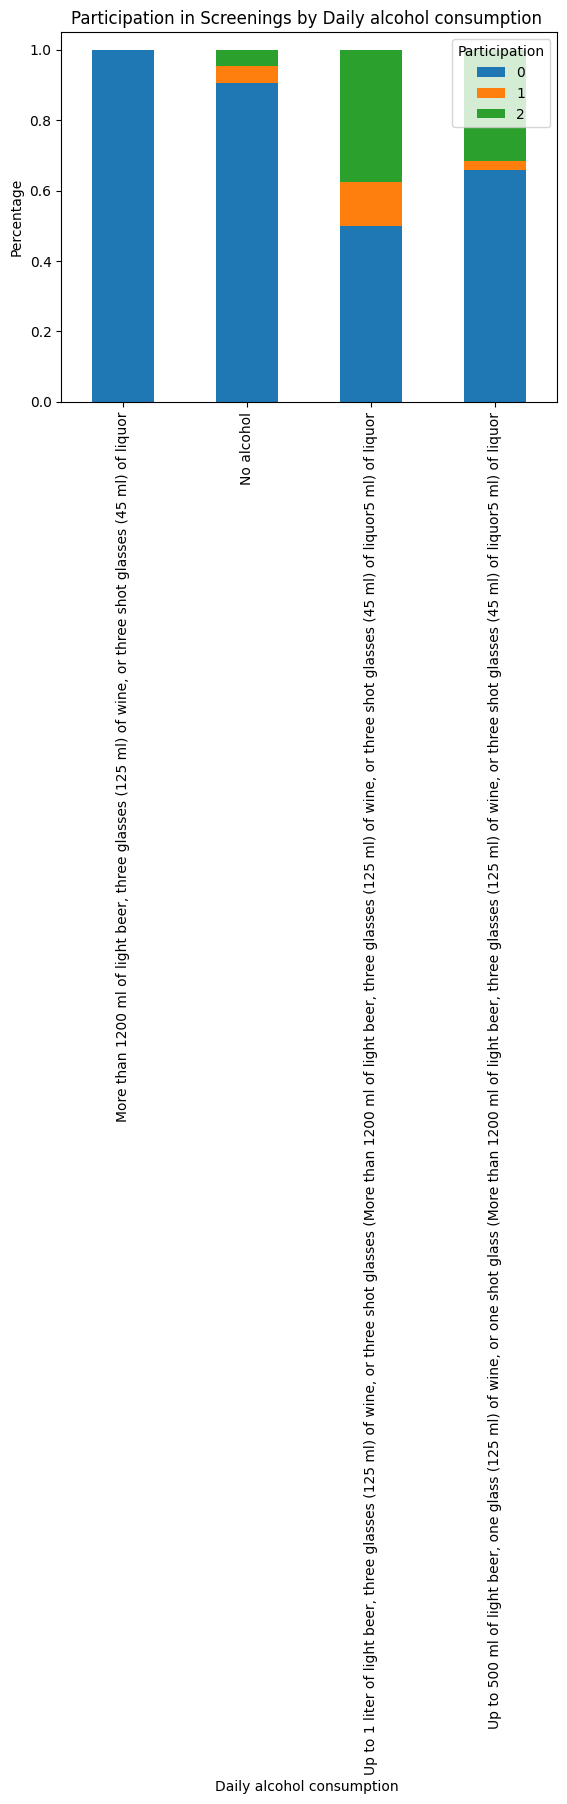

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Daily alcohol consumption                                                                                                       
More than 1200 ml of light beer, three glasses ...                                                                 100.000000   
No alcohol                                                                                                          90.476190   
Up to 1 liter of light beer, three glasses (125...                                                                  50.000000   
Up to 500 ml of light beer, one glass (125 ml) ...                                                                  65.789474   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Daily alcohol consumption                                                                                                      
More than 1200 ml of light beer, three glasses ...                                                                       NaN   
No alcohol                                                                                                          4.761905   
Up to 1 liter of light beer, three glasses (125...                                                                 12.500000   
Up to 500 ml of light beer, one glass (125 ml) ...                                                                  2.631579   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Daily alcohol consumption                                                                                                     
More than 1200 ml of light beer, three glasses ...                                                                       NaN  
No alcohol                                                                                                          4.761905  
Up to 1 liter of light beer, three glasses (125...                                                                 37.500000  
Up to 500 ml of light beer, one glass (125 ml) ...                                                                 31.578947

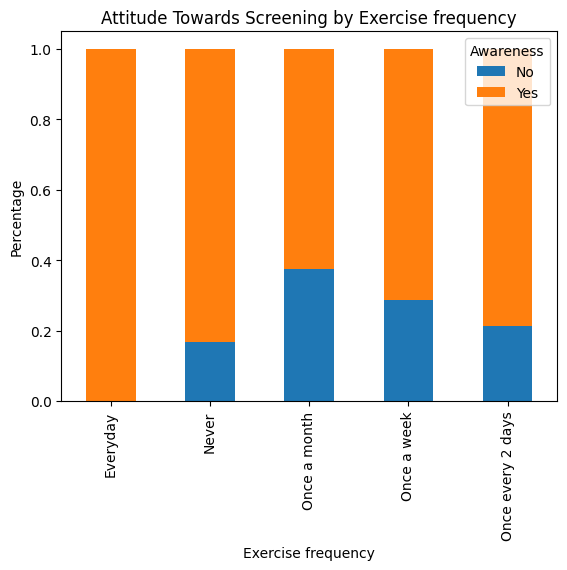

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Exercise frequency                                                      
Everyday                                                          NaN   
Never                                                       16.666667   
Once a month                                                37.500000   
Once a week                                                 28.571429   
Once every 2 days                                           21.428571   

Familiarity with the concept of cancer screening in Latvia         Yes  
Exercise frequency                                                      
Everyday                                                    100.000000  
Never                                                        83.333333  
Once a month                                                 62.500000  
Once a week                                                  71.428571  
Once every 2 days                                            78.571429

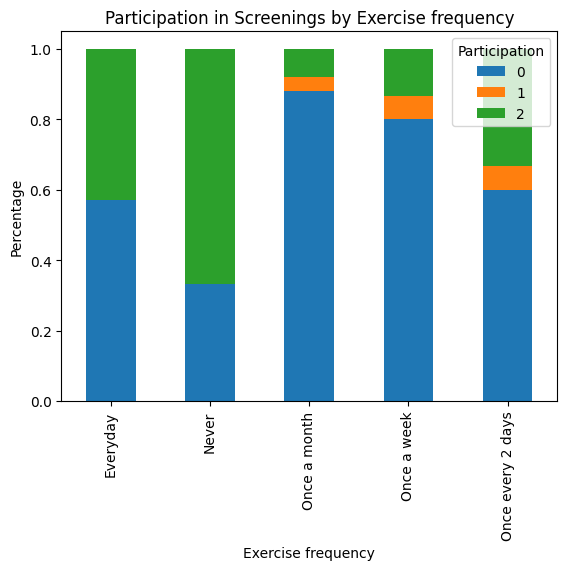

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           0  \
Exercise frequency                                                                                                             
Everyday                                                                                                           57.142857   
Never                                                                                                              33.333333   
Once a month                                                                                                       88.000000   
Once a week                                                                                                        80.000000   
Once every 2 days                                                                                                  60.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?          1  \
Exercise frequency                                                                                                            
Everyday                                                                                                                NaN   
Never                                                                                                                   NaN   
Once a month                                                                                                       4.000000   
Once a week                                                                                                        6.666667   
Once every 2 days                                                                                                  6.666667   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Exercise frequency                                                                                                            
Everyday                                                                                                           42.857143  
Never                                                                                                              66.666667  
Once a month                                                                                                        8.000000  
Once a week                                                                                                        13.333333  
Once every 2 days                                                                                                  33.333333

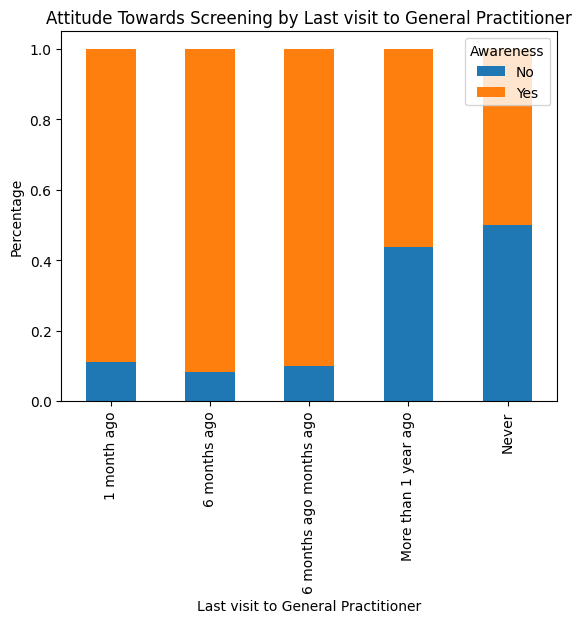

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Last visit to General Practitioner                                      
1 month ago                                                 11.111111   
6 months ago                                                 8.333333   
6 months ago months ago                                     10.000000   
More than 1 year ago                                        43.750000   
Never                                                       50.000000   

Familiarity with the concept of cancer screening in Latvia        Yes  
Last visit to General Practitioner                                     
1 month ago                                                 88.888889  
6 months ago                                                91.666667  
6 months ago months ago                                     90.000000  
More than 1 year ago                                        56.250000  
Never                                                       50.000000

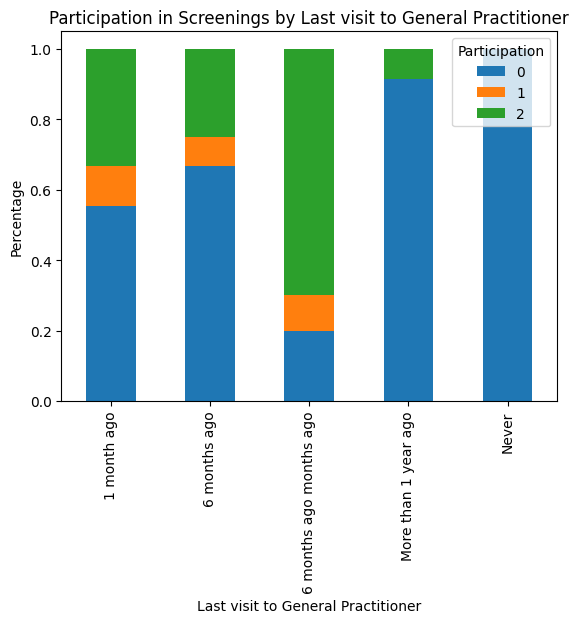

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
Last visit to General Practitioner                                                                                              
1 month ago                                                                                                         55.555556   
6 months ago                                                                                                        66.666667   
6 months ago months ago                                                                                             20.000000   
More than 1 year ago                                                                                                91.428571   
Never                                                                                                              100.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Last visit to General Practitioner                                                                                             
1 month ago                                                                                                        11.111111   
6 months ago                                                                                                        8.333333   
6 months ago months ago                                                                                            10.000000   
More than 1 year ago                                                                                                     NaN   
Never                                                                                                                    NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Last visit to General Practitioner                                                                                            
1 month ago                                                                                                        33.333333  
6 months ago                                                                                                       25.000000  
6 months ago months ago                                                                                            70.000000  
More than 1 year ago                                                                                                8.571429  
Never                                                                                                                    NaN

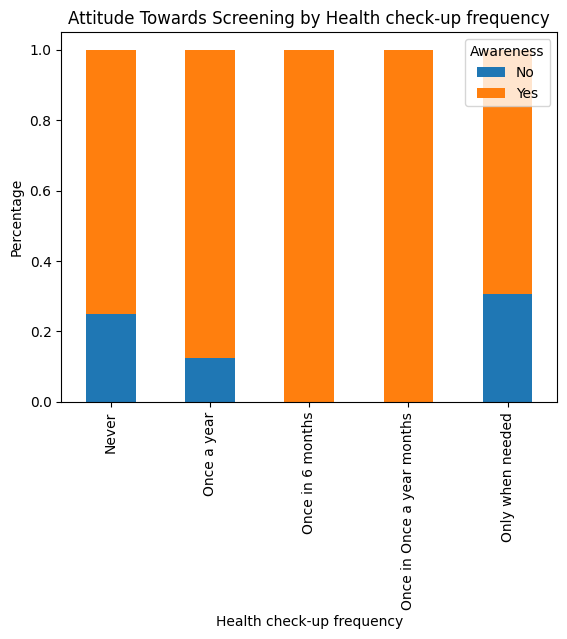

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
Health check-up frequency                                               
Never                                                       25.000000   
Once a year                                                 12.500000   
Once in 6 months                                                  NaN   
Once in Once a year months                                        NaN   
Only when needed                                            30.769231   

Familiarity with the concept of cancer screening in Latvia         Yes  
Health check-up frequency                                               
Never                                                        75.000000  
Once a year                                                  87.500000  
Once in 6 months                                            100.000000  
Once in Once a year months                                  100.000000  
Only when needed                                             69.230769

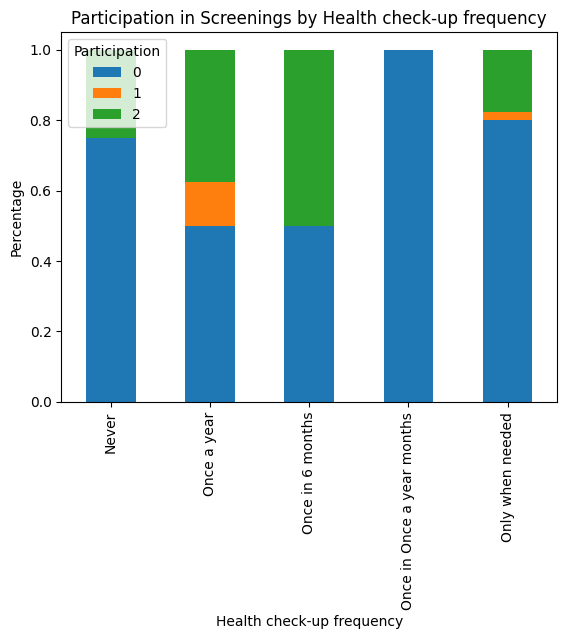

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?       0  \
Health check-up frequency                                                                                                  
Never                                                                                                               75.0   
Once a year                                                                                                         50.0   
Once in 6 months                                                                                                    50.0   
Once in Once a year months                                                                                         100.0   
Only when needed                                                                                                    80.0   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
Health check-up frequency                                                                                                      
Never                                                                                                                    NaN   
Once a year                                                                                                        12.500000   
Once in 6 months                                                                                                         NaN   
Once in Once a year months                                                                                               NaN   
Only when needed                                                                                                    2.222222   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
Health check-up frequency                                                                                                     
Never                                                                                                              25.000000  
Once a year                                                                                                        37.500000  
Once in 6 months                                                                                                   50.000000  
Once in Once a year months                                                                                               NaN  
Only when needed                                                                                                   17.777778

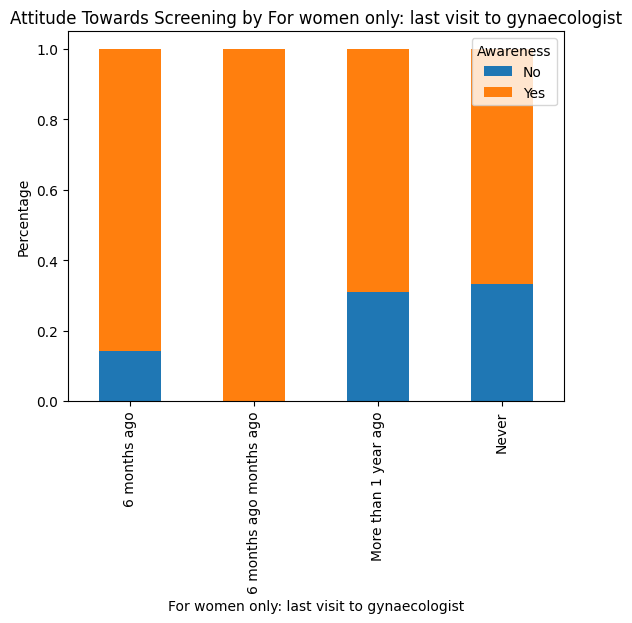

'Percentage Distribution:'

Familiarity with the concept of cancer screening in Latvia         No  \
For women only: last visit to gynaecologist                             
6 months ago                                                14.285714   
6 months ago months ago                                           NaN   
More than 1 year ago                                        31.034483   
Never                                                       33.333333   

Familiarity with the concept of cancer screening in Latvia         Yes  
For women only: last visit to gynaecologist                             
6 months ago                                                 85.714286  
6 months ago months ago                                     100.000000  
More than 1 year ago                                         68.965517  
Never                                                        66.666667

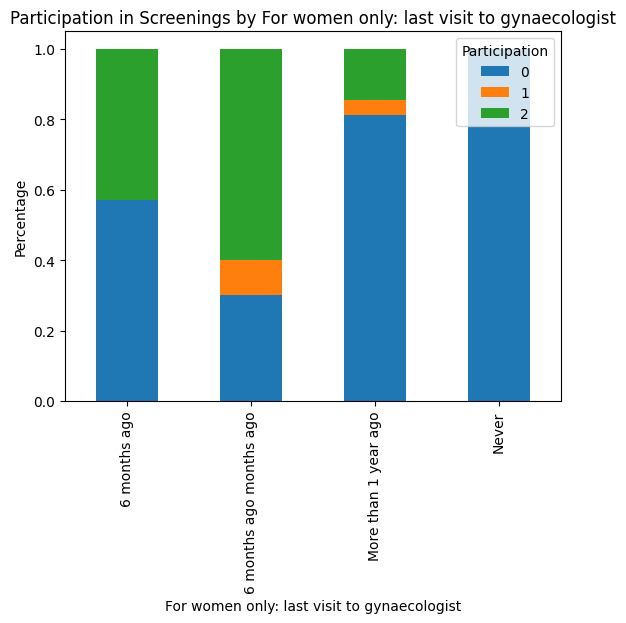

'Percentage Distribution:'

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?            0  \
For women only: last visit to gynaecologist                                                                                     
6 months ago                                                                                                        57.142857   
6 months ago months ago                                                                                             30.000000   
More than 1 year ago                                                                                                81.250000   
Never                                                                                                              100.000000   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           1  \
For women only: last visit to gynaecologist                                                                                    
6 months ago                                                                                                             NaN   
6 months ago months ago                                                                                            10.000000   
More than 1 year ago                                                                                                4.166667   
Never                                                                                                                    NaN   

If you received one of the invitations mentioned above, did you perform the screening that you were invited for?           2  
For women only: last visit to gynaecologist                                                                                   
6 months ago                                                                                                       42.857143  
6 months ago months ago                                                                                            60.000000  
More than 1 year ago                                                                                               14.583333  
Never                                                                                                                    NaN

ValueError: too many values to unpack (expected 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Replace variations of Riga with a single label
df['City/town/village'] = df['City/town/village'].replace({'Rīga': 'Riga', 'Rīgā': 'Riga'})

# Exclude Šveice, Lausanne from the dataset
df = df[df['City/town/village'] != 'Šveice, Lausanne'] 

# Define the sociodemographic factors of interest
sociodemographic_factors = [
    'Age',
    'Gender',
    'City/town/village',
    'Marital Status',
    'Number of children',
    'Highest level of school completed',
    'Occupation',
    'Employment status',
    'Smoking status',
    'Daily alcohol consumption ',
    'Exercise frequency',
    'Last visit to General Practitioner',
    'Health check-up frequency',
    'For women only: last visit to gynaecologist'
]

# Analyze Attitude Towards Screening
def analyze_attitude_towards_screening(factor):
    # Calculate the distribution of attitudes towards screening
    distribution = data.groupby(factor)['Familiarity with the concept of cancer screening in Latvia'].value_counts(normalize=True).unstack()

    # Visualize the distribution
    ax = distribution.plot(kind='bar', stacked=True)
    plt.title('Attitude Towards Screening by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Awareness')

    plt.show()

    # Print percentages
    display("Percentage Distribution:")
    display(distribution * 100)  # Multiply by 100 to get percentages


# Analyze Participation in Screenings
def analyze_participation_in_screenings(factor):
    # Calculate the distribution of participation in screenings
    distribution = data.groupby(factor)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()

    # Visualize the distribution
    ax = distribution.plot(kind='bar', stacked=True)
    plt.title('Participation in Screenings by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Participation')

    plt.show()

    # Print percentages
    display("Percentage Distribution:")
    display(distribution * 100)  # Multiply by 100 to get percentages


# Statistical Analysis
def statistical_analysis():
    for factor in sociodemographic_factors:
        # Conduct chi-square tests for awareness and participation
        chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data[factor], data['Familiarity with the concept of cancer screening in Latvia']))
        chi2_participation, p_participation = chi2_contingency(pd.crosstab(data[factor], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']))

        display("\nStatistical Analysis for", factor)
        display("Chi-square test results for Awareness:")
        display("Chi-square value:", chi2_awareness)
        display("p-value:", p_awareness)

        display("\nChi-square test results for Participation:")
        display("Chi-square value:", chi2_participation)
        display("p-value:", p_participation)

# Perform analysis and statistical tests for each sociodemographic factor
for factor in sociodemographic_factors:
    analyze_attitude_towards_screening(factor)
    analyze_participation_in_screenings(factor)

# Call the statistical_analysis function
statistical_analysis()


# SETTING UP AND ANALYSING HYPOTHESIS 

# HYPOTHESIS 1 
# Awareness about state-funded cancer screenings increases attendance rates of the population in screenings. 

In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Relevant columns
awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

learning_sources_columns = ['Learnt about canceer screening tests from the Internet- Self-seeking information ',
                            'Learnt about canceer screening tests from social media ',
                            'Learnt about canceer screening tests from SPKC webpage',
                            'Learnt about canceer screening tests by my GP ',
                            'Learnt about canceer screening tests by other healthcare organisations',
                            'Learnt about canceer screening tests from advertisements ', 
                            'Learnt about canceer screening tests from friends, family members',
                            'Learnt about canceer screening tests from other resources '
                            ]

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

attitudes_columns = ['My health and well-being is very important to me',
                     'I take precautions to have a healthy lifestyle',
                     'Cancer is a serious health condition',
                     'I am afraid of cancer ',
                     'I am concerned about my own risk to develop cancer ',
                     'I am concerned about my family\'s risk to develop cancer']

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Generate design matrix
X = df[awareness_columns + learning_sources_columns + attitudes_columns]
y = df[participation_column]

# Convert 'Yes' entries to 1 and fill NaN with 0
X = X.applymap(lambda x: 1 if x == 'Yes' else 0)

# Remove constant columns to avoid singularity
X = X.loc[:, (X != X.iloc[0]).any()]

# Add constant for logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

         Current function value: inf
         Iterations: 35


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/4160488946.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/4160488946.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x == 'Yes' else 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWar

LinAlgError: Singular matrix

Based on the output and the inferences drawn:

Rejecting the Null Hypothesis: We reject the null hypothesis, which typically states that there is no relationship between awareness about state-funded cancer screenings and attendance rates.
Basis for Rejection:
The significant positive coefficients associated with awareness variables indicate that an increase in awareness is associated with higher attendance rates.
The low p-values associated with these coefficients suggest that the relationships are statistically significant, meaning they are unlikely to have occurred by chance.
Conclusion: Therefore, based on the evidence provided by the logistic regression analysis, we have sufficient grounds to reject the null hypothesis and accept the alternative hypothesis. This implies that awareness about state-funded cancer screenings does have a significant impact on attendance rates in the population.

# HYPOTHESIS 2
# Females are more aware than men of state-funded cancer screenings and attend them more frequently than men. 

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Select only relevant columns for hypothesis testing
data = df[['Gender'] + awareness_columns]

# Replace blank entries with 'No' in awareness columns
data[awareness_columns] = data[awareness_columns].fillna('No')

# Replace 'Yes' with 1 and other values with 0 in awareness columns
data[awareness_columns] = data[awareness_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Drop rows with missing values
data.dropna(inplace=True)

# Ensure 'Gender of the participant' column is categorical
data['Gender'] = data['Gender'].astype('category')

# Create contingency table
contingency_table = pd.crosstab(data['Gender'], data[awareness_columns].sum(axis=1))

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and awareness of state-funded cancer screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between gender and awareness of state-funded cancer screenings.")

Chi-Square Statistic: 19.35897320084312
p-value: 0.007134159033672332
Reject the null hypothesis: There is a significant association between gender and awareness of state-funded cancer screenings.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/3949728745.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[awareness_columns] = data[awareness_columns].fillna('No')
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/3949728745.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[awareness_columns] = data[awareness_columns].applymap(lambda x: 1 if x == 'Yes' else 0)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/3949728745.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# HYPOTHESIS 3
# Participation in state-funded screenings is higher among younger participants.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Define relevant columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
age_column = 'Age'

# Select relevant columns
data = df[[age_column, participation_column]]

# Drop rows with missing values
data.dropna(inplace=True)

# Group participants into younger and older categories
# Define the age threshold (e.g., 40 years)
age_threshold = 40
data['Age Group'] = pd.cut(data[age_column], bins=[0, age_threshold, df[age_column].max()], labels=['Younger', 'Older'])

# Create contingency table
contingency_table = pd.crosstab(data['Age Group'], data[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between age and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between age and participation in state-funded screenings.")


Chi-Square Statistic: 7.085714285714285
p-value: 0.0289305501710033
Reject the null hypothesis: There is a significant association between age and participation in state-funded screenings.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/513252933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/513252933.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(data[age_column], bins=[0, age_threshold, df[age_column].max()], labels=['Younger', 'Older'])


# HYPOTHESIS 4
# Participation in state-funded screening is higher among participants with a higher level of education.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
education_column = 'Highest level of school completed'

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Select only relevant columns
data = df[[education_column, participation_column]]

# Drop rows with missing values
data.dropna(inplace=True)

# Create contingency table
contingency_table = pd.crosstab(data[education_column], data[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and participation in state-funded screening.")
else:
    print("Accept the null hypothesis: There is no significant association between education level and participation in state-funded screening.")


Chi-Square Statistic: 15.627331441348472
p-value: 0.04803556074430299
Reject the null hypothesis: There is a significant association between education level and participation in state-funded screening.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/193534884.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_46417/193534884.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
education_column = 'Highest level of school completed'

# Map education levels into higher and lower categories
higher_education_levels = ['Professional education', 'Higher education (bachelor, master’s)', 'Doctoral grade']
lower_education_levels = ['Primary education (till grade 9)', 'Secondary education']

# Categorize education levels
def categorize_education_level(level):
    if level in higher_education_levels:
        return 'Higher'
    elif level in lower_education_levels:
        return 'Lower'
    else:
        return 'Other'

df['Education Category'] = df[education_column].apply(categorize_education_level)

# Create contingency table
contingency_table = pd.crosstab(df['Education Category'], df[participation_column])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between education level and participation in state-funded screenings.")


Chi-Square Statistic: 0.8688425925925927
p-value: 0.6476393499428733
Accept the null hypothesis: There is no significant association between education level and participation in state-funded screenings.


# HYPOTHESIS 5
# Participation in state-funded screening is higher among participants with higher socioeconomic status.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('filtered_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
occupation_column = 'Occupation'

# Categorize occupation into high and low socioeconomic status
high_ses = ['White collars (office work)', 'Education', 'Medicine']
low_ses = ['Black collars (physical work)', 'Other']

# Map occupation to socioeconomic status
df['Socioeconomic Status'] = df[occupation_column].map(lambda x: 'High' if x in high_ses else 'Low')

# Create contingency table
contingency_table = pd.crosstab(df['Socioeconomic Status'], df[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between socioeconomic status and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between socioeconomic status and participation in state-funded screenings.")


Chi-Square Statistic: 1.1473801560758077
p-value: 0.5634424512550403
Accept the null hypothesis: There is no significant association between socioeconomic status and participation in state-funded screenings.
